In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
data = pd.read_csv(r'/Users/maximvasilev/Desktop/ML/train2.csv')

In [ ]:
def get_minutes(date):
    dt = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    minutes = dt.hour * 60 + dt.minute
    return(minutes)

def get_weekday(date):
    dt = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return(dt.weekday())

In [ ]:
data["enterance_minute"] = data["pass_dttm"].apply(lambda x: get_minutes(x))

'''
data["enterance_minute"] = 0
for i in range(0, data.shape[0]):
    mins = get_minutes(data["pass_dttm"][i])
    data["enterance_minute"][i] = mins
    
'''

In [10]:
stations_ids = list(pd.unique(data["station_nm"]))
ticket_type_nm_list = list(pd.unique(data["ticket_type_nm"]))
line_id_list = list(pd.unique(data["line_id"]))
line_id_list = list(pd.unique(data["entrance_id"]))


ohe = OneHotEncoder(sparse = False)

ohe.fit(data[["station_nm", "ticket_type_nm", "line_id", "entrance_id"]])

ohe_model = ohe.transform(data[["station_nm", "ticket_type_nm", "line_id", "entrance_id"]])

#data[ohe.get_feature_names()] = ohe_model
#data.to_csv("final.csv")

In [11]:
categorical_features = list(ohe.get_feature_names())
station_feature = [feature for feature in categorical_features if feature.startswith("x0")]
ticket_feature = [feature for feature in categorical_features if feature.startswith("x1")]
line_feature = [feature for feature in categorical_features if feature.startswith("x2")]
entrance_to_station_feature = [feature for feature in categorical_features if feature.startswith("x3")]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data["holiday"] = data["pass_dttm"].apply(lambda x: 0 if get_weekday(x) <= 4 else 1) 
data["weekday"] = data["pass_dttm"].apply(lambda x: get_weekday(x))
data["hour"] = data["pass_dttm"].apply(lambda x: x.hour)

#data["not_holiday"] = data["pass_dttm"].apply(lambda x: 0 if get_weekday(dt) <= 4 else 1) 

'''
for index in range(0, len(data)):
    dt = data.iloc[index]["pass_dttm"]
    weekday = int(get_weekday(dt))

    if weekday <= 4:
        data.loc[index, "holiday"] = 0
        data.loc[index, "not_holiday"] = 1
    else:
        data.loc[index, "holiday"] = 1
        data.loc[index, "not_holiday"] = 0
        
'''
data
        

In [ ]:
data.to_csv("final.csv")

In [ ]:
additional_info_for_stations = pd.read_csv(r'/Users/maximvasilev/Desktop/ML/additional_info_for_stations.csv')
new_features = ["Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]
data[new_features] = 0

stations_nms = list(pd.unique(data["station_nm"]))
ticket_type_nm_list = list(pd.unique(data["ticket_type_nm"]))
line_id_list = list(pd.unique(data["line_nm"]))

l = list(map(lambda x: str(x).startswith("stat_nm: "), list(data.columns)));
print(sum(l))

for station in stations_nms:
    
    vals = additional_info_for_stations.loc[additional_info_for_stations["Russian name"] == station, new_features]
    ll = (data.loc[data["station_nm"] == station, new_features]).shape[0]

    
    if len(vals) >= 1:
        data.loc[data["station_nm"] == station, new_features] = pd.DataFrame(list([vals.values[0]])* ll).values
        print(data.loc[data["station_nm"] == station, new_features])
    else:
        data.loc[data["station_nm"] == station, new_features] = pd.DataFrame(np.zeros((ll, 9))).values
        print(data.loc[data["station_nm"] == station, new_features])


In [ ]:
plt.figure(figsize = (6,6))
data2 = data[['enterance_minute', 'time_to_under', 'label', 'id', 
                 'holiday', 'line_id', 'ticket_id', 'entrance_id']]
sns.heatmap(data2.corr(), square = True)

In [ ]:
categorical_features = list(ohe.get_feature_names())
"""
interesting_cols = np.concatenate((np.array(["enterance_minute", "Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport", "id"]), np.array(list(categorical_features)))).tolist()
"""

interesting_cols = ["enterance_minute", "Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport", "id", "holiday"]

num_points = 1091021

for col in interesting_cols:
    plt.figure()
    plt.scatter(data[col].head(num_points), data["time_to_under"].head(num_points), np.ones(num_points))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("time_to_under")
    plt.show()

In [ ]:
data[categorical_features].sum(axis = )

In [ ]:
categorical_features = list(ohe.get_feature_names())

new_features = ["Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]
holidays = ["holiday"] 

other_items = ['enterance_minute', 'time_to_under', 'label', "id"]

big2d_list = [other_items, holidays]
big1d_list = [item for sublist in big2d_list for item in sublist]
big1d_list.remove('label')
big1d_list.remove('time_to_under')
data_X = data[big1d_list]
data_y = data["time_to_under"]




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                    test_size = 0.2, random_state = 11)


from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

r2_sc = r2_score(y_test, y_pred)
print("r2_sc = ", r2_sc)

print("mape: " + str(mape(y_pred, y_test)))
print("mse: " + str(mse(y_pred, y_test)))

Ниже проводился расчет для нейронки с аналогичными входными параметрами (с categorical_features). Тут результат для них получается следующий:
mape: 0.46052752332561087
mse: 27035.73273049792



Если categorical features убрать и оставить только "holiday" 'enterance_minute', 'time_to_under', 'label', тогда результат будет около 0.4, r2_score = 0.4666355040290938

In [ ]:
#data.to_csv("final.csv", sep = ",")

# ОТСЮДА НОВАЯ ВЕРСИЯ

In [147]:
data = pd.read_csv('final.csv')

In [4]:
stat_clusters = pd.read_csv('Station_Clusters.csv')
stat_clusters.drop(columns = ["Unnamed: 0"], inplace= True)
stat_clusters.set_index("Russian name", inplace = True)
for stat_name in list(stat_clusters.index):
    data.loc[data["station_nm"] == stat_name, "Cluster"] = stat_clusters.loc[stat_name, "Cluster"]

data["Cluster"].fillna(1, inplace = True)
data.isna().sum().sum()

0

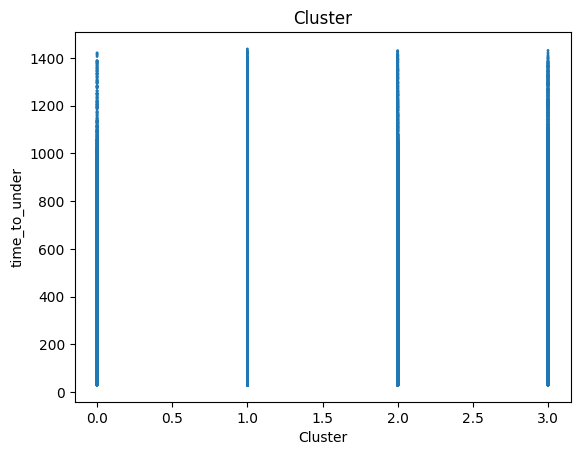

In [5]:
num_points = data.shape[0]
plt.figure()
plt.scatter(data["Cluster"].head(num_points), data["time_to_under"].head(num_points), np.ones(num_points))
plt.title("Cluster")
plt.xlabel("Cluster")
plt.ylabel("time_to_under")
plt.show()

/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/1261288724.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), square = True)


<AxesSubplot: >

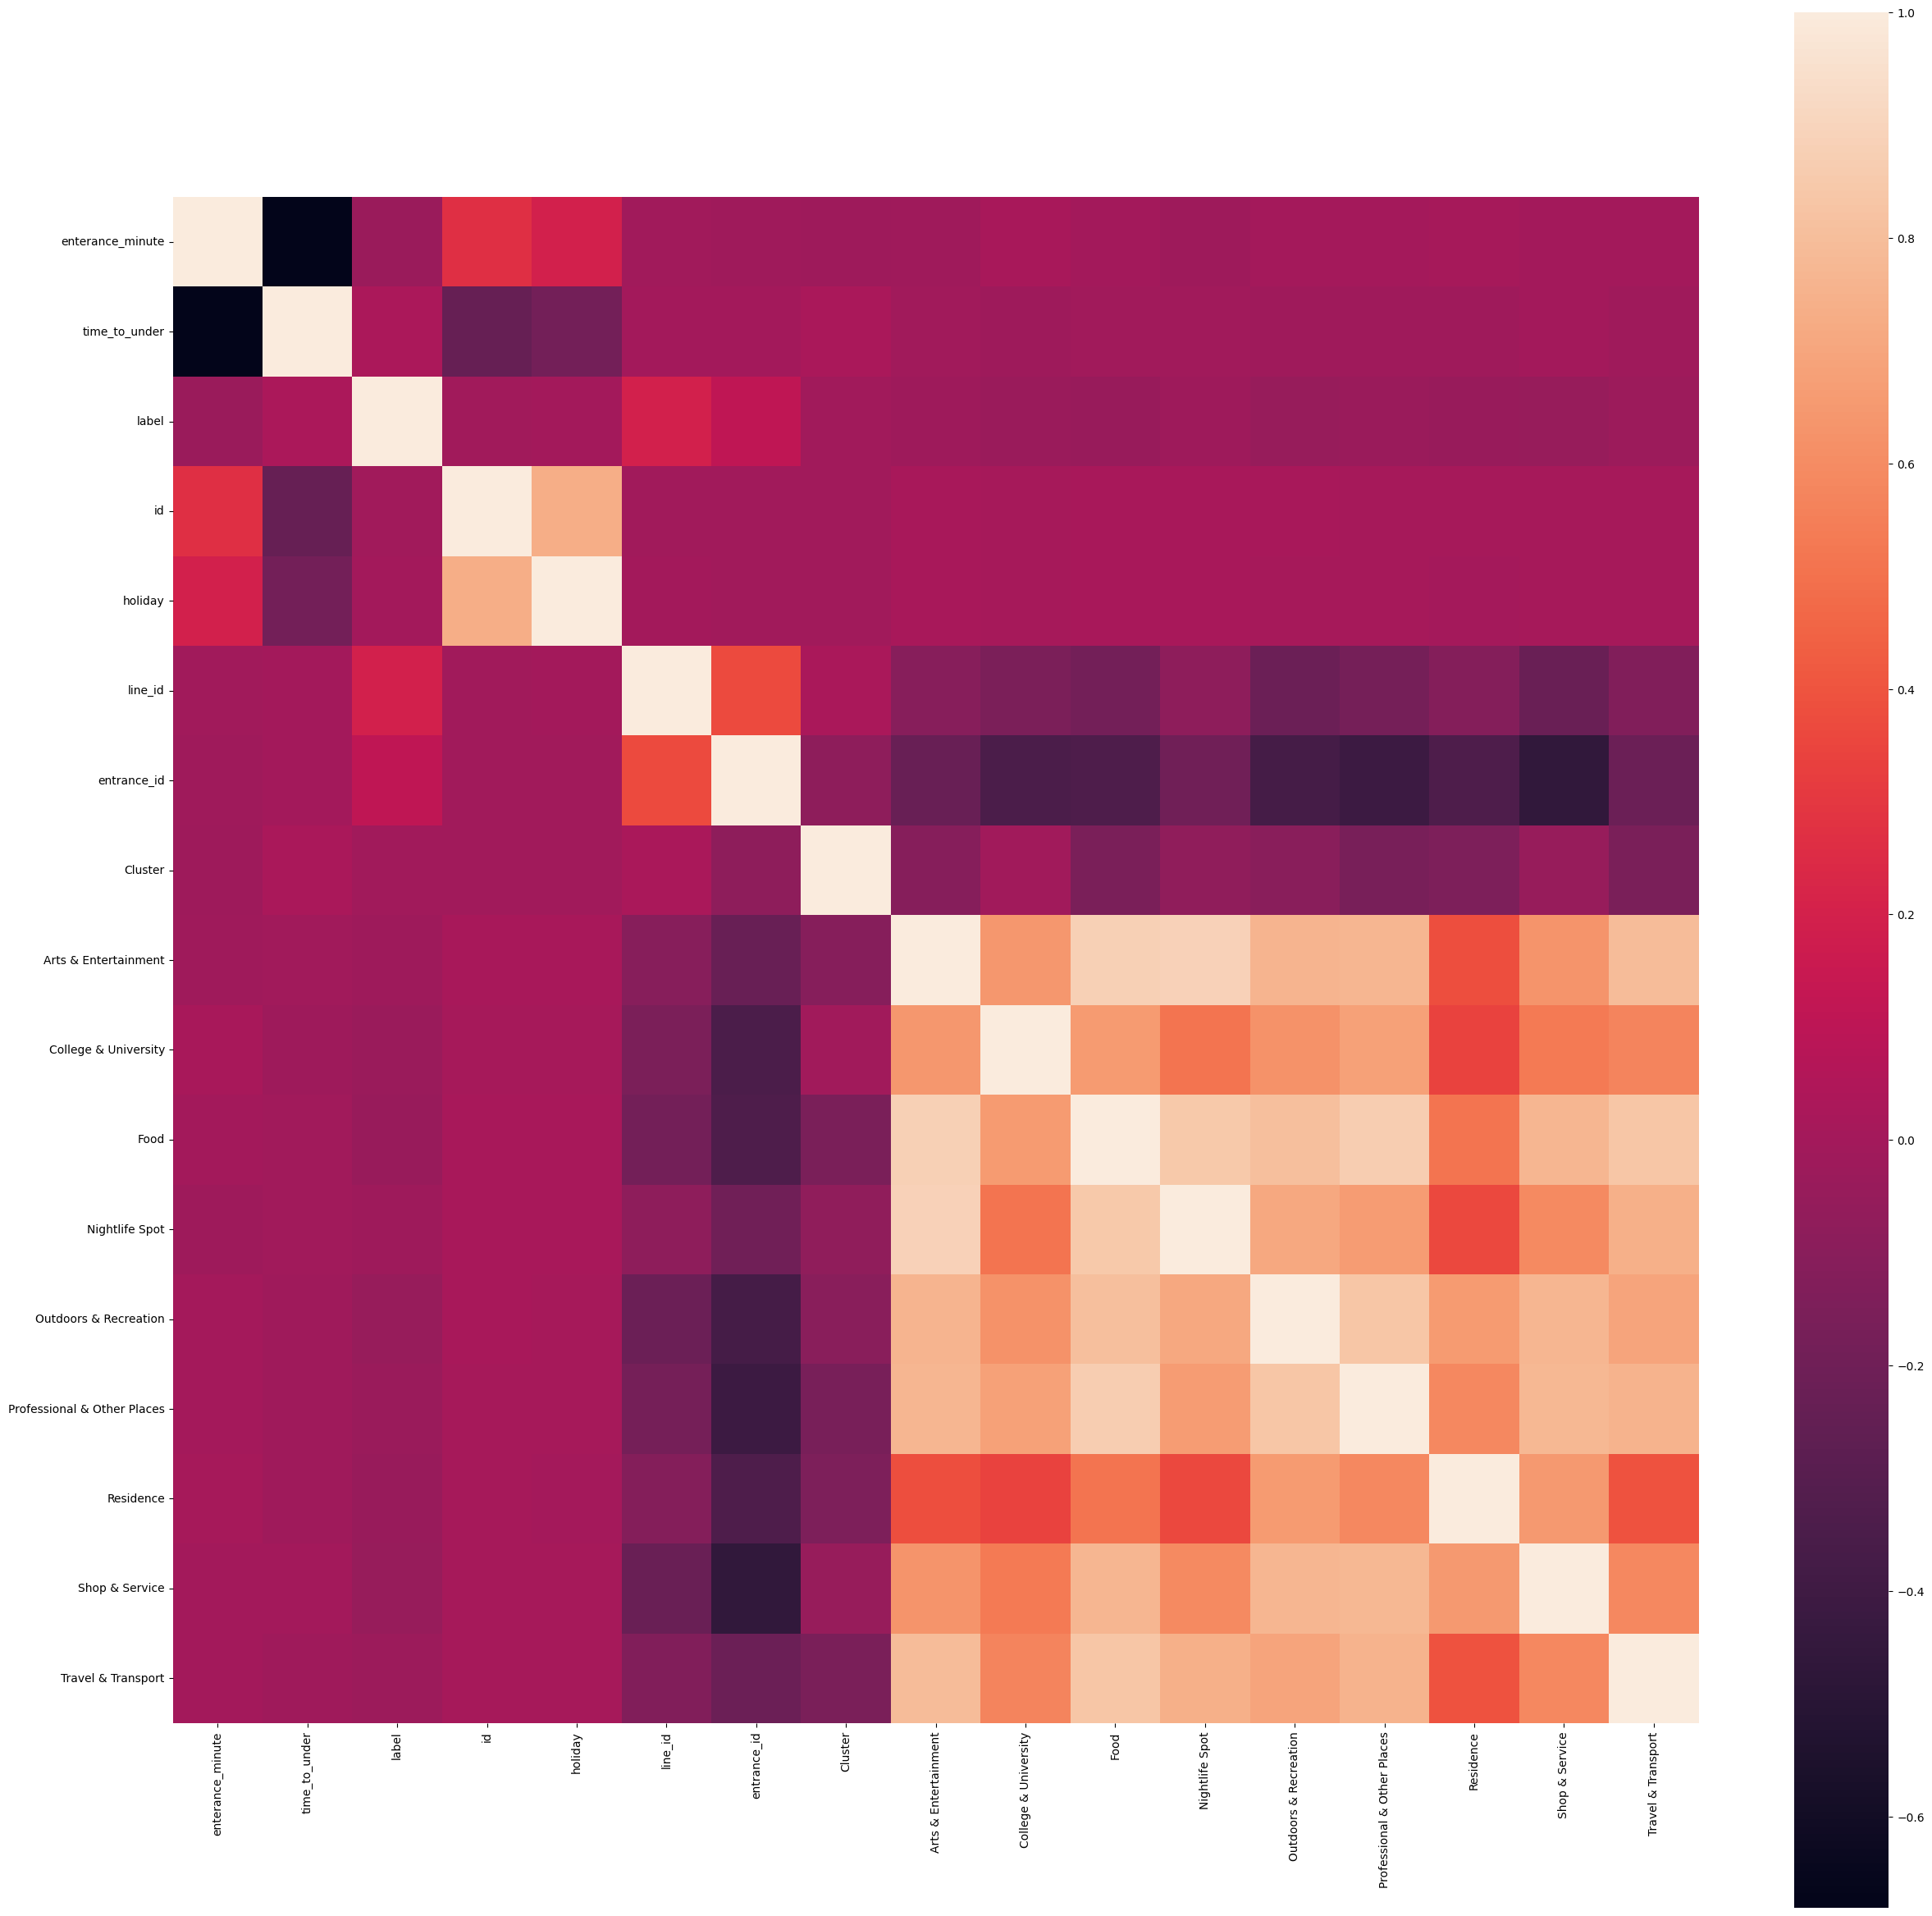

In [6]:
plt.figure(figsize = (30,30))
data2 = data[['enterance_minute', 'time_to_under', 'label', 'id', 
                 'holiday', 'line_id', 'ticket_id', 'entrance_id', "Cluster", "Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]]
sns.heatmap(data2.corr(), square = True)

# Скейлинг Данных

In [230]:
from sklearn.preprocessing import MinMaxScaler
dataa = data["entrance_minute"].values.reshape(-1,1)
idd = data["id"].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(dataa)
new_data = scaler.transform(dataa)

data["entrance_minute"] = new_data

scaler2 = MinMaxScaler()
scaler2.fit(idd)
new_data2 = scaler2.transform(idd)

data["id"] = new_data2


In [133]:
list(data.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'ticket_id',
 'ticket_type_nm',
 'entrance_id',
 'entrance_nm',
 'station_id',
 'station_nm',
 'line_id',
 'line_nm',
 'pass_dttm',
 'time_to_under',
 'label',
 'entrance_minute',
 'x0_Авиамоторная',
 'x0_Автозаводская',
 'x0_Академическая',
 'x0_Александровский сад',
 'x0_Алексеевская',
 'x0_Алма-Атинская',
 'x0_Алтуфьево',
 'x0_Аминьевская',
 'x0_Андроновка',
 'x0_Аннино',
 'x0_Арбатская',
 'x0_Аэропорт',
 'x0_Бабушкинская',
 'x0_Багратионовская',
 'x0_Балтийская',
 'x0_Баррикадная',
 'x0_Бауманская',
 'x0_Беговая',
 'x0_Белокаменная',
 'x0_Беломорская',
 'x0_Белорусская',
 'x0_Беляево',
 'x0_Бибирево',
 'x0_Битцевский парк',
 'x0_Борисово',
 'x0_Боровицкая',
 'x0_Боровское шоссе',
 'x0_Ботанический сад',
 'x0_Братиславская',
 'x0_Бульвар Адмирала Ушакова',
 'x0_Бульвар Дмитрия Донского',
 'x0_Бульвар Рокоссовского',
 'x0_Бунинская аллея',
 'x0_Бутырская',
 'x0_ВДНХ',
 'x0_Верхние Котлы',
 'x0_Верхние Лихоборы',
 'x0_Владыкино',
 'x0_Водный ста

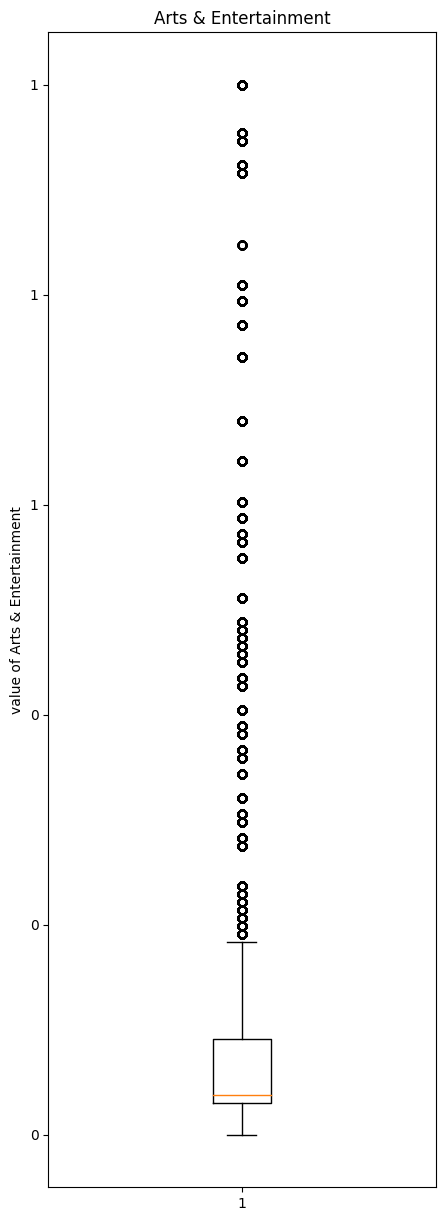

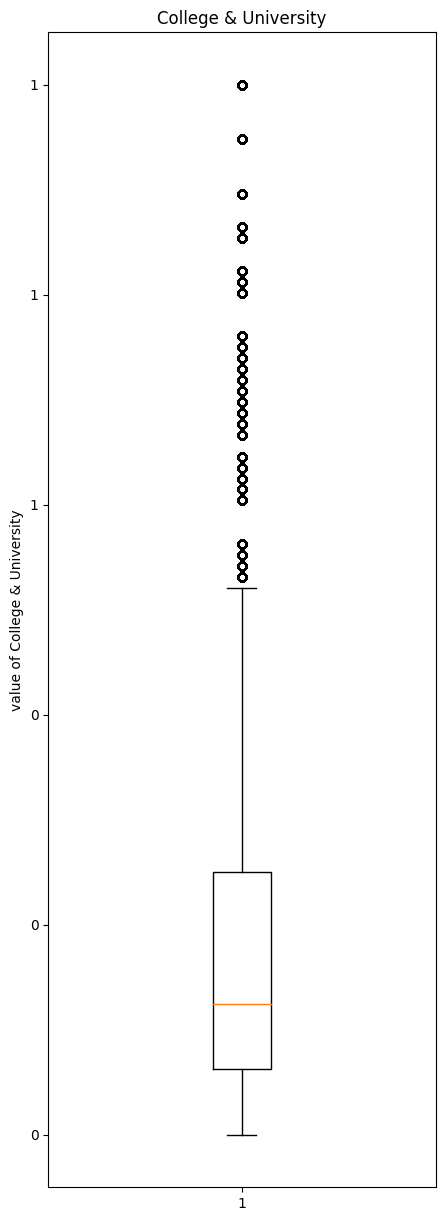

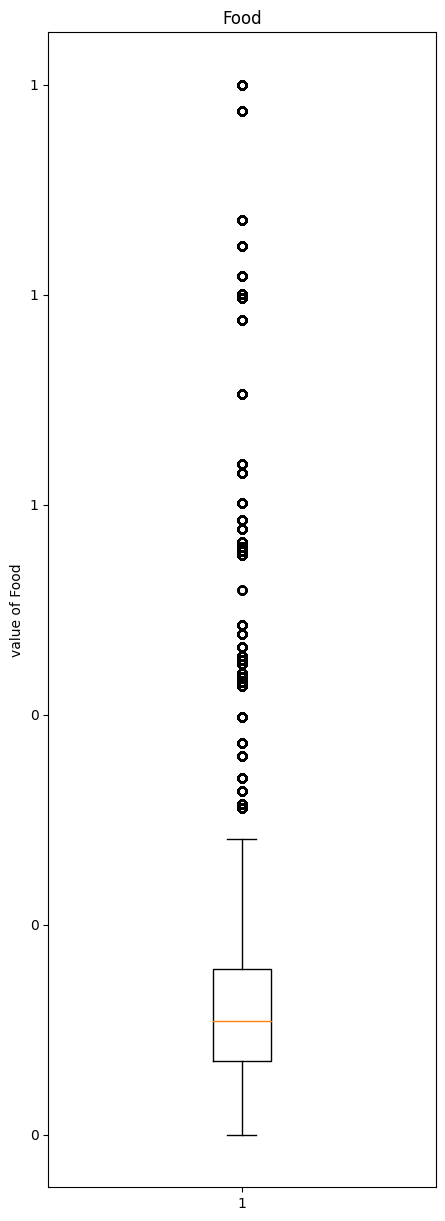

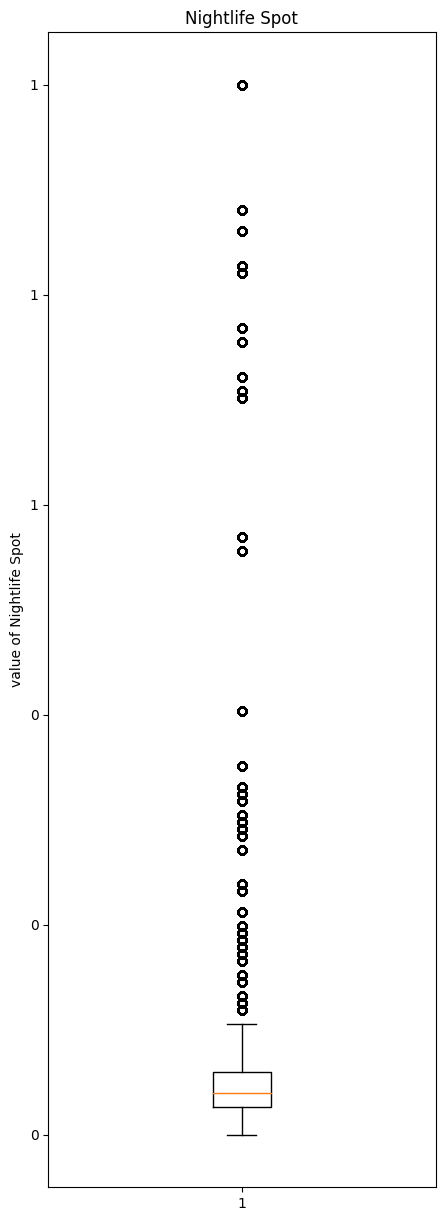

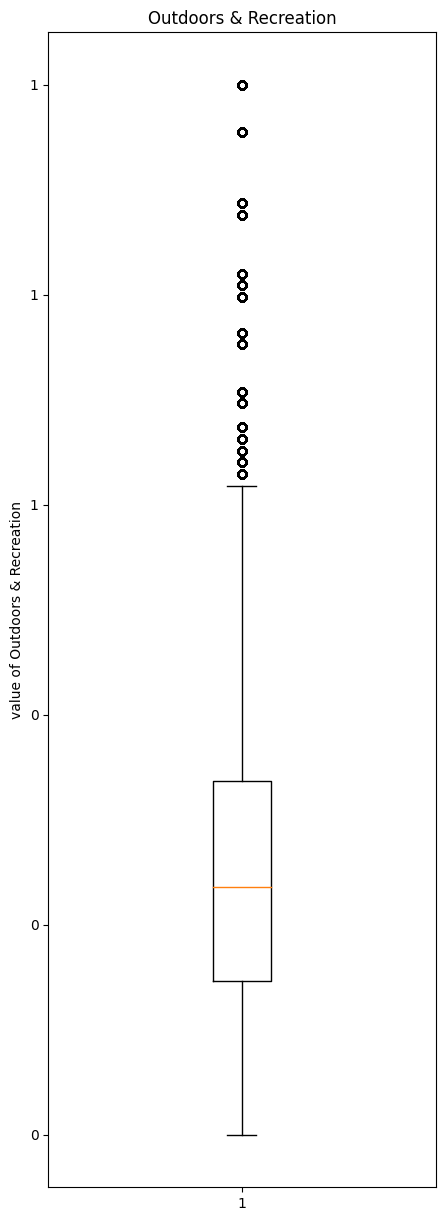

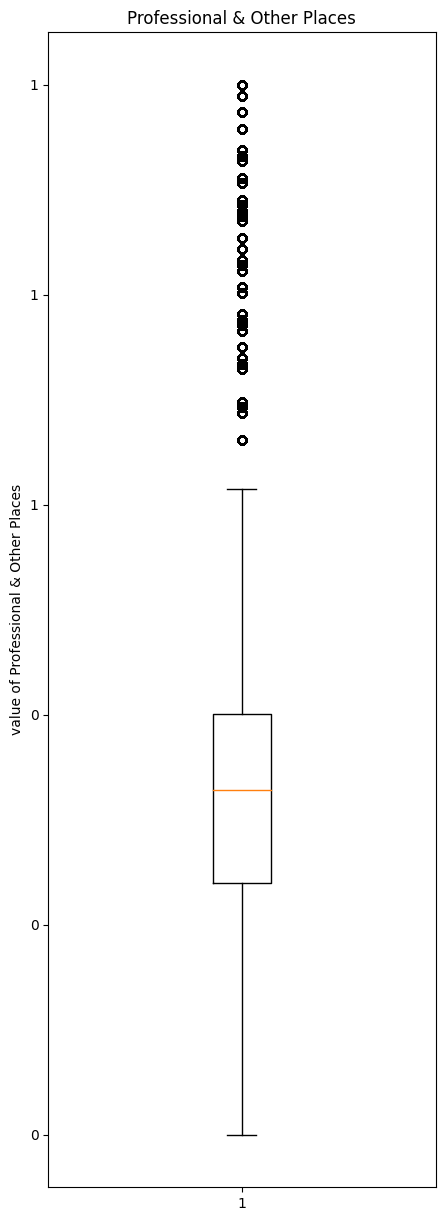

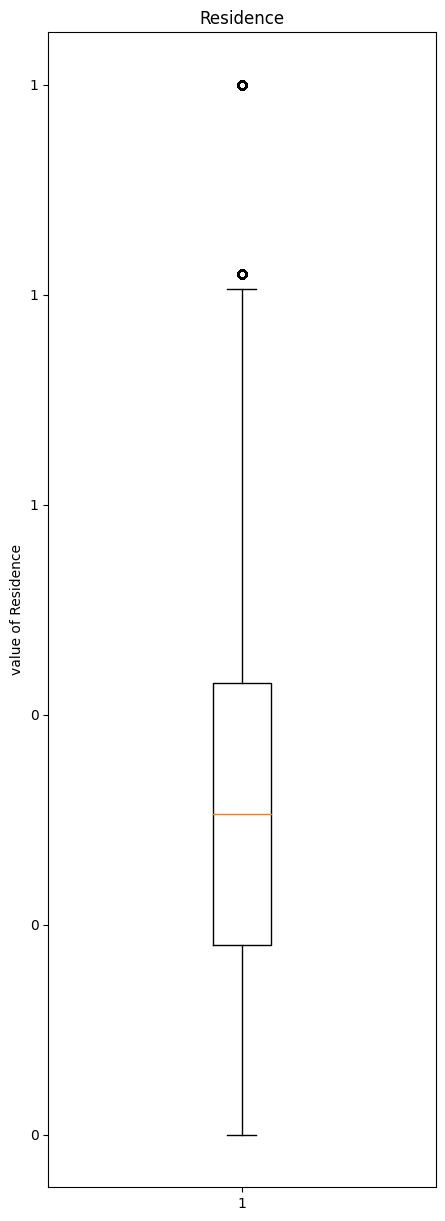

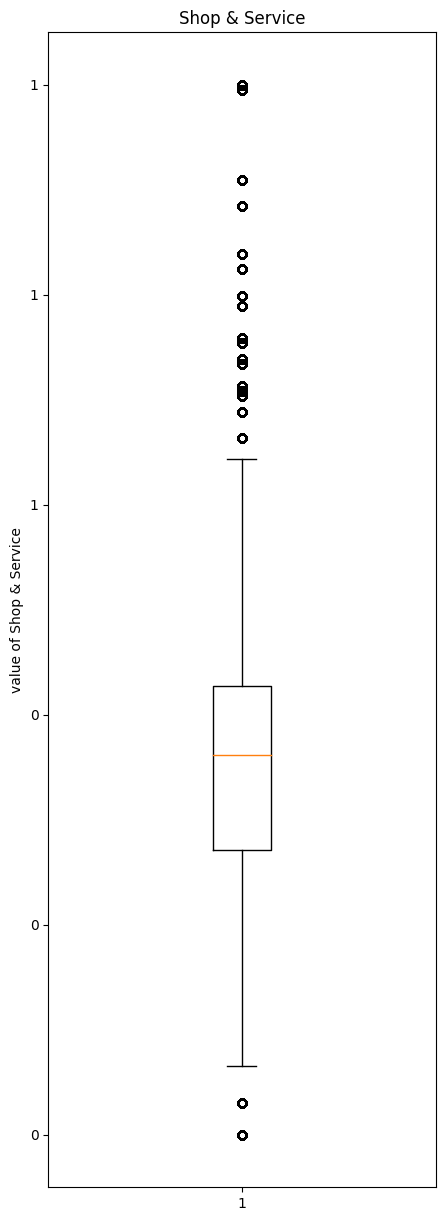

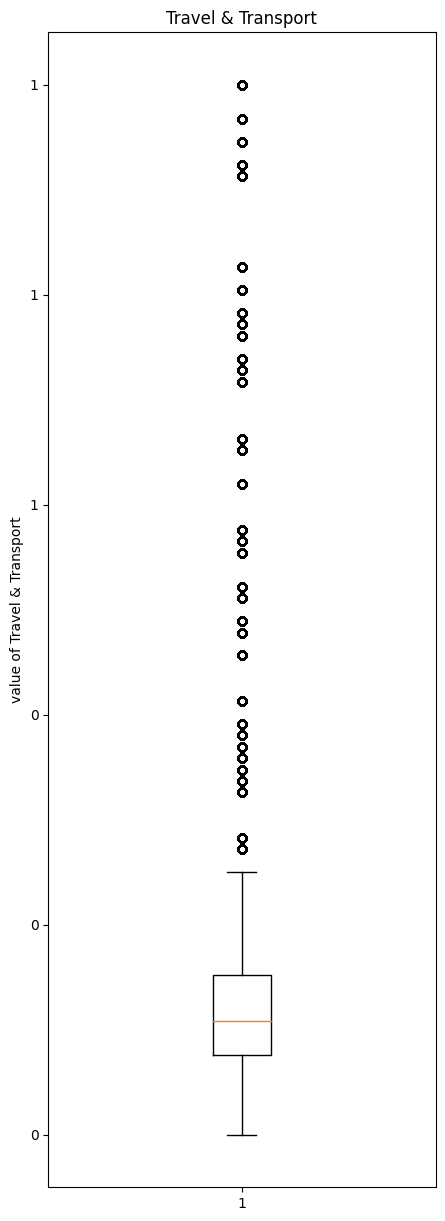

In [22]:
new_features = ["Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]

holidays = ["holiday"] 

other_items = ['enterance_minute', 'time_to_under', 'label', "Food", "Travel & Transport", "Shop & Service"]

big2d_list = [other_items, holidays]

big1d_list = [item for sublist in big2d_list for item in sublist]
big1d_list.remove('label')
big1d_list.remove('time_to_under')
data_X = data[big1d_list]
data_y = data["time_to_under"]


X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                    test_size = 0.2, random_state = 11)


reg = LinearRegression().fit(X_train, y_train)

reg2 = BayesianRidge().fit(X_train, y_train)

#reg3 = KernelRidge(alpha=1.0).fit(X_train, y_train)

y_pred = reg.predict(X_test)
y2_pred = reg2.predict(X_test)
#y3_pred = reg3.predict(X_test)



print("mape1: " + str(mape(y_pred, y_test)))
print("mse1: " + str(mse(y_pred, y_test)))

print("mape2: " + str(mape(y2_pred, y_test)))
print("mse2: " + str(mse(y2_pred, y_test)))

r2_sc = r2_score(y_test, y_pred)
print("r2_sc = ", r2_sc)

#print("mape3: " + str(mape(y3_pred, y_test)))
#print("mse3: " + str(mse(y3_pred, y_test)))


mape1: 0.5746303421348401
mse1: 29049.807855931173
mape2: 0.8064052382853296
mse2: 29049.80856582831
r2_sc =  0.4663942114038946


other_items = ['enterance_minute', 'time_to_under', 'label', "Travel & Transport", "Food", "College & University"]

big2d_list = [other_items, holidays]
mape1: 0.4140822123307393
mse1: 29060.732501273695
mape2: 0.4144146706242117
mse2: 29060.733204369295
r2_sc =  0.4661935404038646



Добавление параметра Cluster ухудшает результат, r2 = 0.46674681807402896

In [ ]:
plt.figure()
plt.plot(data["id"], data["enterance_minute"], "b")
plt.plot(data["id"], data["time_to_under"], "r", alpha = 0.2)
plt.figure()
plt.plot(data["enterance_minute"], data["time_to_under"], "b")
plt.figure()
plt.plot(data["holiday"], data["time_to_under"], "r")

In [ ]:
data2 = data.copy()

In [ ]:
data = data2.copy()

In [ ]:
len(data.columns)

In [ ]:
len(data.columns)

In [ ]:
len(small_groups)

In [ ]:
#categorical_features = [x for x in categorical_features if x not in small_groups]
station_feature = [feature for feature in categorical_features if feature.startswith("x0")]
ticket_feature = [feature for feature in categorical_features if feature.startswith("x1")]
line_feature = [feature for feature in categorical_features if feature.startswith("x2")]
entrance_to_station_feature = [feature for feature in categorical_features if feature.startswith("x3")]

In [151]:
data.head(3)

Unnamed: 0.1  Unnamed: 0            id                         ticket_id  \
0             0           0  0.000000e+00  40BD89EC85646EFB69E283F39C298E60   
1             1           1  9.165735e-07  126727A96489CC976A8C08E5CEB00542   
2             2           2  1.833147e-06  D28CE6A9E0E5B6D213470A97CFF32485   

            ticket_type_nm  entrance_id           entrance_nm  station_id  \
0          Пропуск FacePay         2402         Лефортово БКЛ       11007   
1     СК учащегося 30 дней          110  Войковская ( Южный )        2006   
2  БСК дружинника г.Москвы          110  Войковская ( Южный )        2006   

   station_nm  line_id  ... College & University      Food  Nightlife Spot  \
0   Лефортово       11  ...             0.000000  0.000000        0.000000   
1  Войковская        2  ...             0.510417  0.244813        0.039735   
2  Войковская        2  ...             0.510417  0.244813        0.039735   

   Outdoors & Recreation  Professional & Other Places  Residence  \
0               0.000000                     0.000000   0.000000   
1               0.460674                     0.510417   0.236111   
2               0.460674                     0.510417   0.236111   

   Shop & Service  Travel & Transport  enterance_minute  Cluster  
0        0.000000            0.000000           0.21322      1.0  
1        0.708543            0.195652           0.21322      1.0  
2        0.708543            0.195652           0.21322      1.0  

[3 rows x 774 columns]

# ВЫБРОСЫ

In [ ]:
data2 = data

def calculate_outliners(data):
    
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

feature_groups = ["ticket_type_nm", "station_id", "line_id", "entrance_id"]

for f_group in feature_groups:
    print(f_group)
    for feature in list(data[f_group].unique()):

        tu = data2[data2[f_group] == feature]

        bound = calculate_outliners(tu["time_to_under"])
        print(bound[0])
        print(bound[1])
        indexes = tu[(tu['time_to_under']<bound[0]) | (tu['time_to_under']>bound[1])].index
        print("Дропается " + str(len(list(indexes))) + " записей")
        
        data2.drop(index = indexes, inplace = True)

    
    


ticket_type_nm
-352.29166666666686
1167.375
Дропается 0 записей
-186.17499999999984
1180.5583333333332
Дропается 0 записей
228.56041666666664
1050.2770833333334
Дропается 7377 записей
-133.9333333333334
1120.8666666666668
Дропается 0 записей
341.1
842.7999999999998
Дропается 3889 записей
415.15000000000015
975.9499999999998
Дропается 848 записей
-575.2291666666667
1247.0708333333334
Дропается 0 записей
-157.65625000000006
1205.79375
Дропается 0 записей
-236.43124999999998
1166.2854166666666
Дропается 0 записей
-188.06666666666666
1104.2
Дропается 0 записей
-202.57916666666665
937.6541666666667
Дропается 22 записей
-187.65833333333336
1113.2416666666668
Дропается 0 записей
-340.01458333333346
1194.0020833333335
Дропается 0 записей
-104.27499999999998
879.7916666666666
Дропается 30 записей
-270.57916666666654
1201.2541666666666
Дропается 0 записей
-202.71458333333334
1182.4354166666667
Дропается 0 записей
-224.23333333333332
990.3
Дропается 2 записей
-168.24583333333334
1117.0875
Дропает

In [198]:
data = data2

/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/1947445512.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 15))


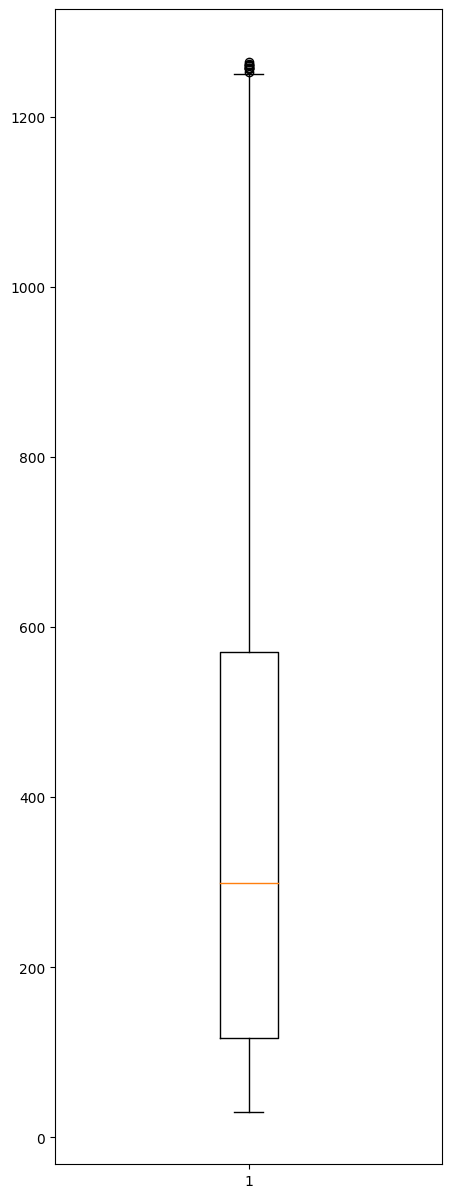

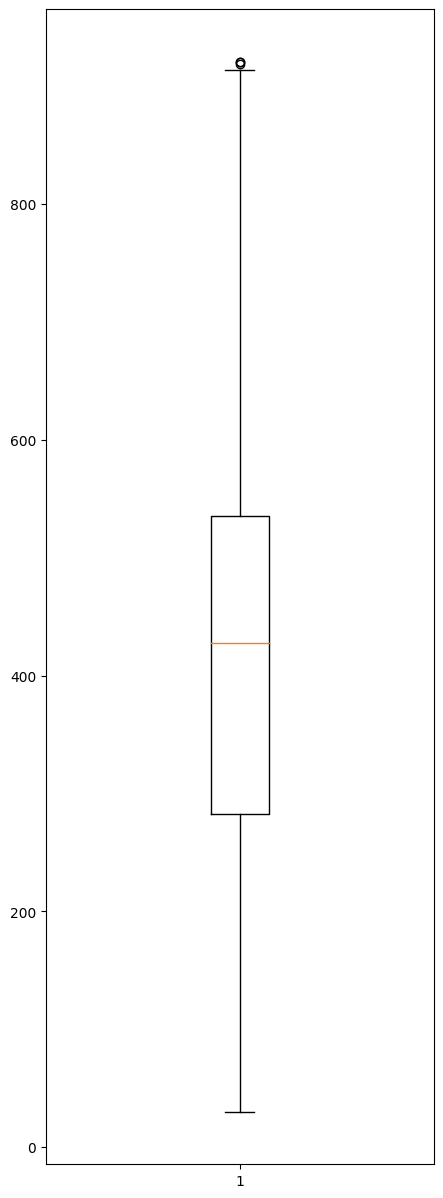

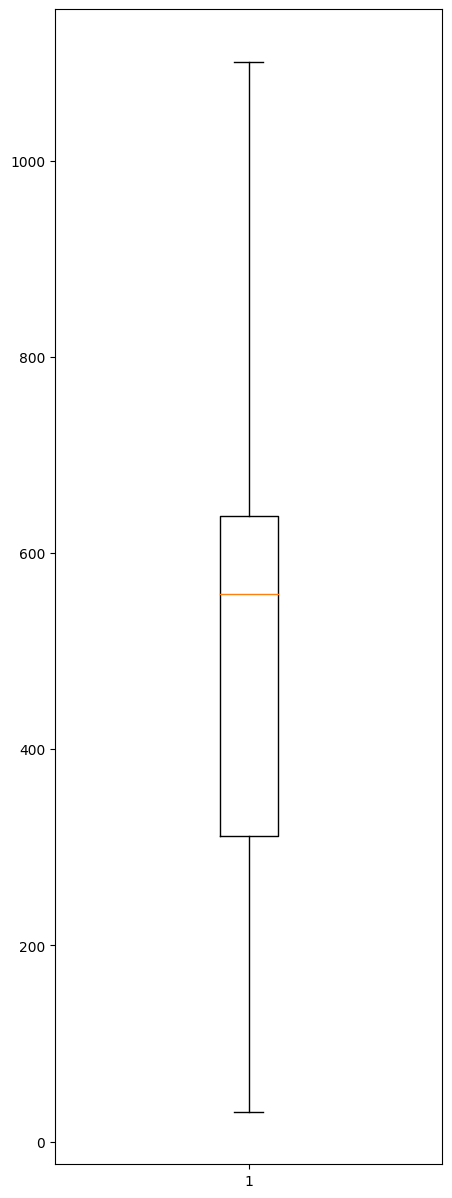

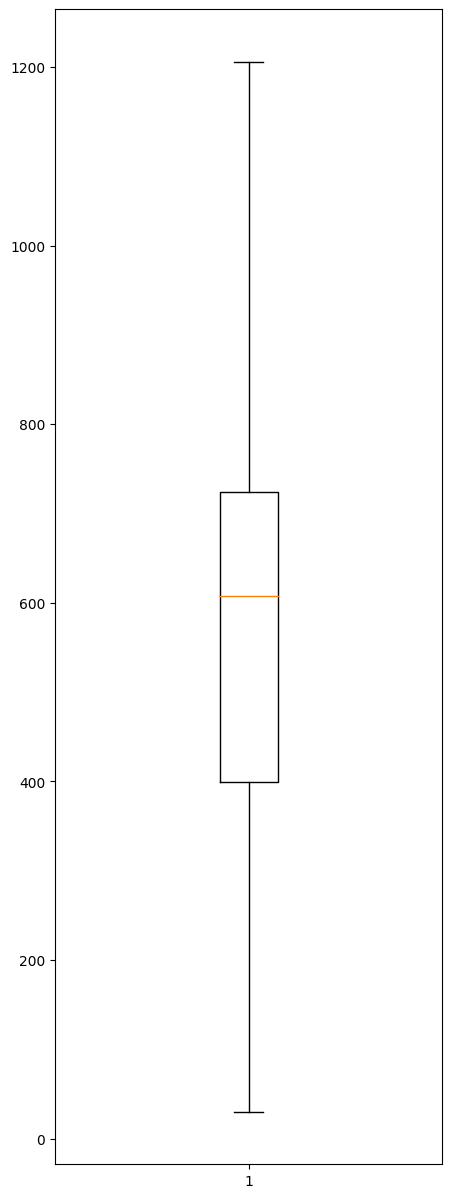

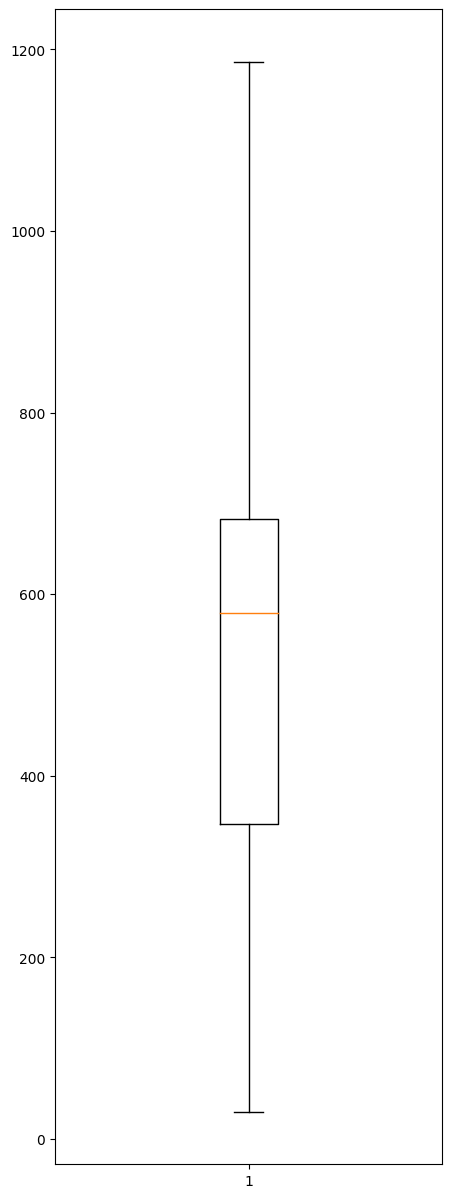

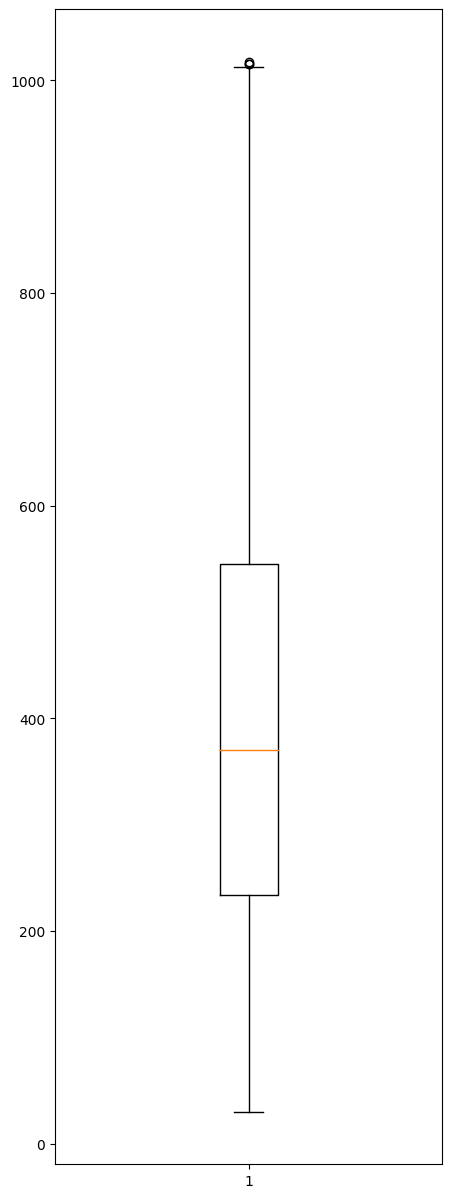

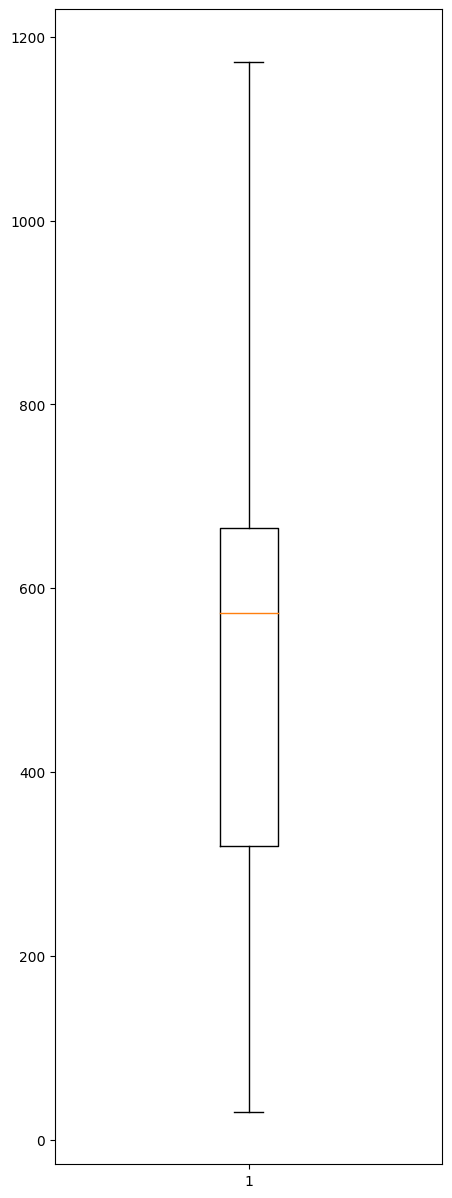

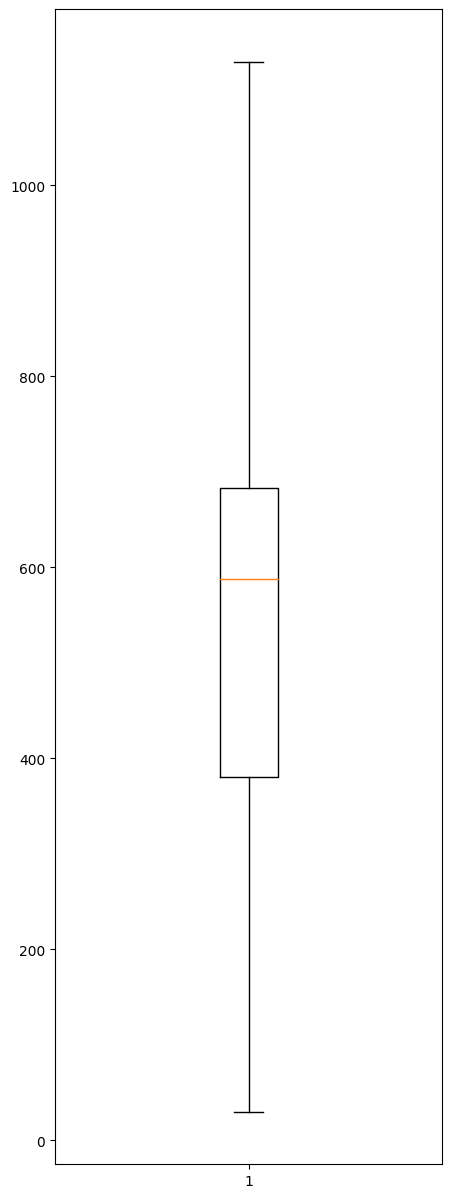

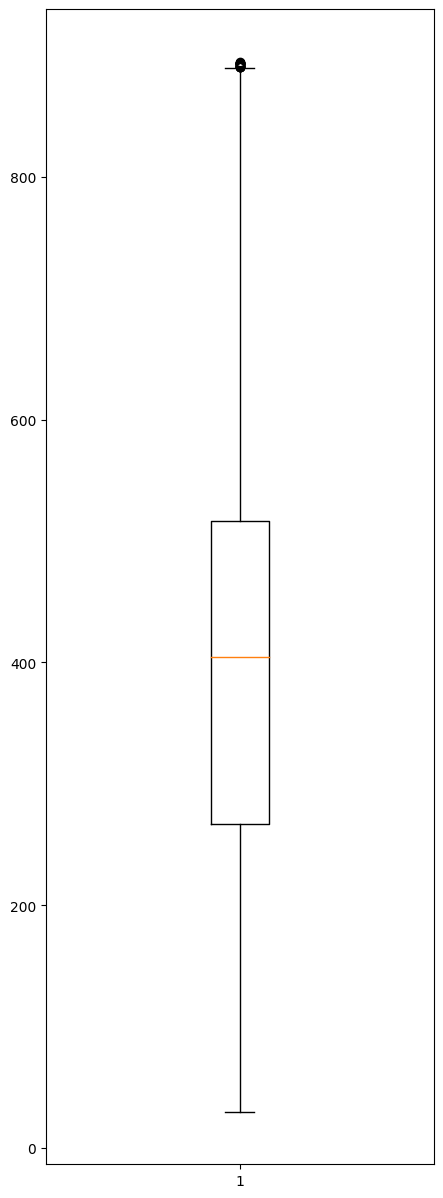

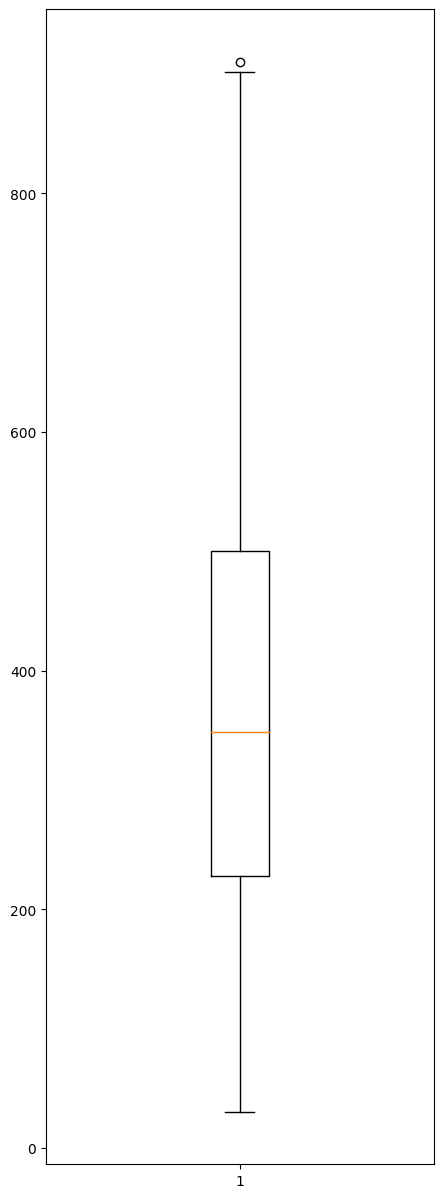

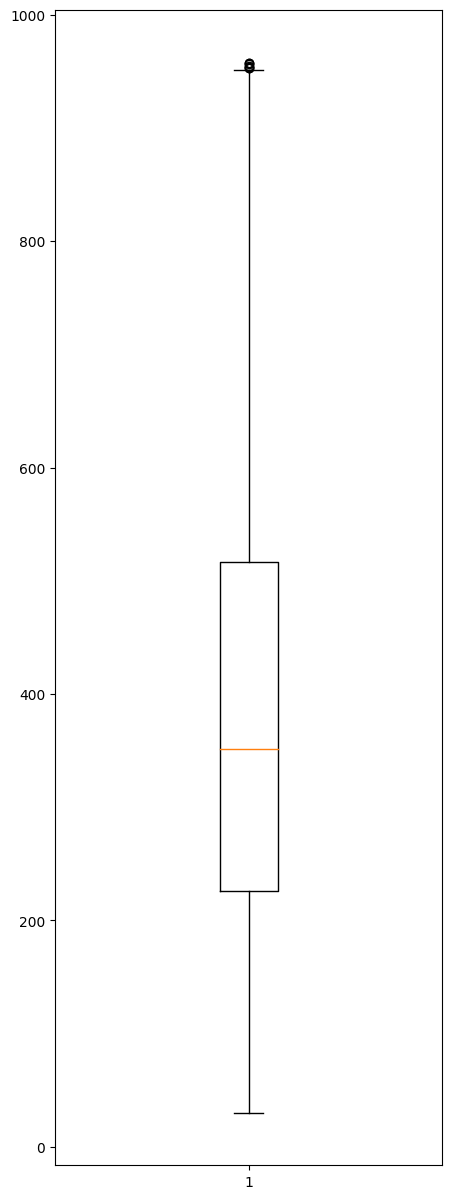

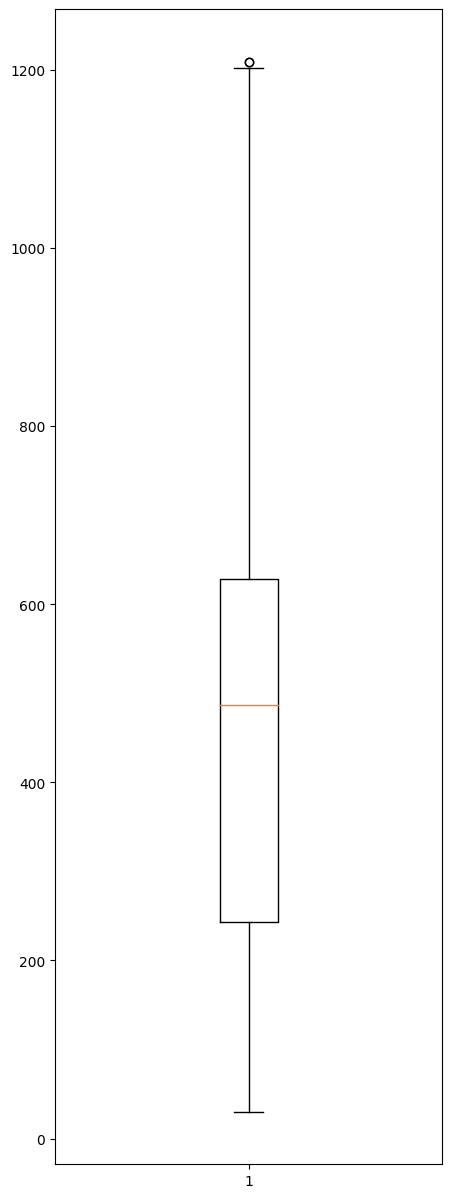

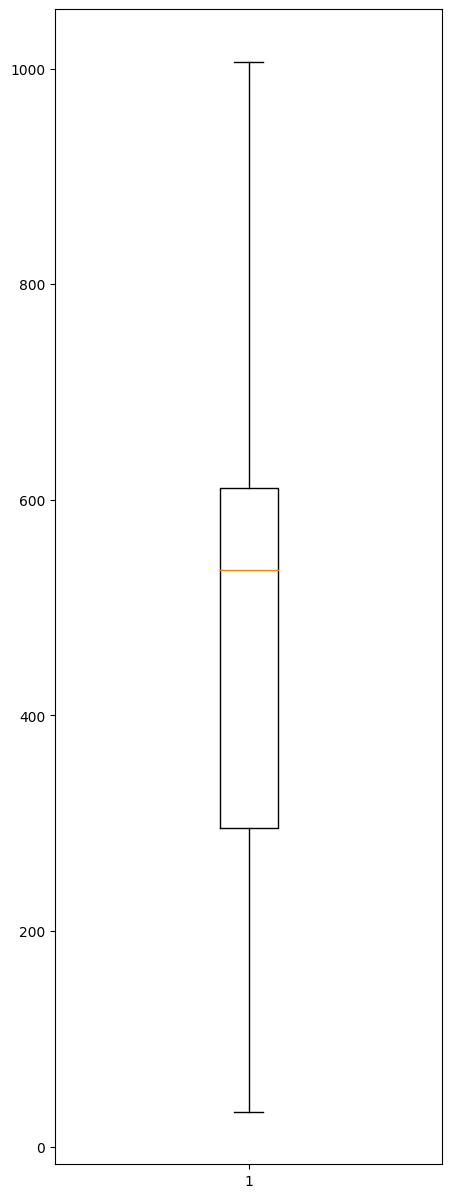

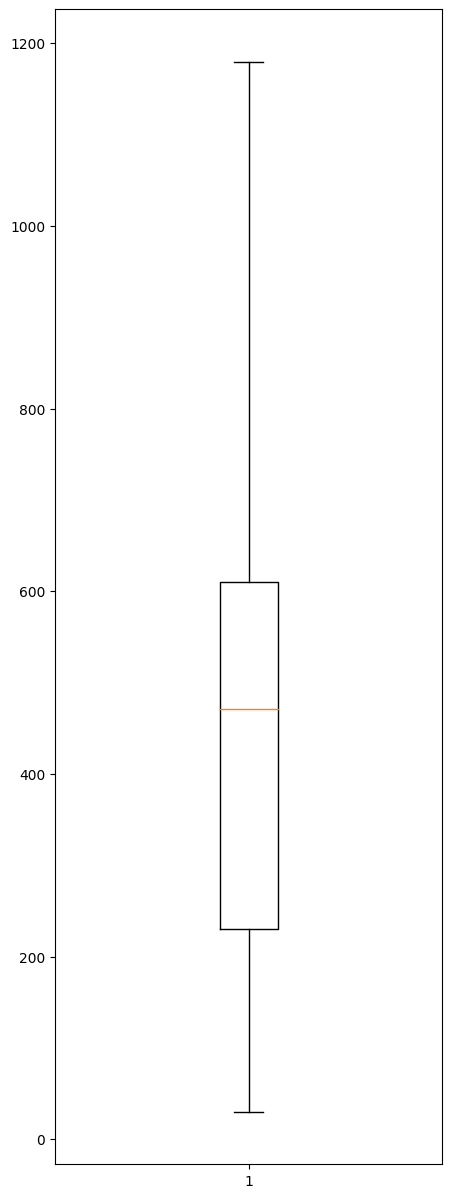

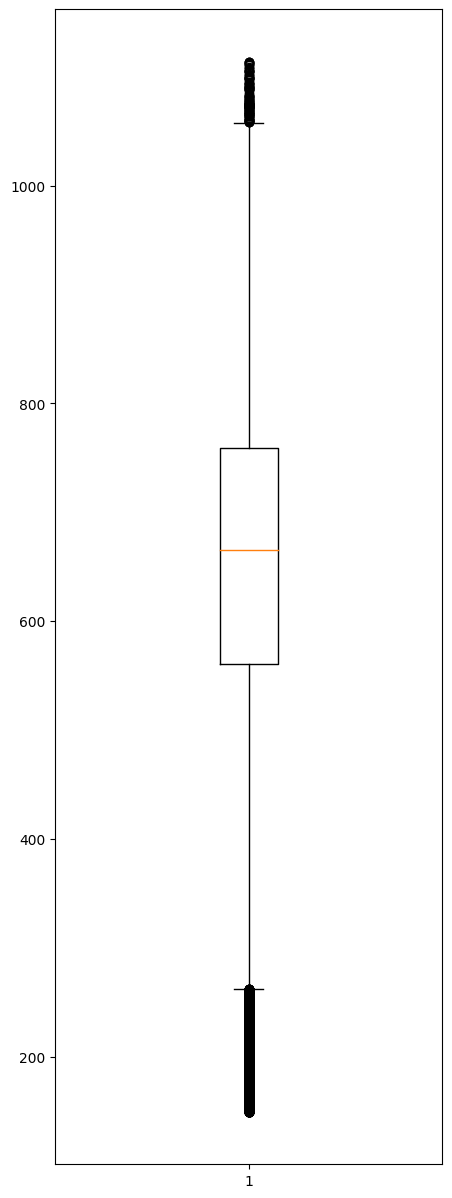

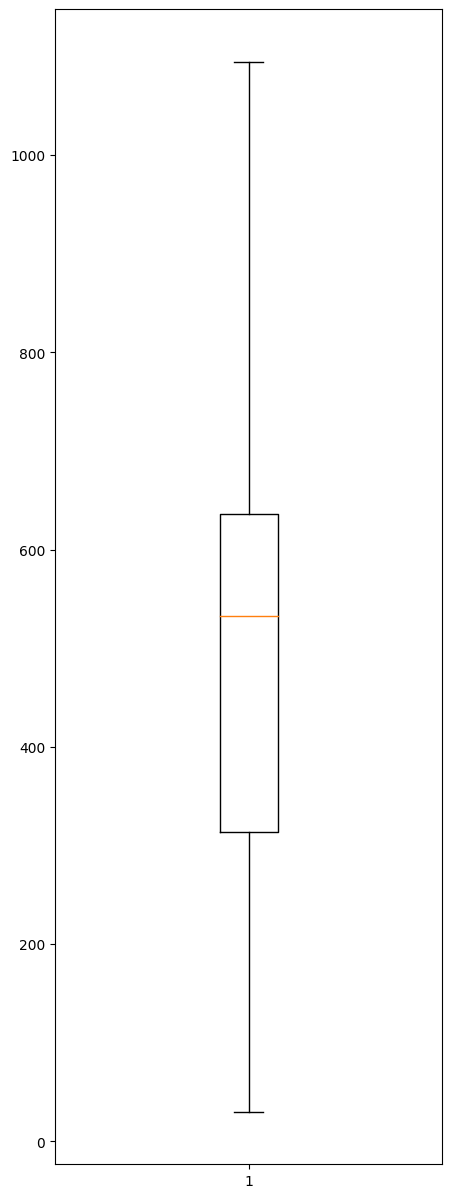

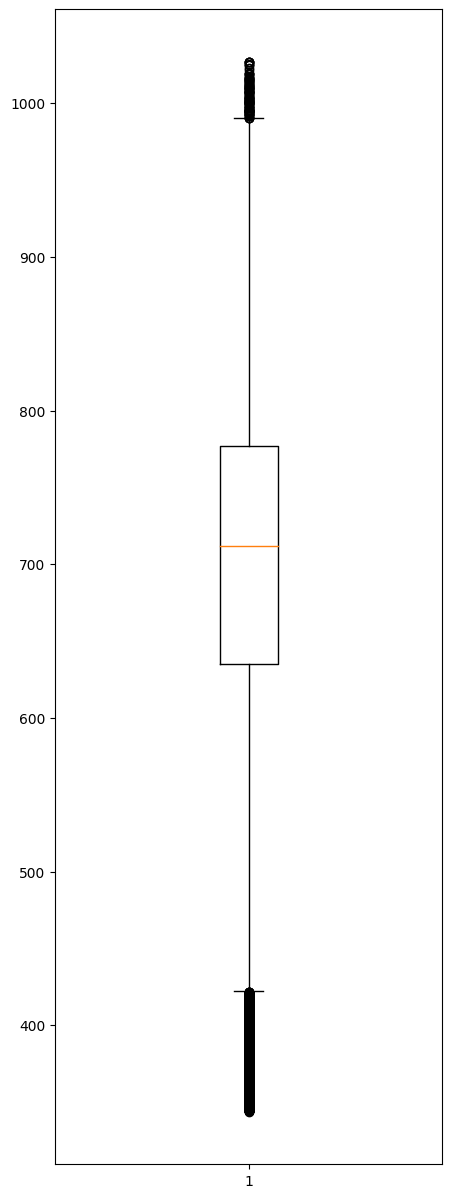

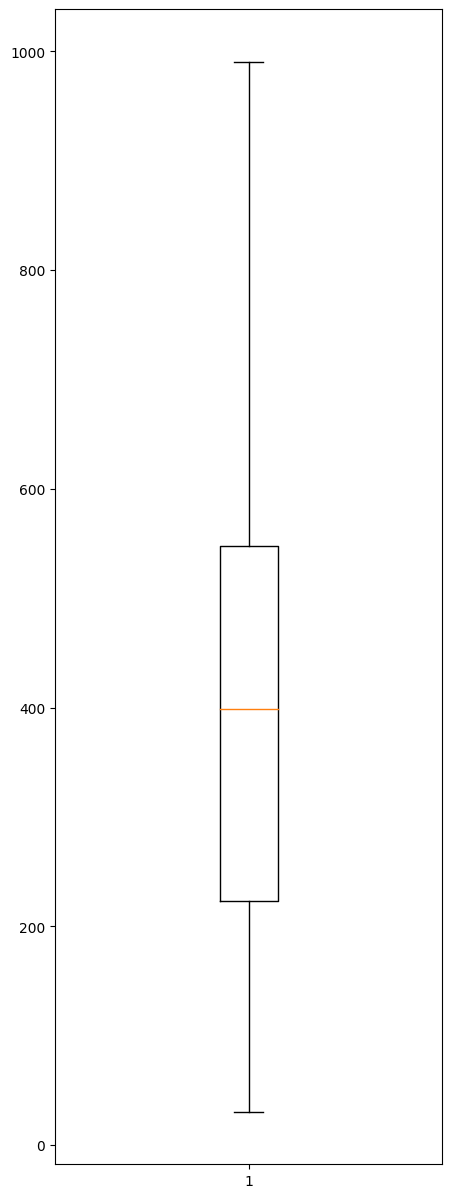

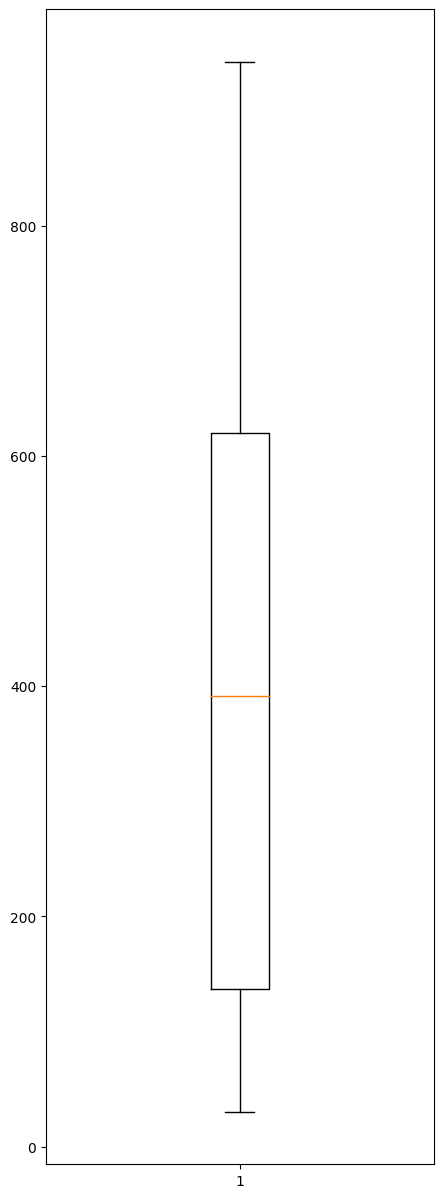

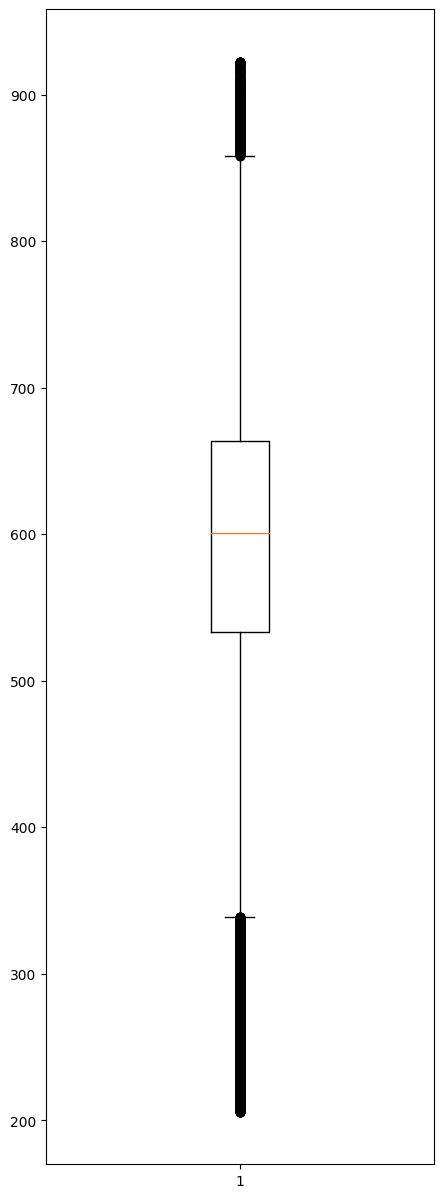

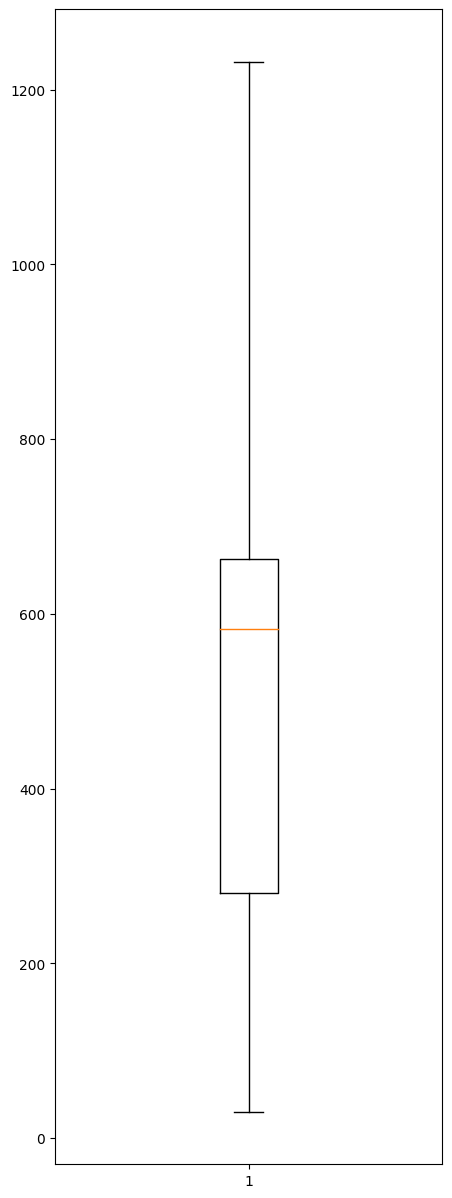

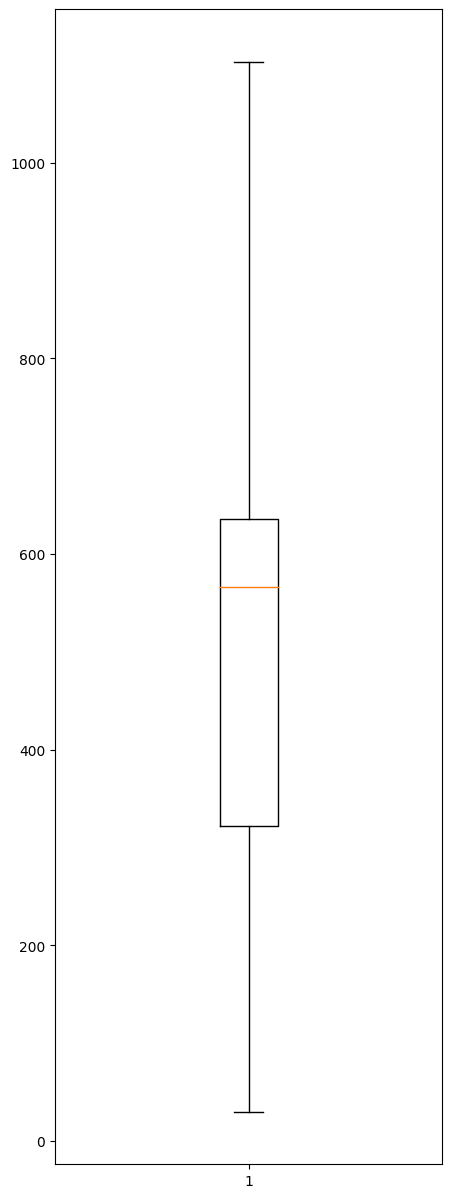

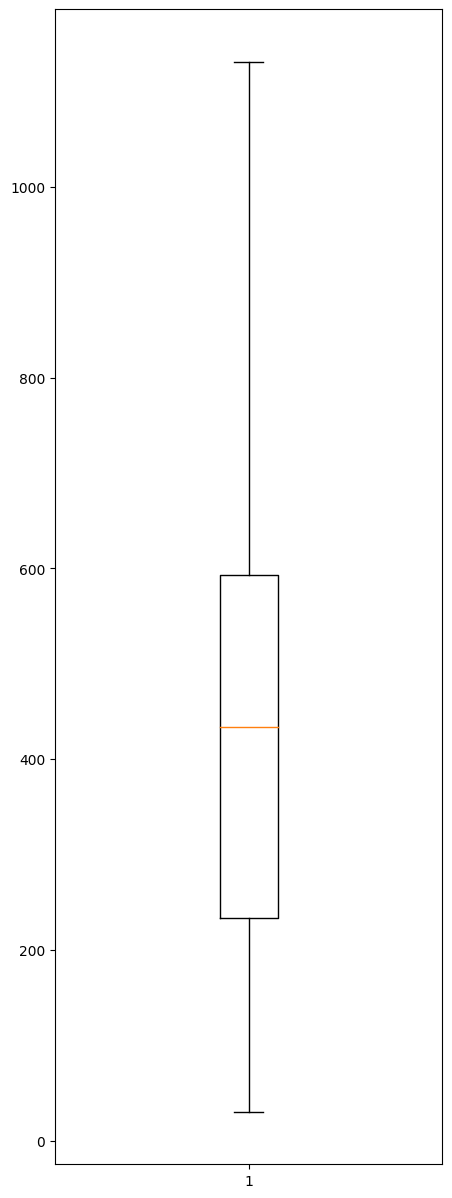

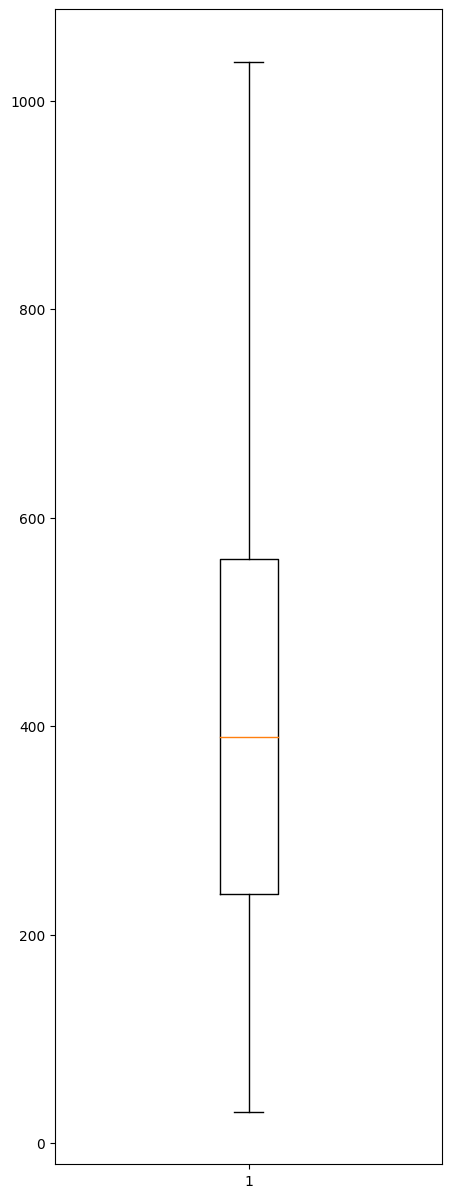

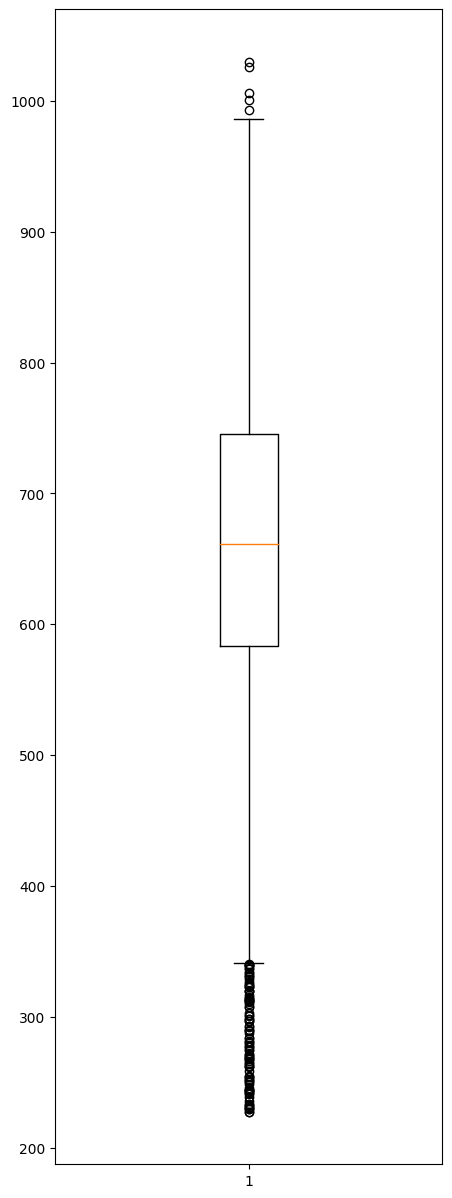

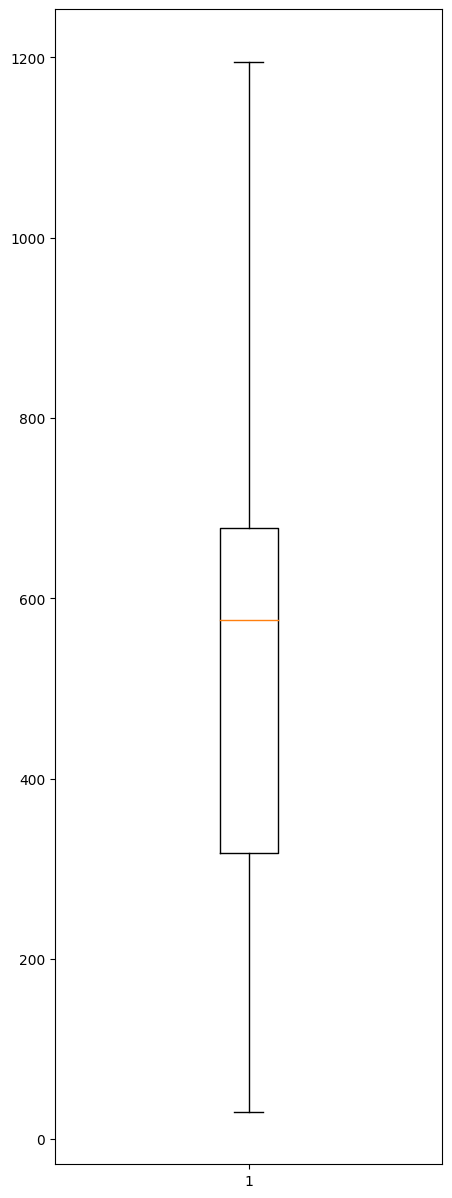

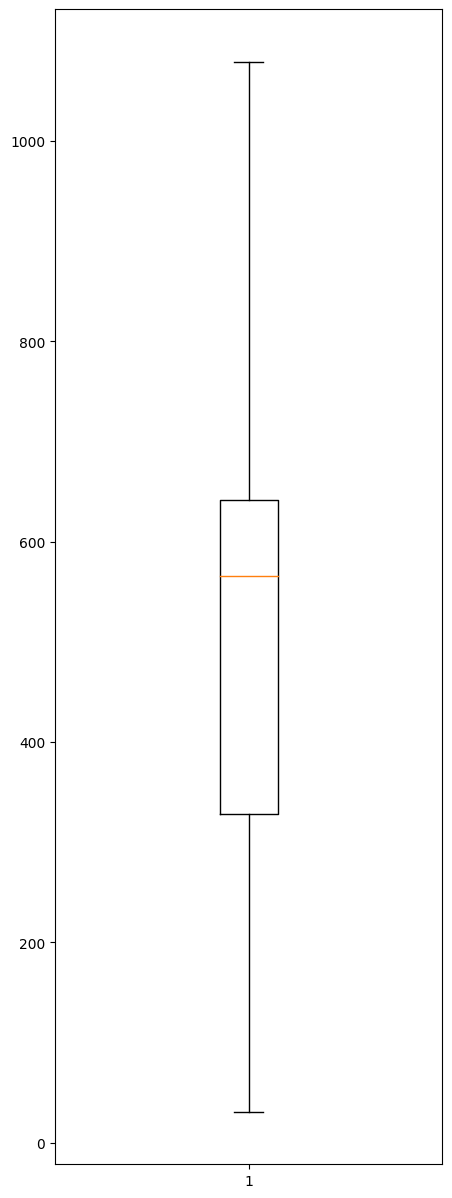

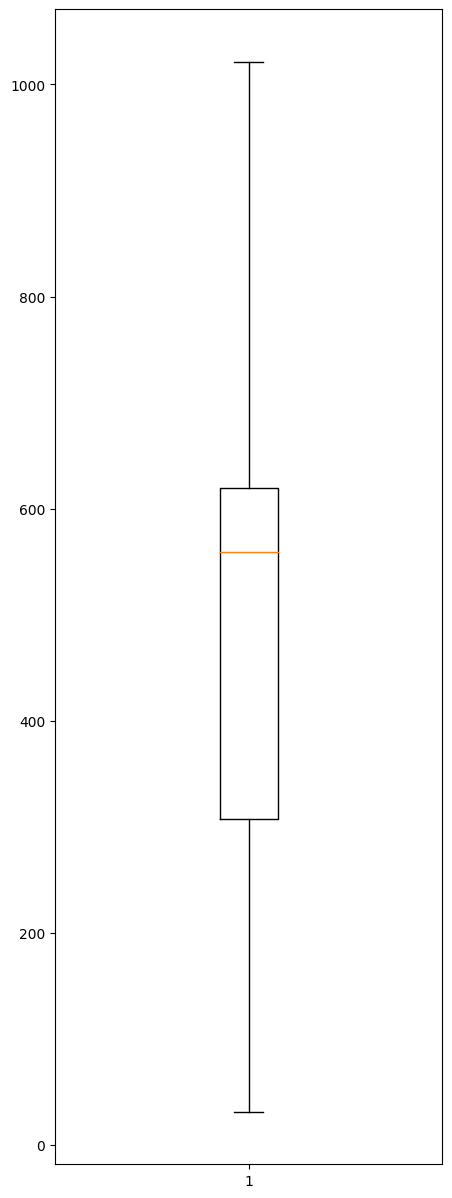

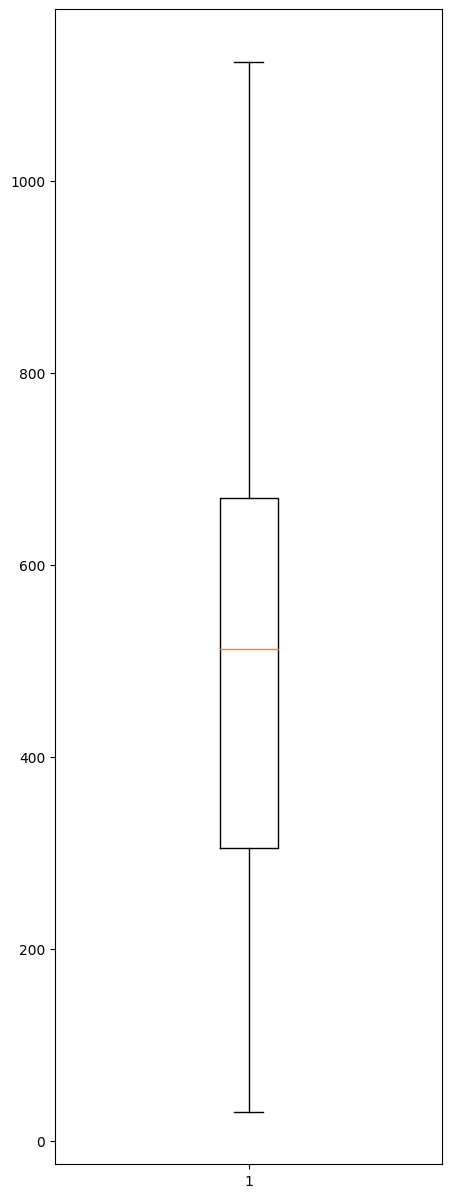

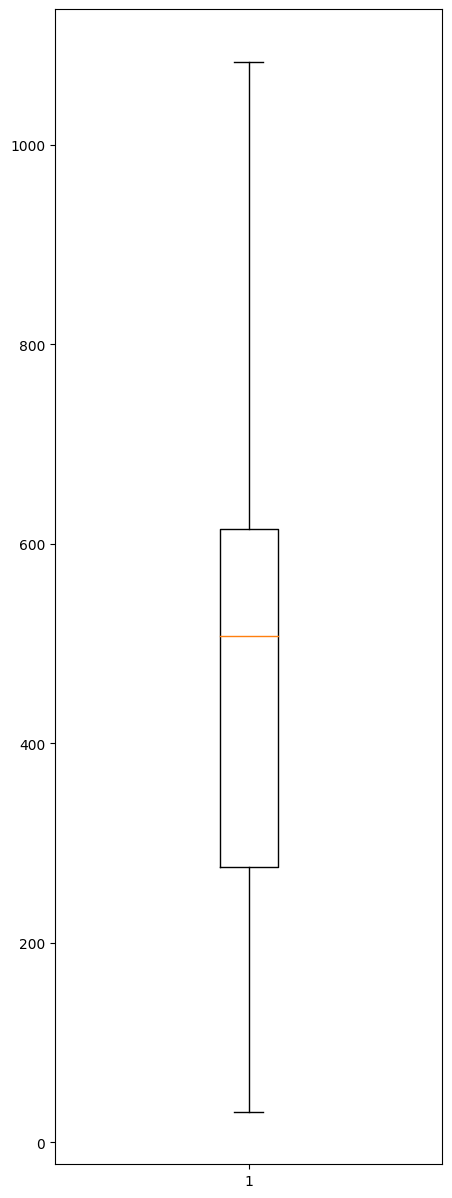

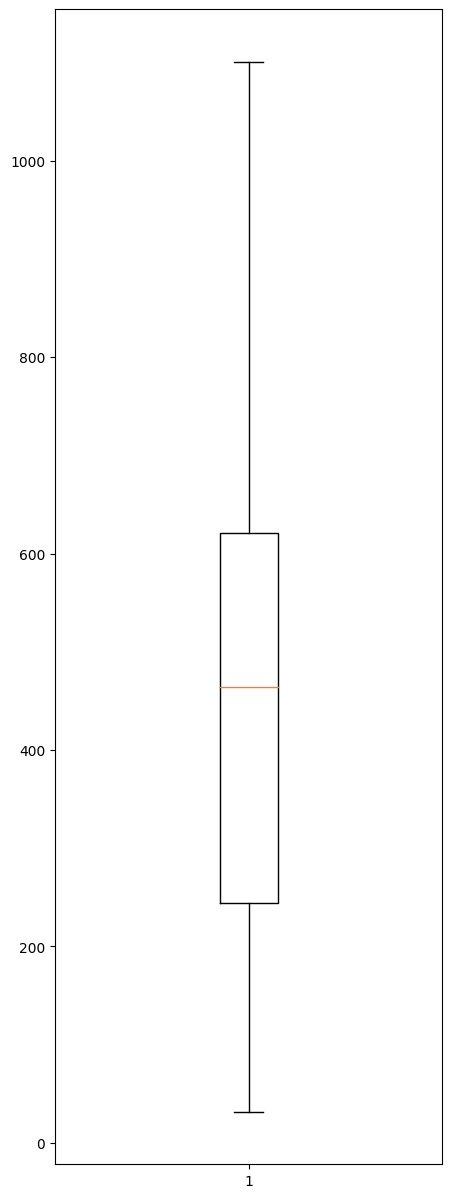

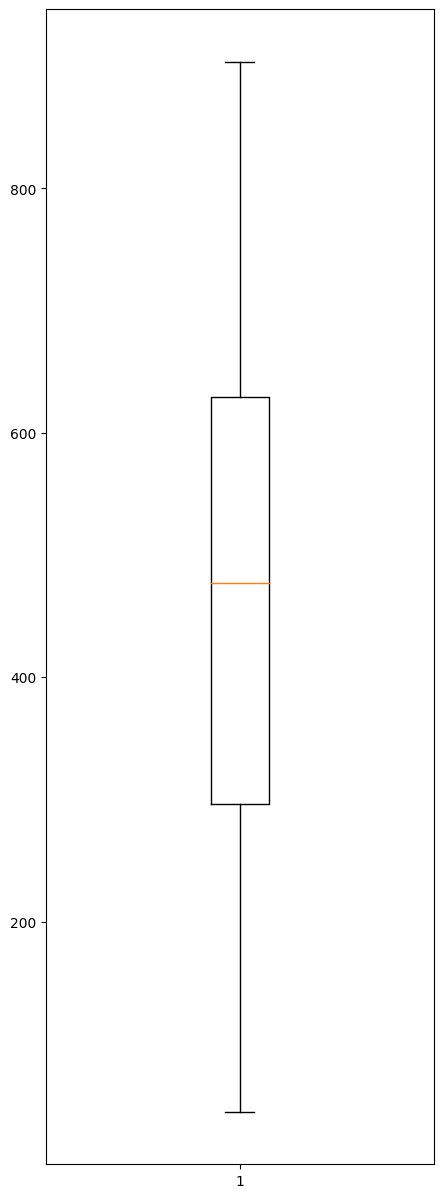

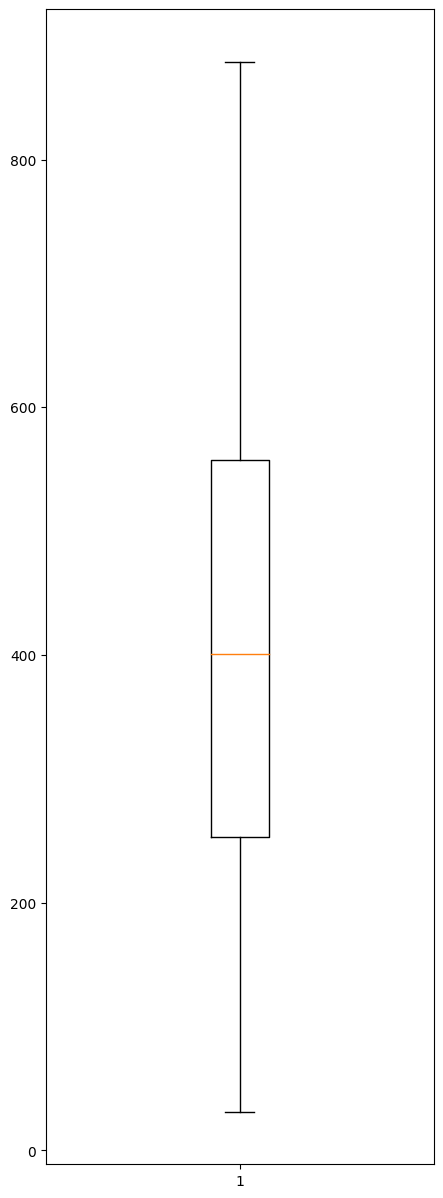

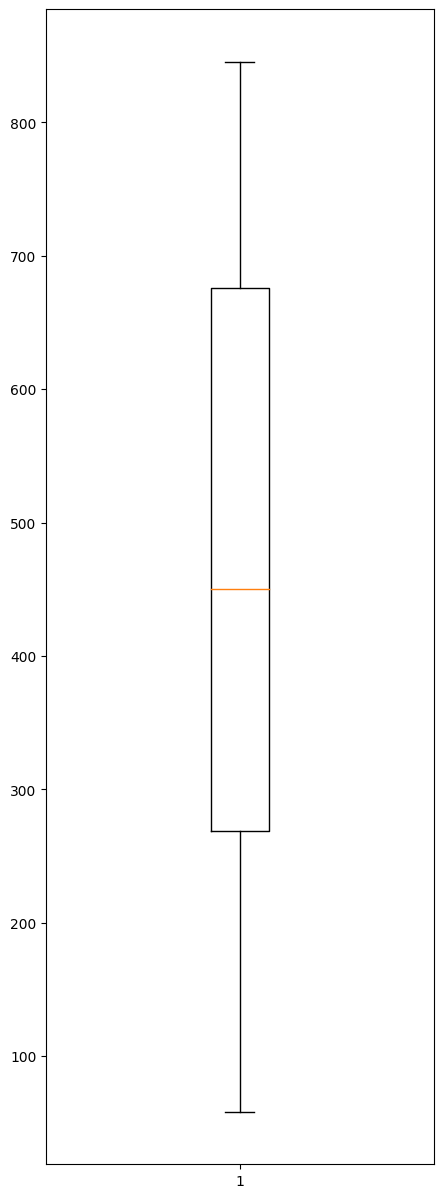

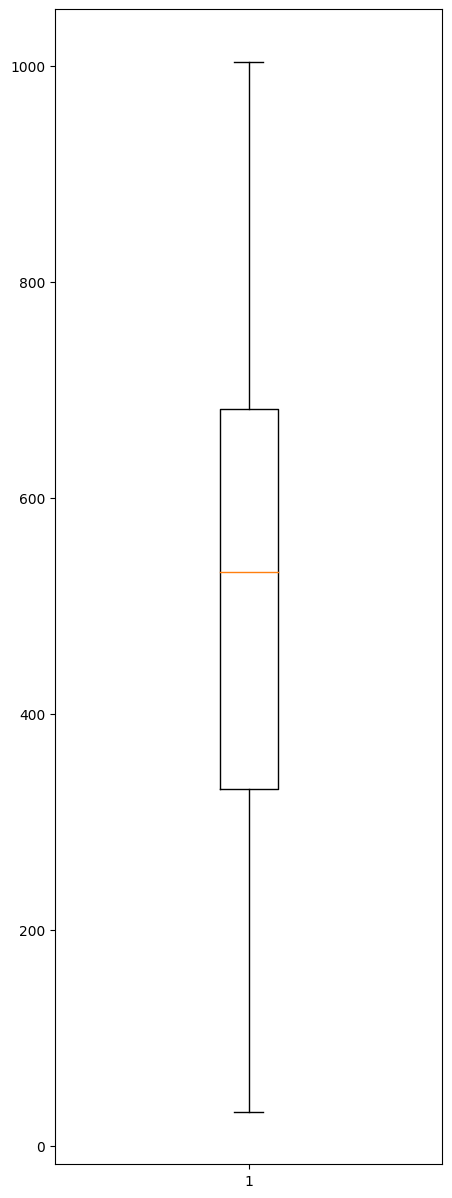

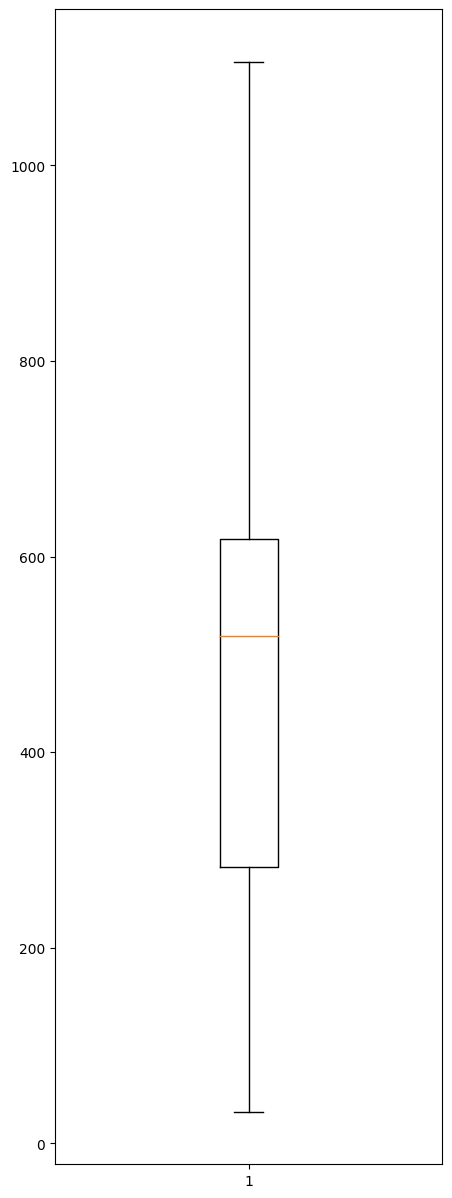

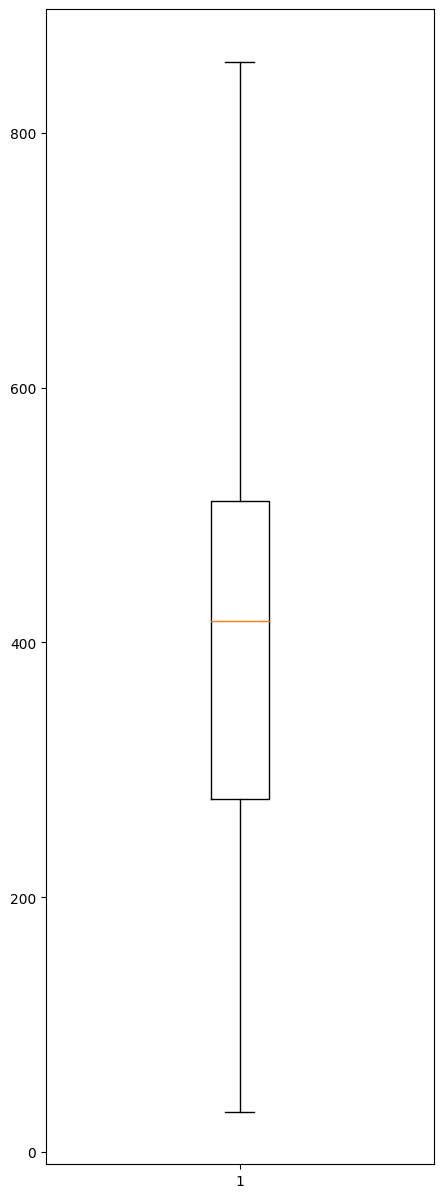

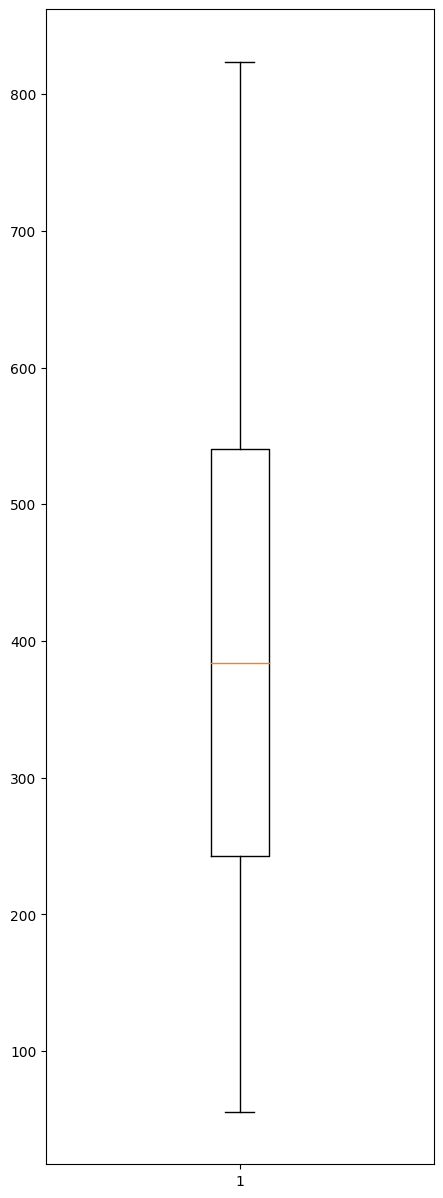

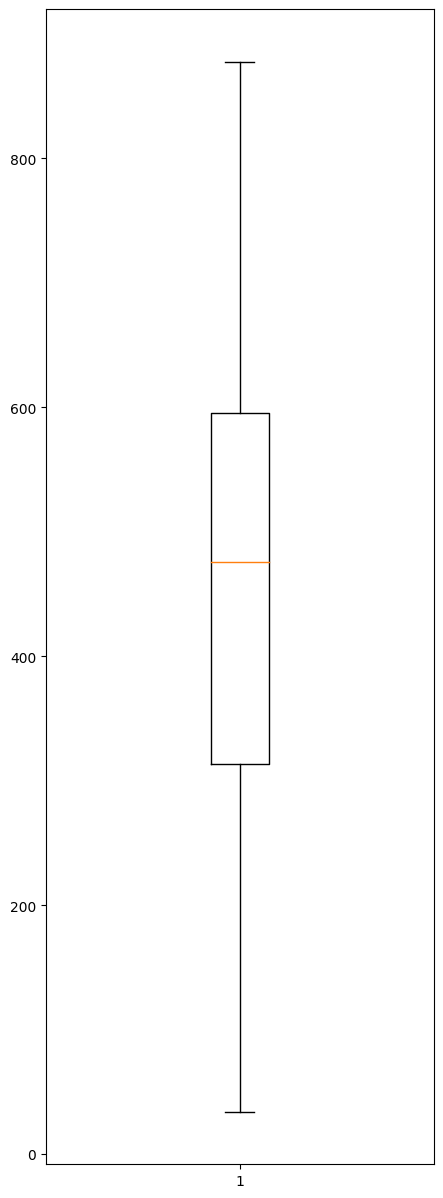

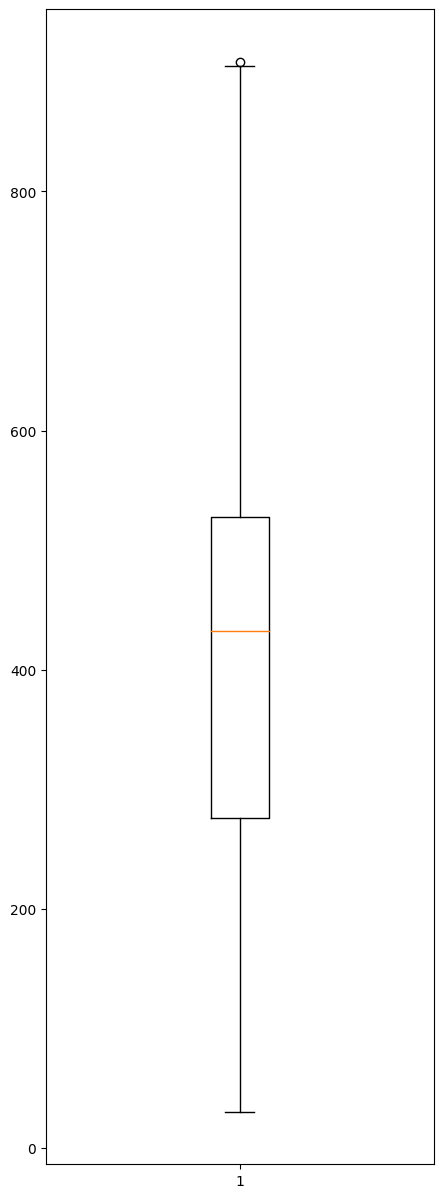

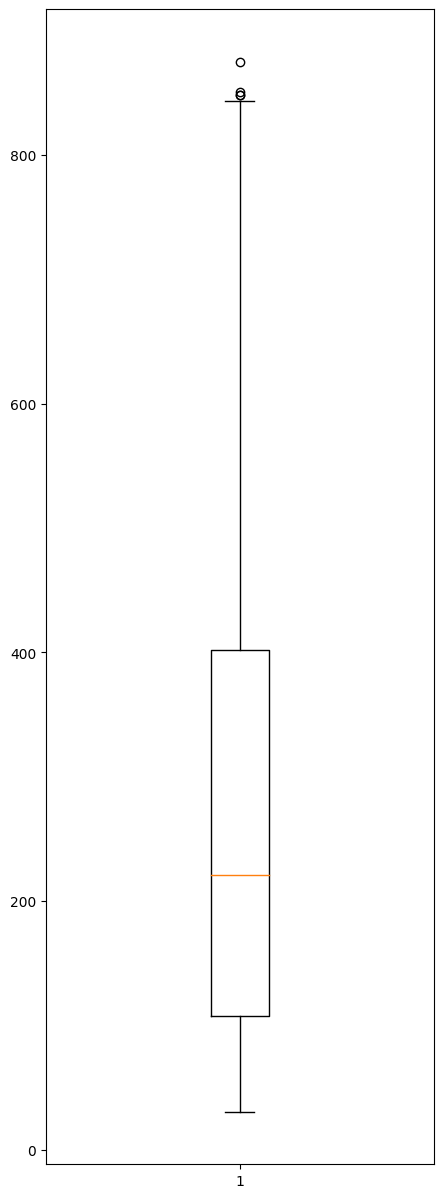

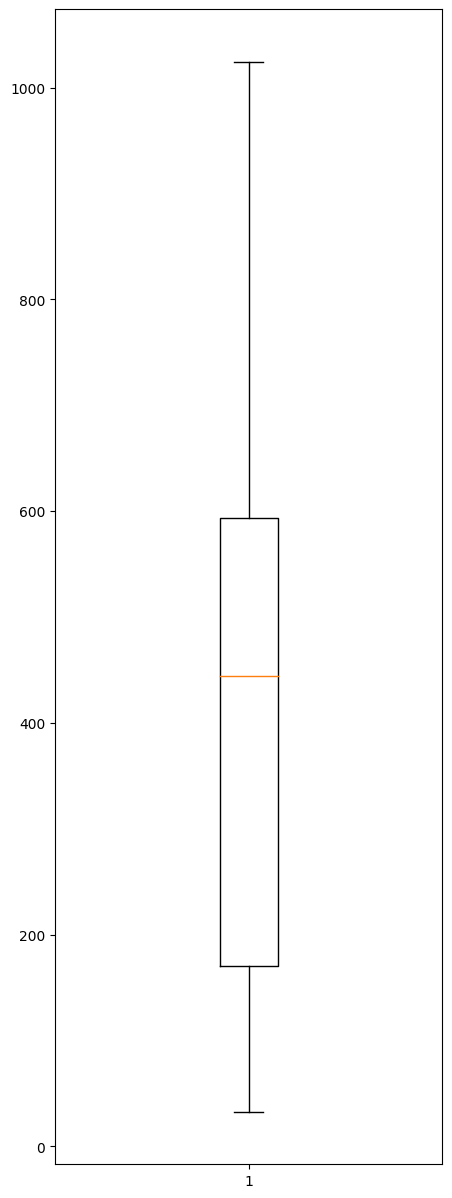

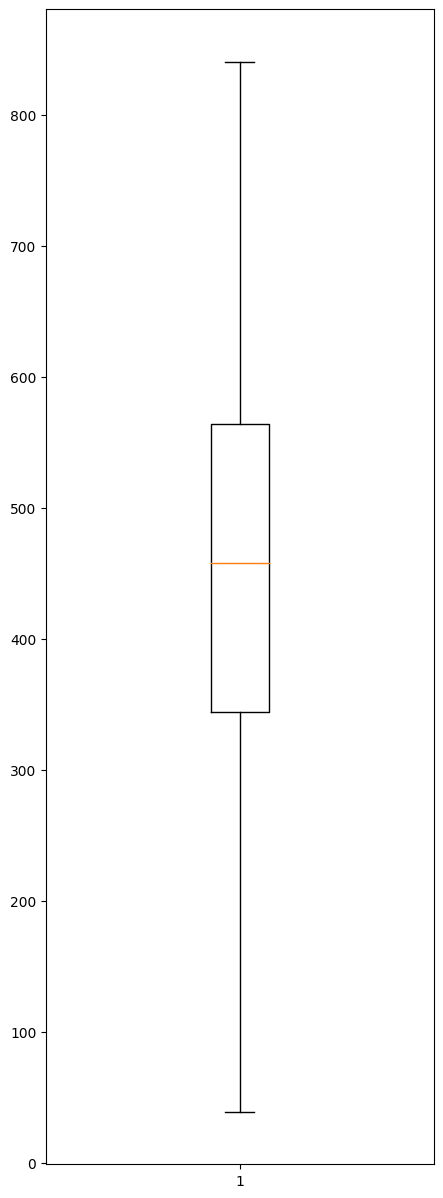

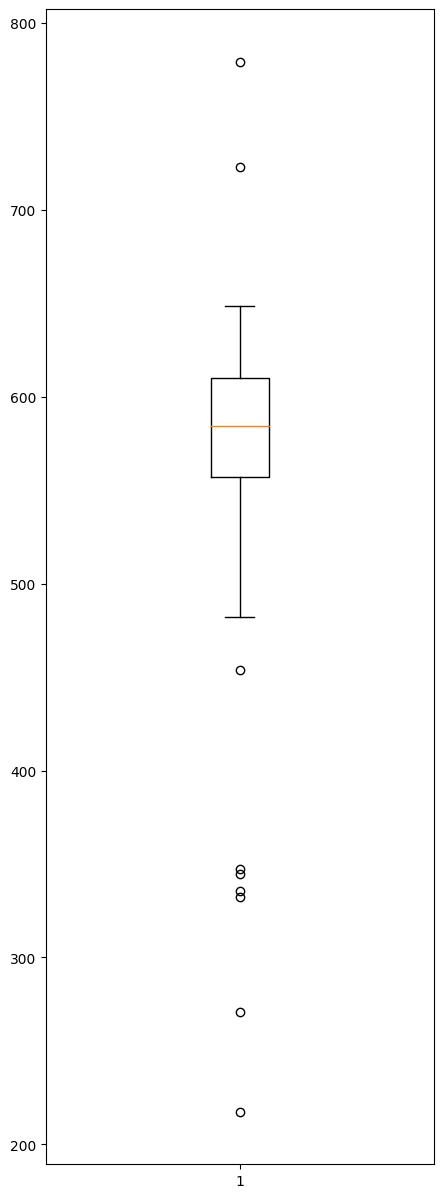

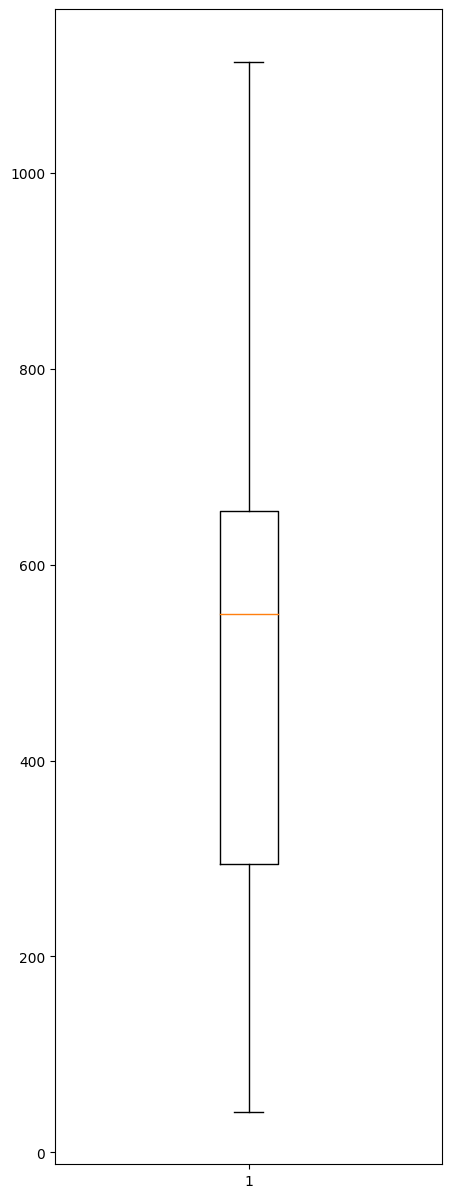

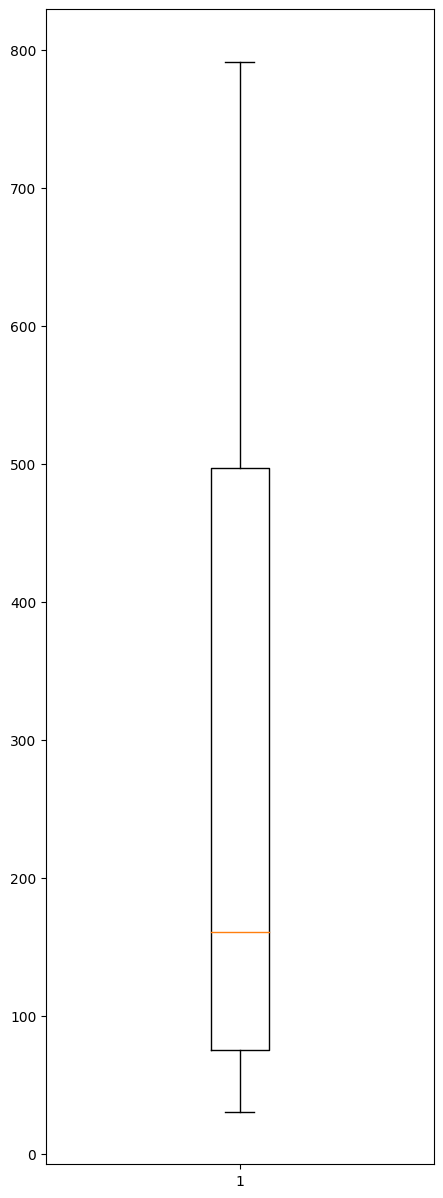

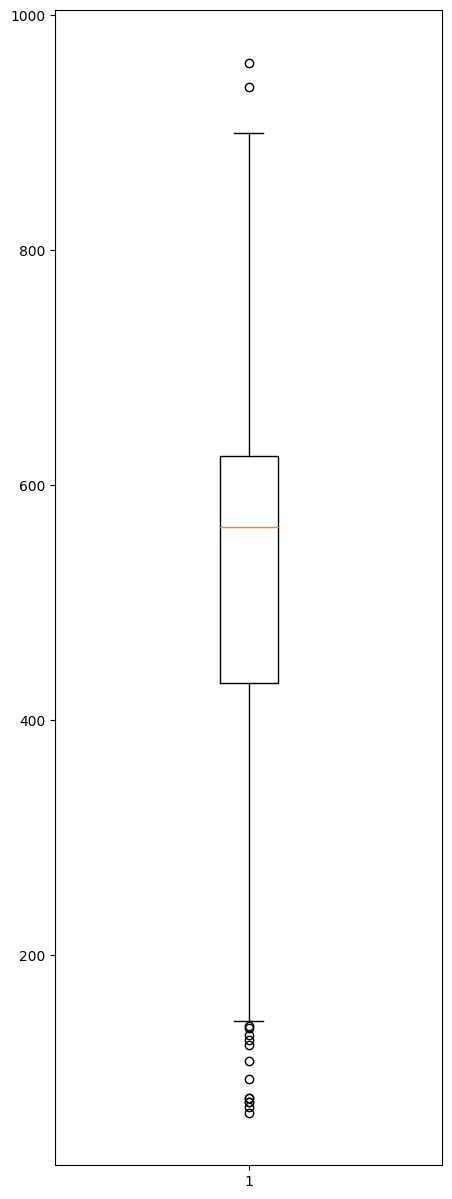

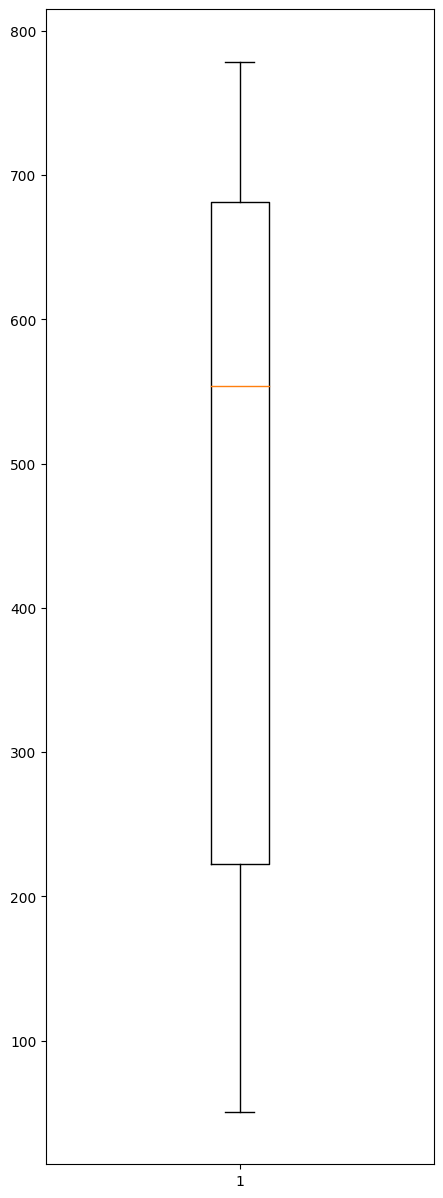

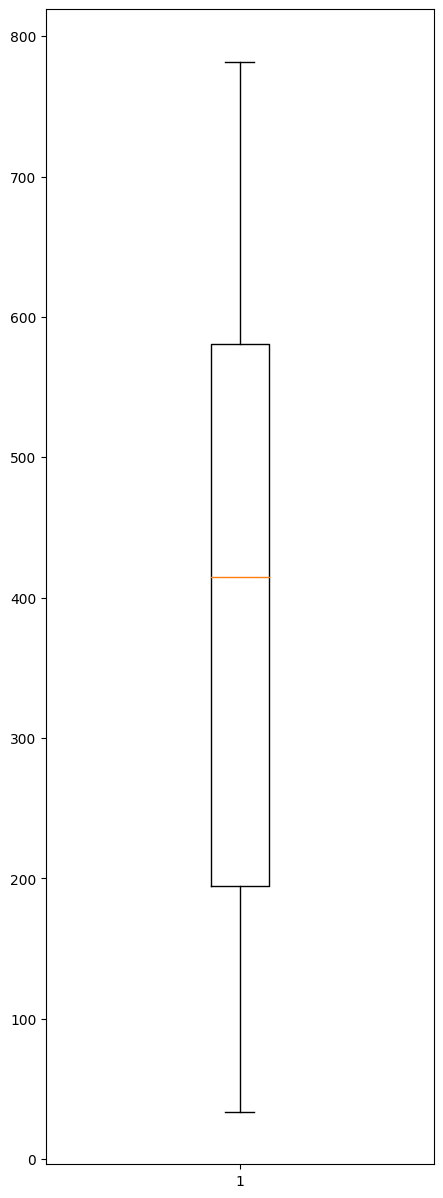

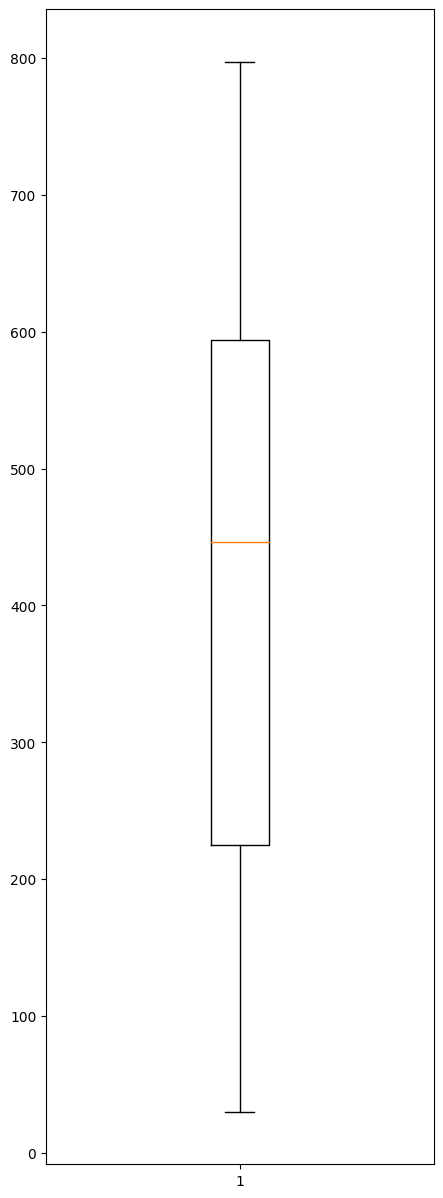

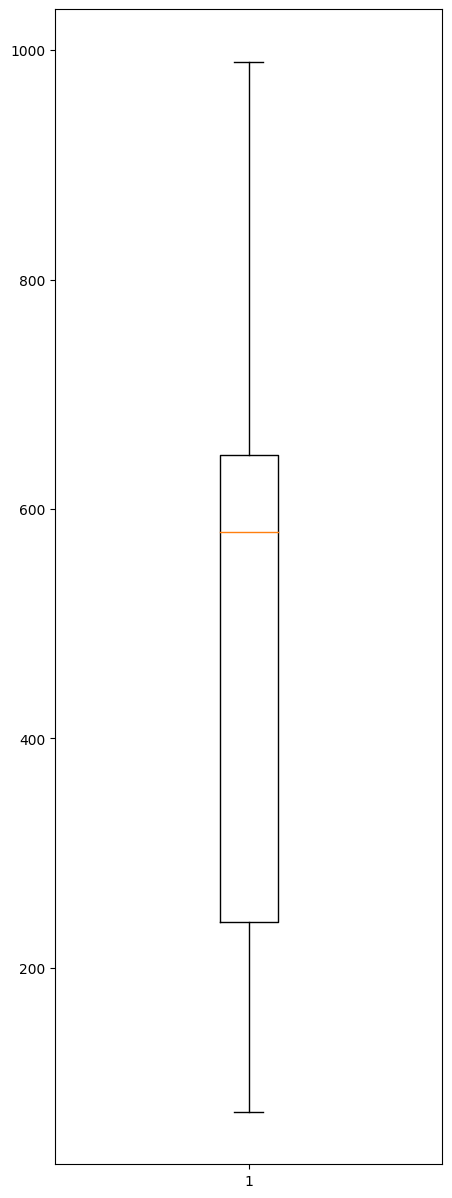

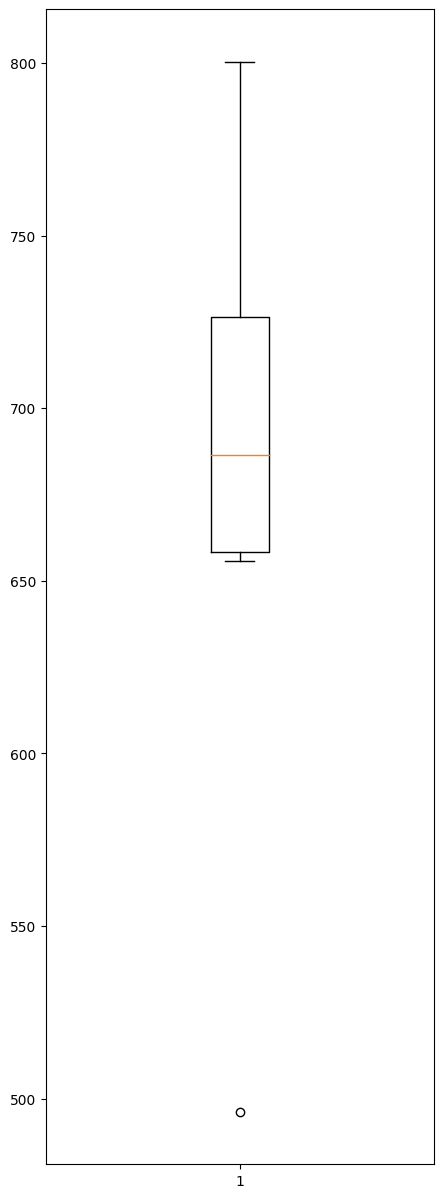

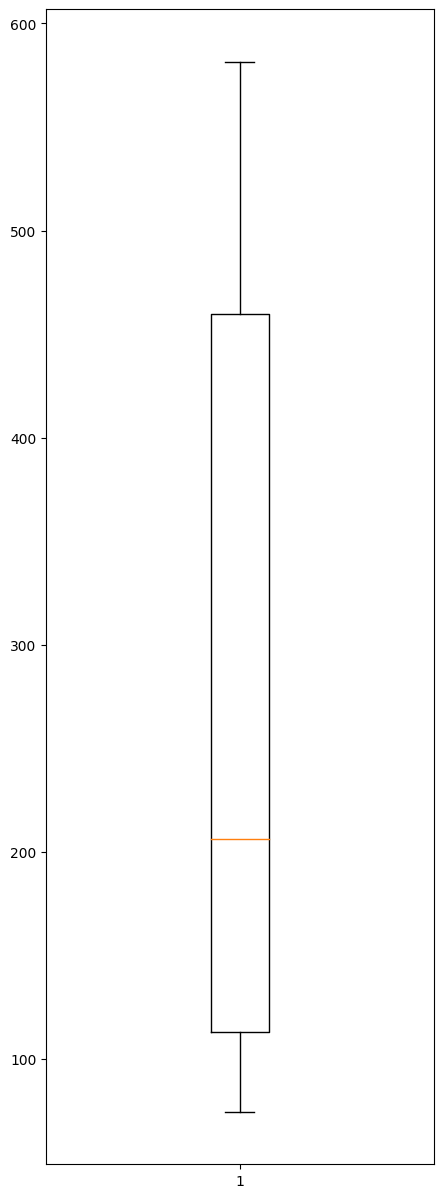

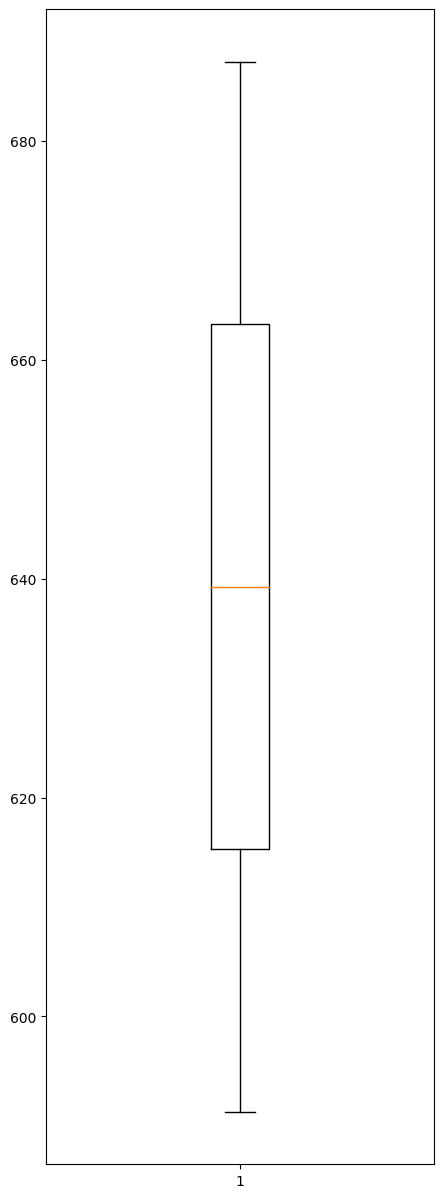

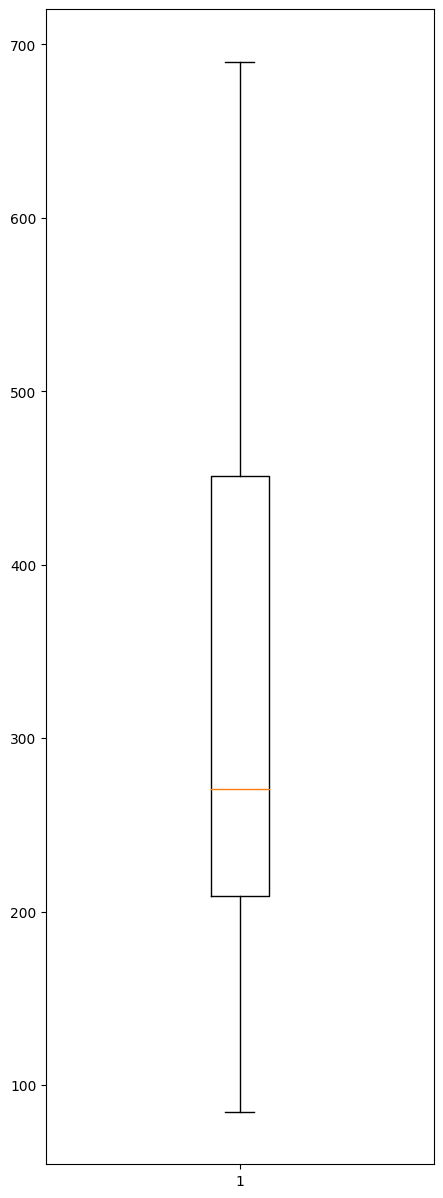

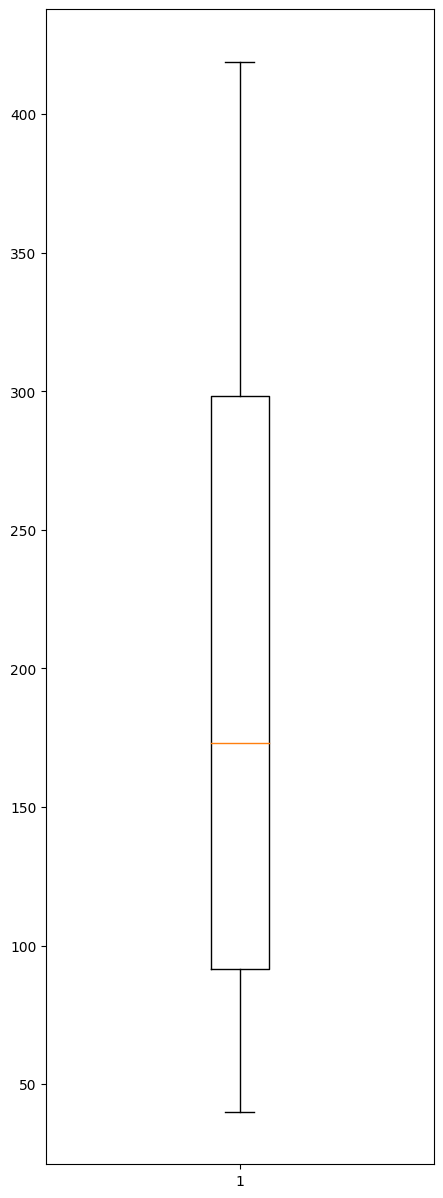

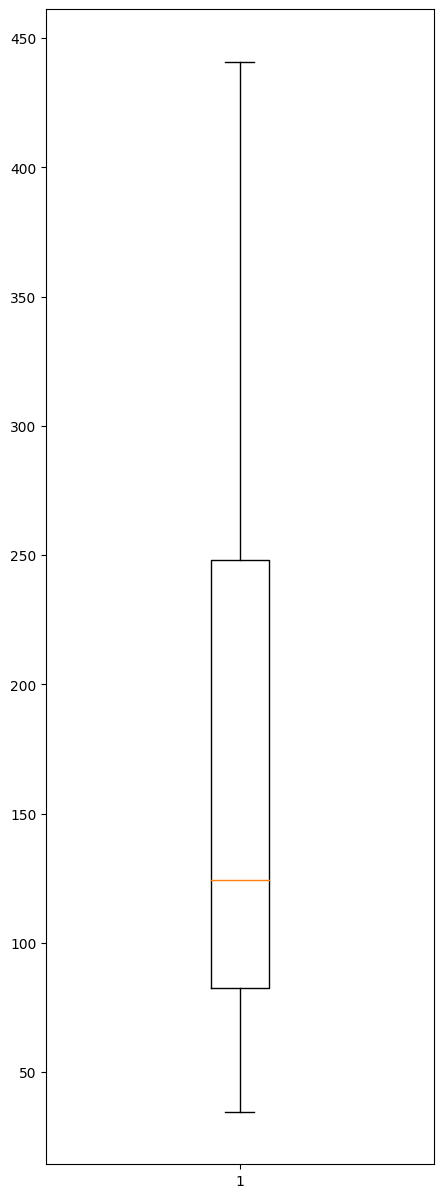

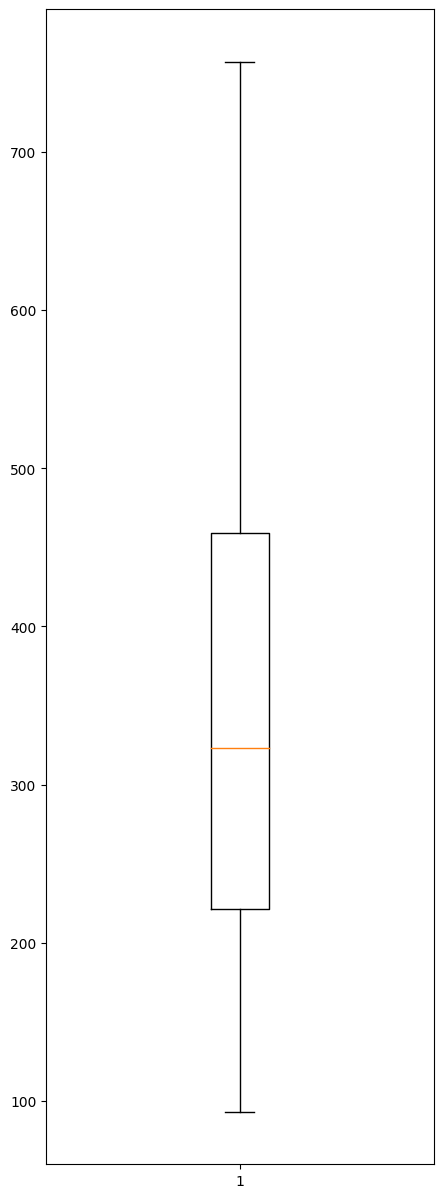

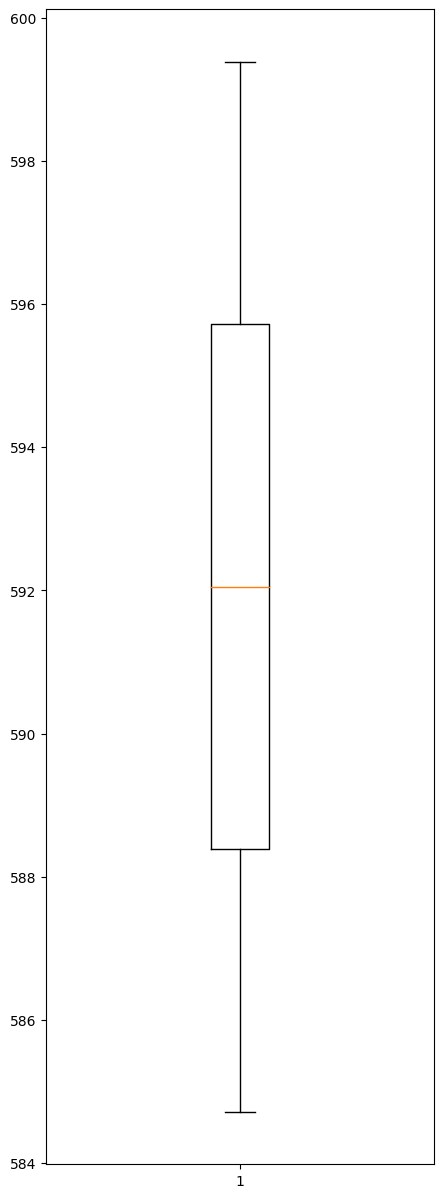

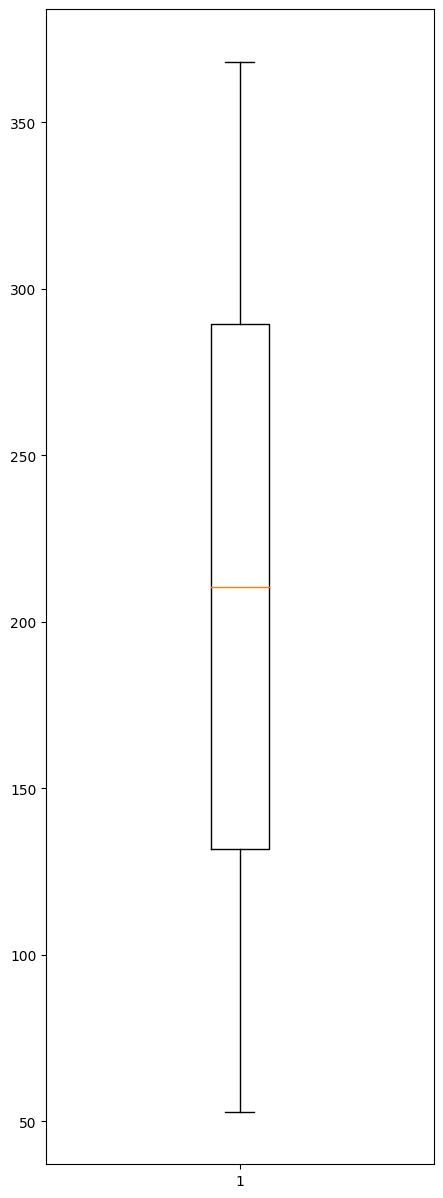

In [168]:
for feature in list(data2["ticket_type_nm"].unique()):
    fig, ax = plt.subplots(figsize=(5, 15))
    tu = data[data["ticket_type_nm"] == feature]
    B = ax.boxplot(tu["time_to_under"])
    
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

array([0.        , 0.10687023, 0.11450382, 0.02290076, 0.15267176,
       0.04580153, 0.07633588, 0.03053435, 0.09923664, 0.03816794,
       0.05343511, 0.06870229, 0.35877863, 0.09160305, 0.54961832,
       0.16030534, 0.67938931, 0.22137405, 0.36641221, 0.23664122,
       0.47328244, 0.29770992, 0.1221374 , 0.0610687 , 0.80916031,
       0.01526718, 0.46564885, 0.38167939, 0.22900763, 0.45038168,
       0.16793893, 0.45801527, 0.00763359, 0.12977099, 0.4351145 ,
       0.19083969, 0.42748092, 0.34351145, 0.74045802, 0.19847328,
       0.60305344, 0.57251908, 0.5648855 , 0.79389313, 0.94656489,
       0.32061069, 0.91603053, 0.30534351, 0.40458015, 0.95419847,
       0.08396947, 0.51145038, 0.27480916, 1.        , 0.58778626,
       0.18320611, 0.20610687, 0.38931298, 0.21374046, 0.28244275,
       0.92366412, 0.77099237, 0.64122137, 0.48854962, 0.48091603,
       0.84732824])

Спортивная
1400


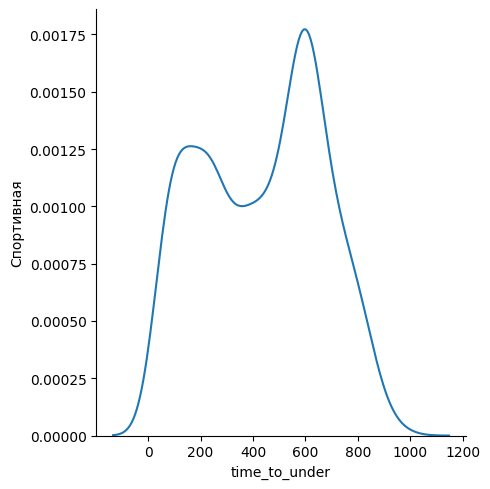

Новослободская
810


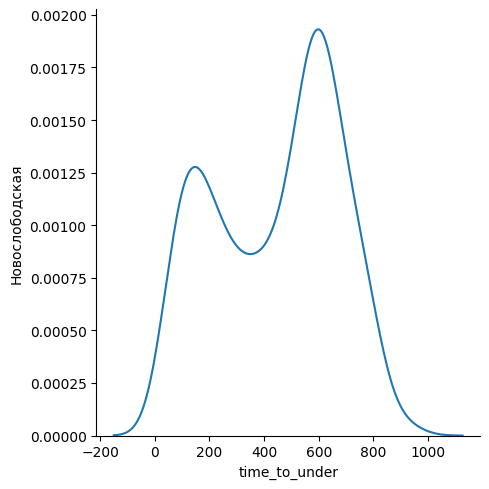

Свиблово
5789


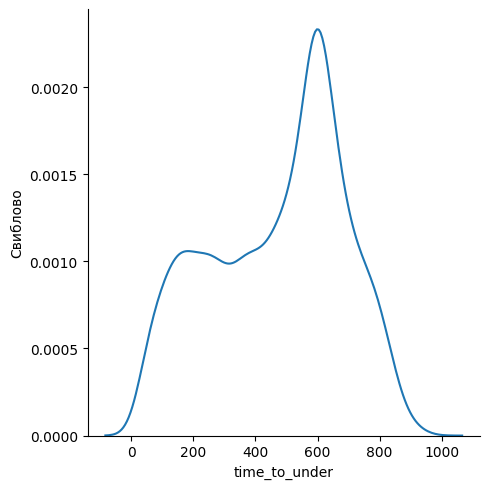

Пятницкое шоссе
3682


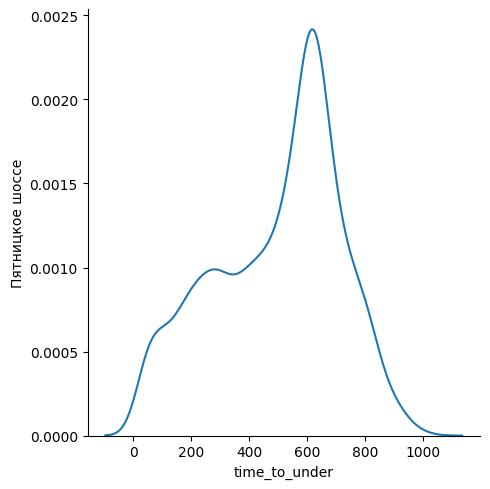

Филатов луг
4112


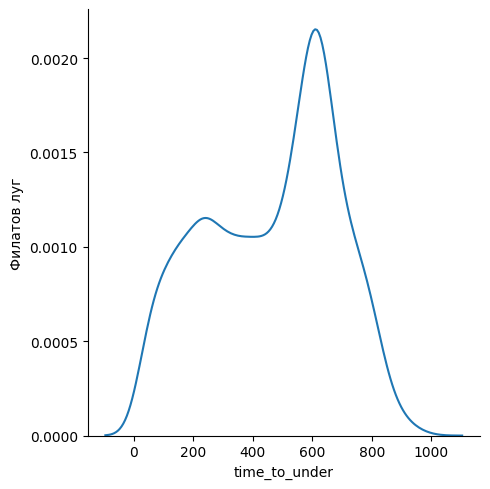

Южная
4567


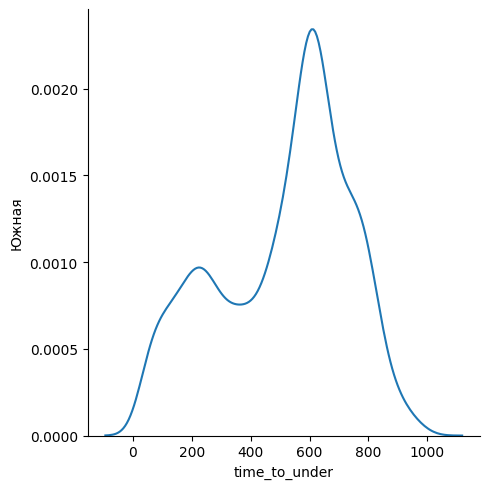

Новогиреево
16871


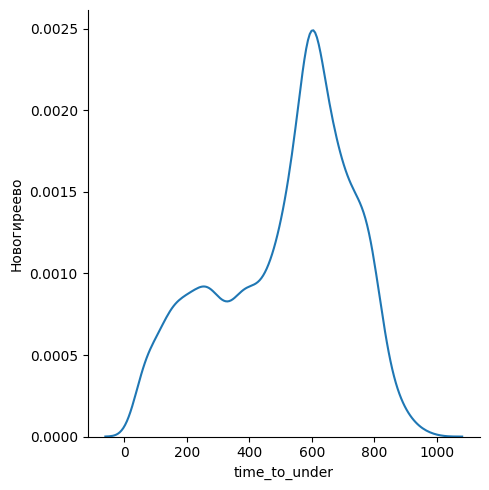

Автозаводская
4570


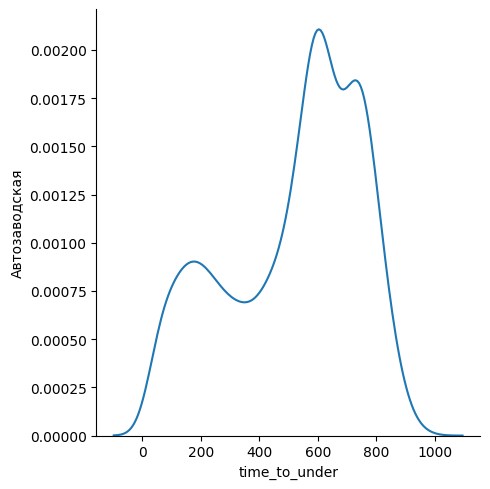

Печатники
6029


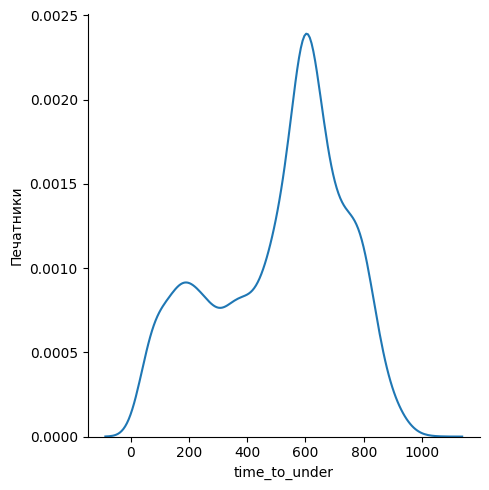

Алексеевская
3627


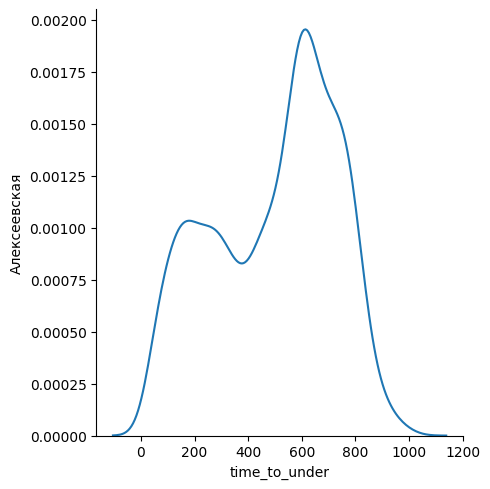

Братиславская
8175


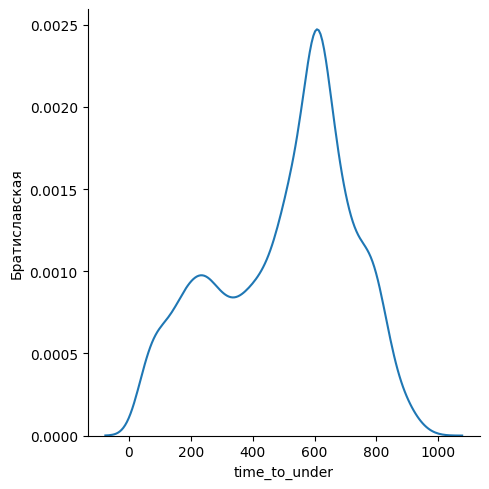

Хорошёвская
1570


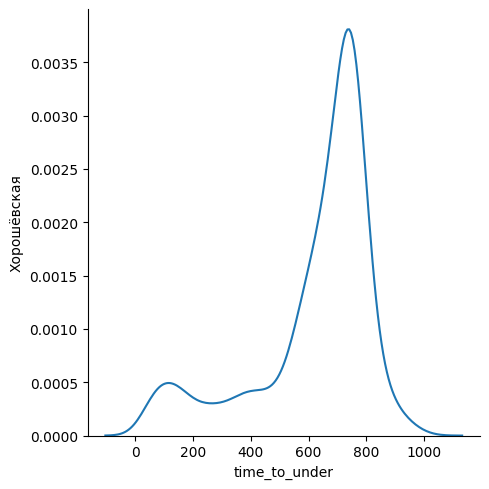

Нижегородская
3963


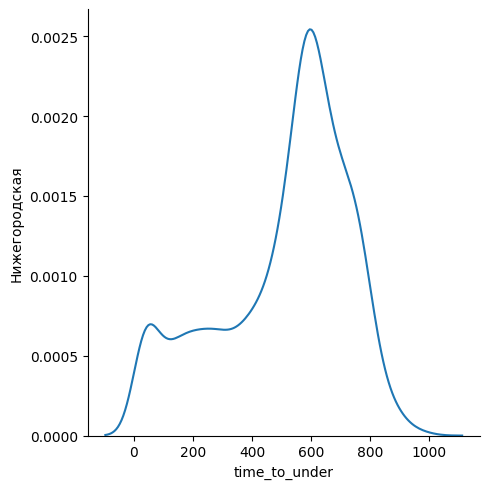

Новые Черёмушки
6743


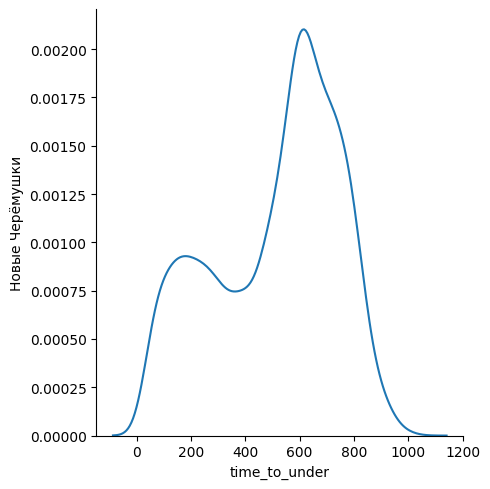

Октябрьское поле
7157


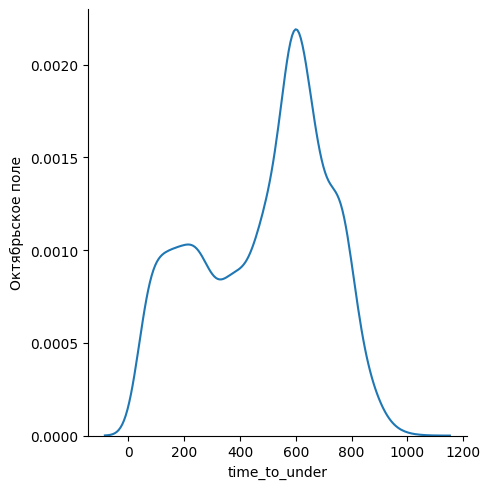

Бауманская
2986


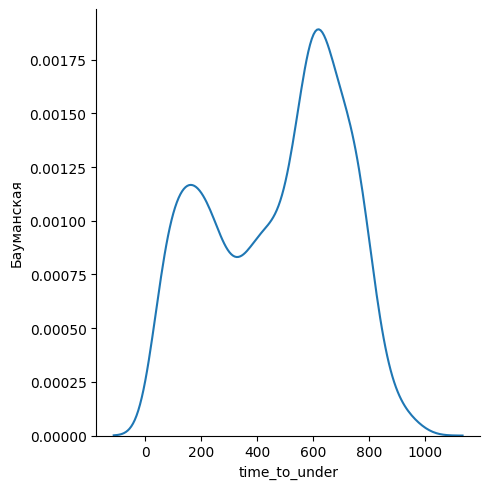

Щёлковская
19489


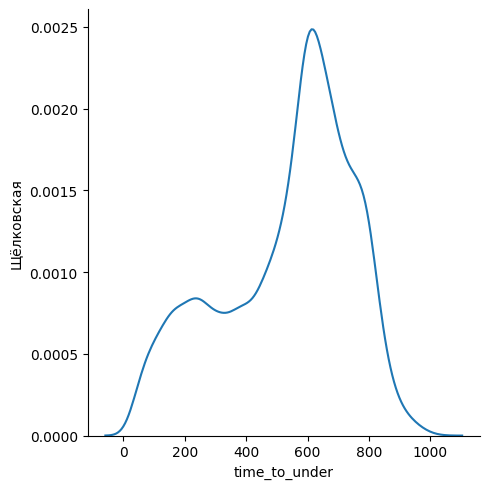

Авиамоторная
5074


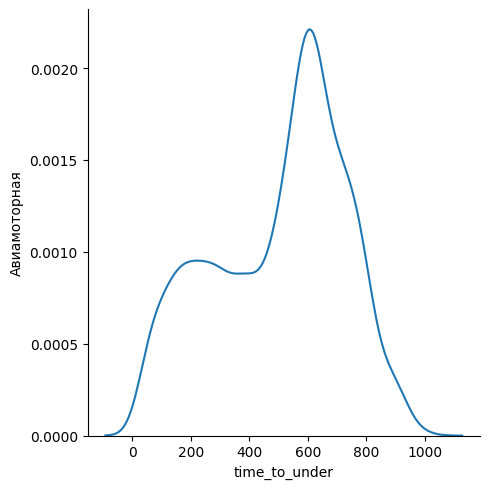

Кузьминки
18054


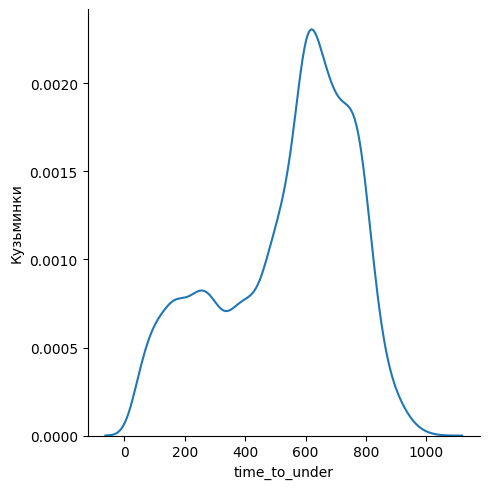

Некрасовка
16080


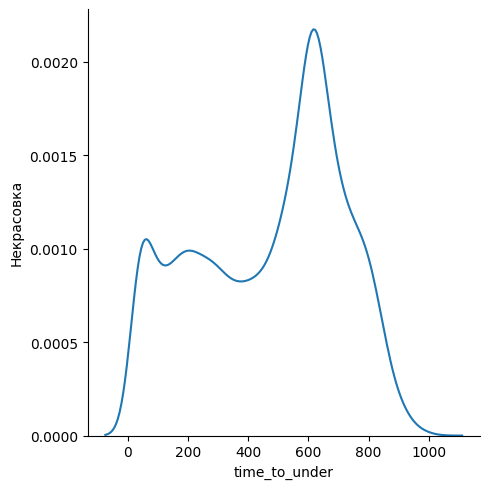

Академическая
6761


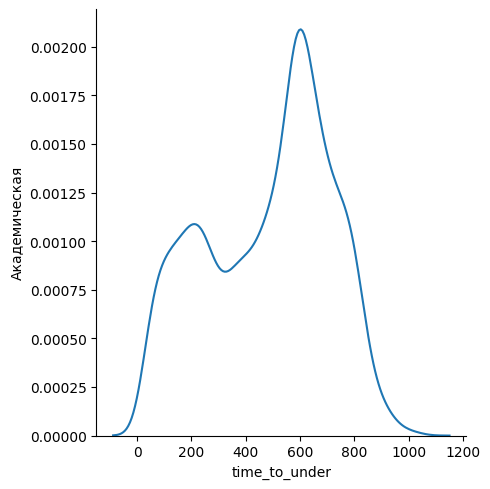

Тёплый Стан
9003


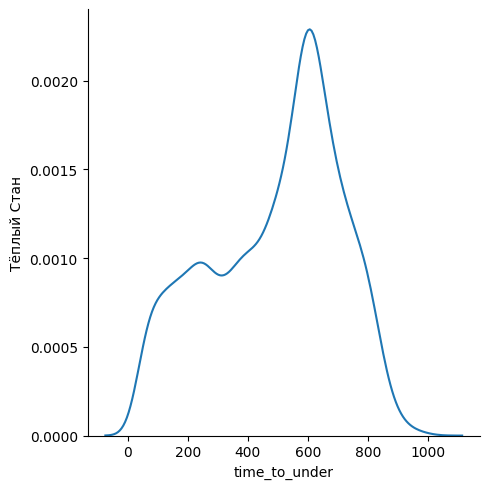

Алтуфьево
9435


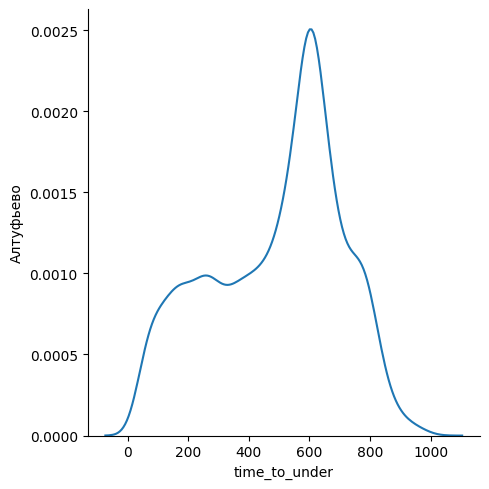

Бульвар Рокоссовского
9112


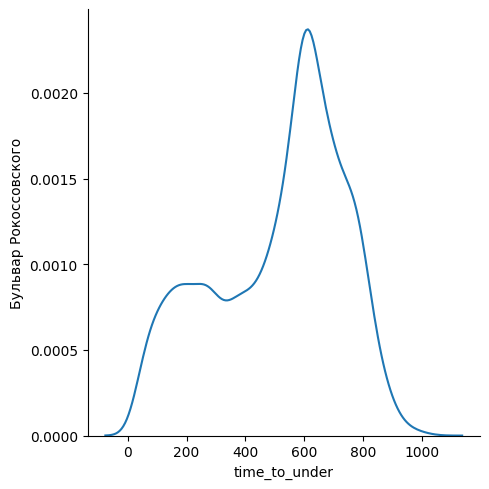

Выхино
13760


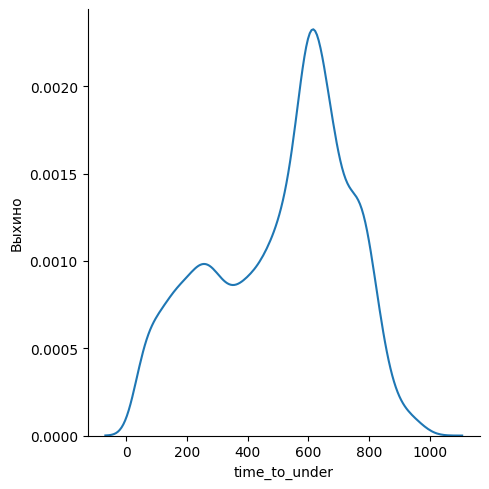

Пионерская
1382


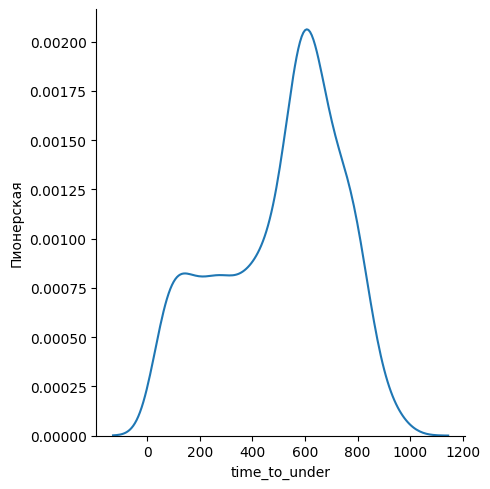

Тушинская
6554


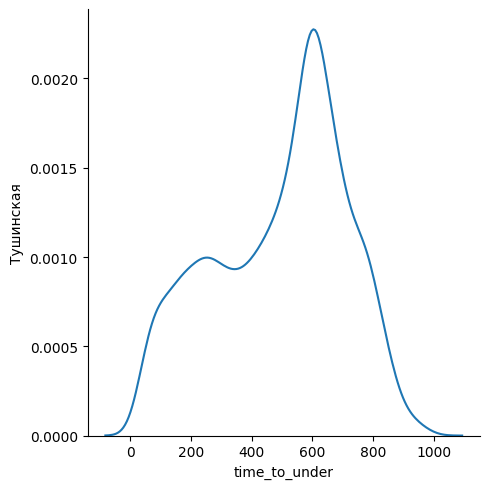

Пролетарская
3729


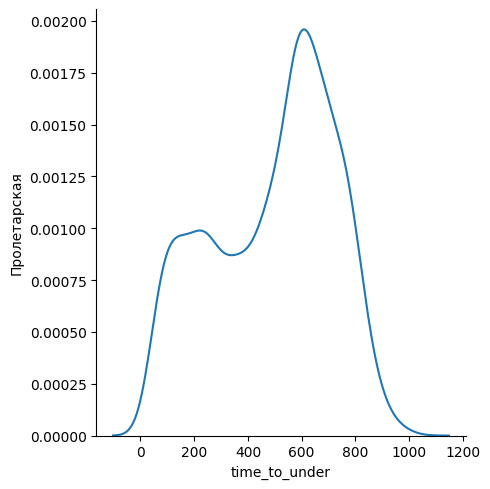

Лухмановская
4540


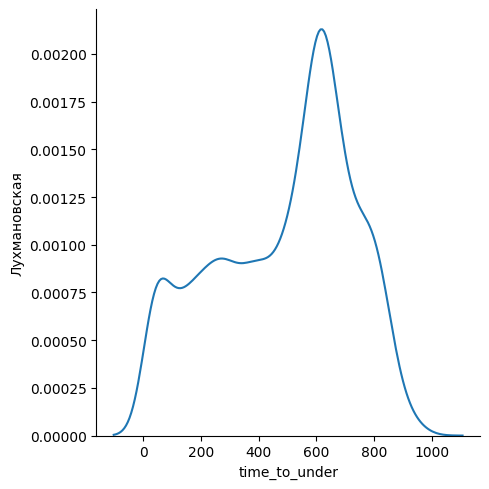

Филёвский парк
2013


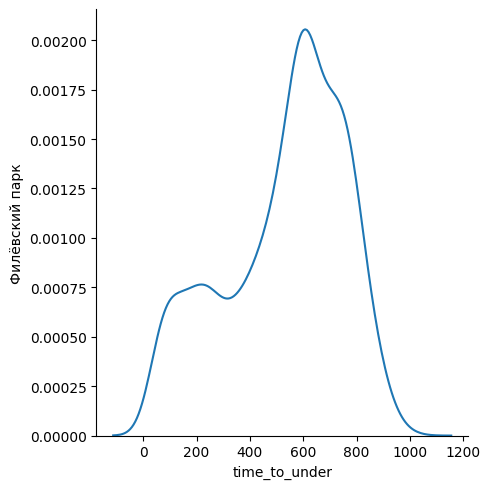

Прокшино
1468


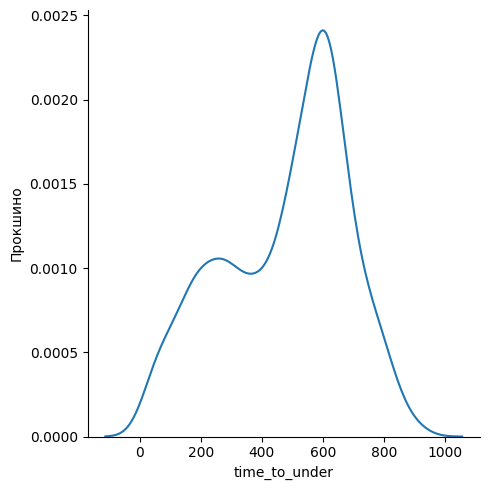

Стахановская
525


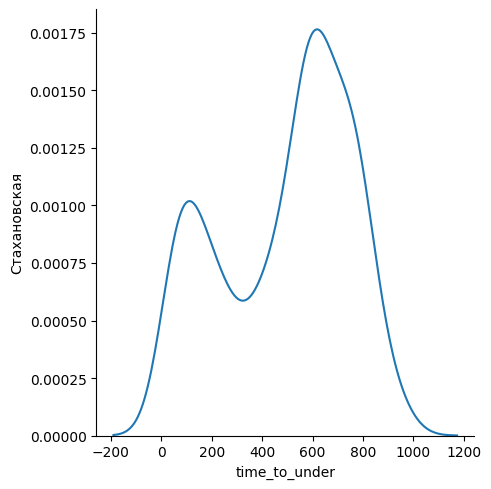

Бабушкинская
11371


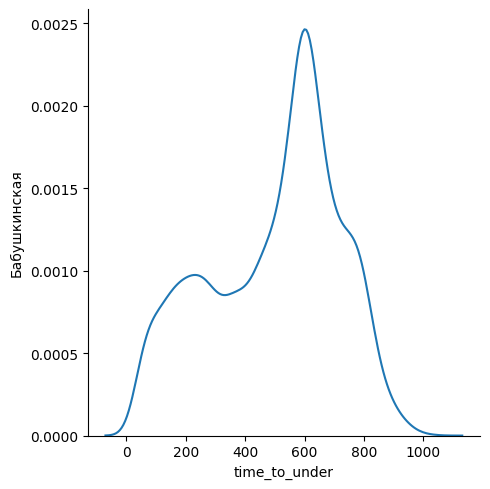

Новаторская
2129


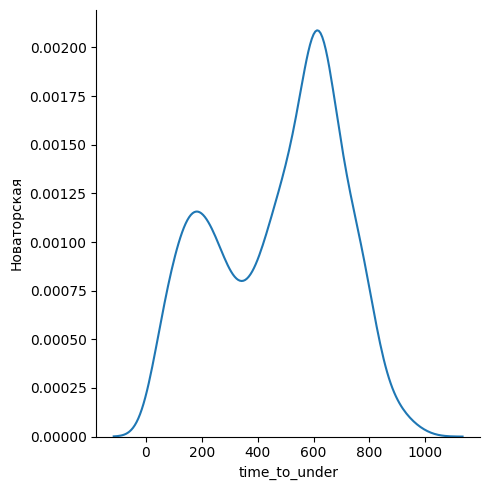

Щукинская
7063


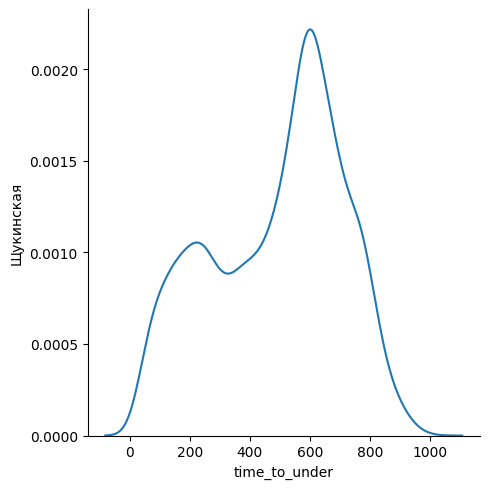

Верхние Котлы
2458


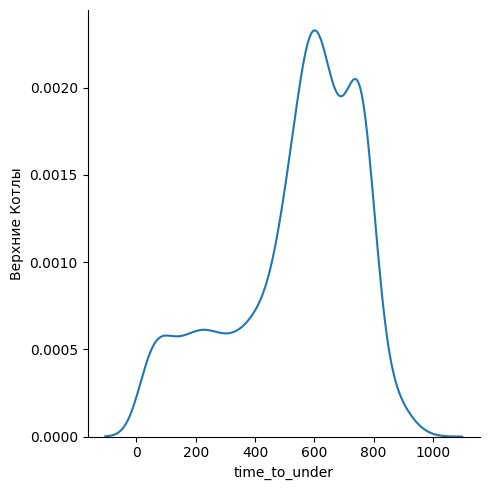

Шелепиха
3348


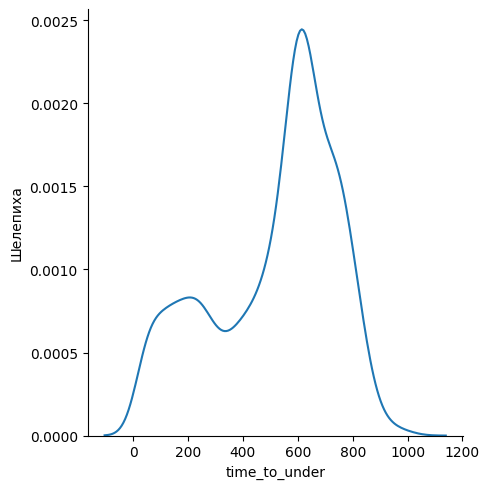

Савёловская
5167


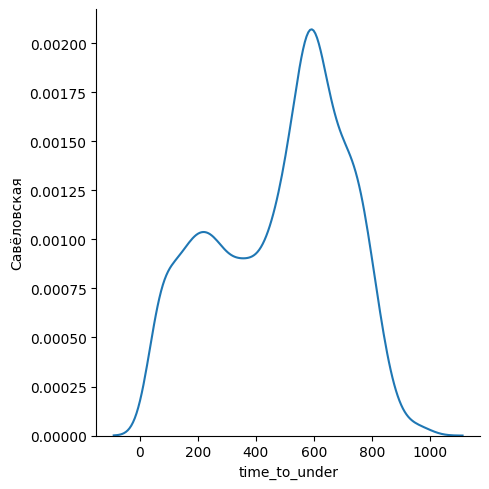

Каширская
3084


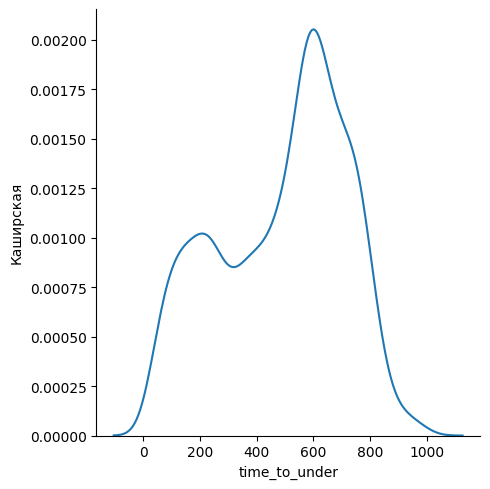

Ховрино
8527


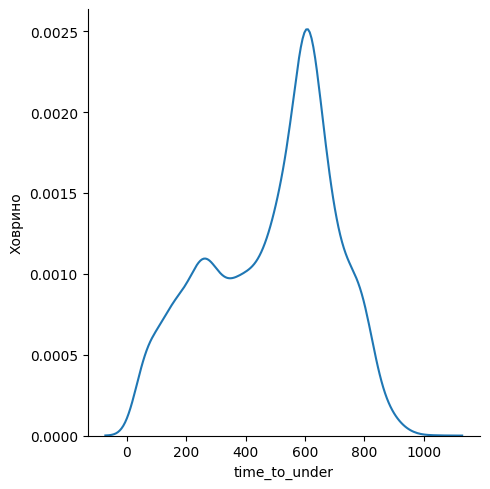

Тимирязевская
3635


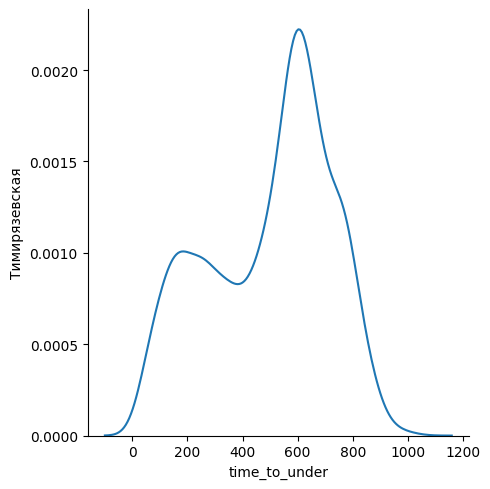

Хорошёво
1114


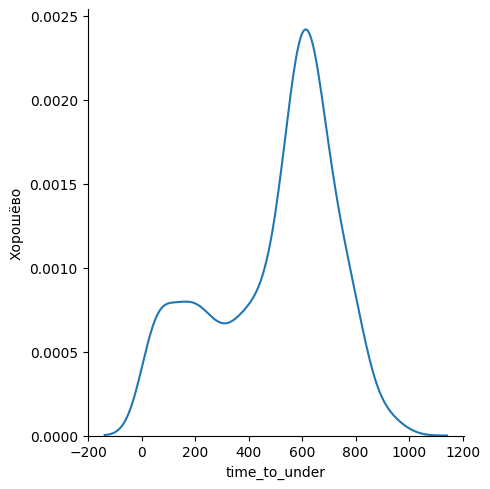

Кунцевская
6141


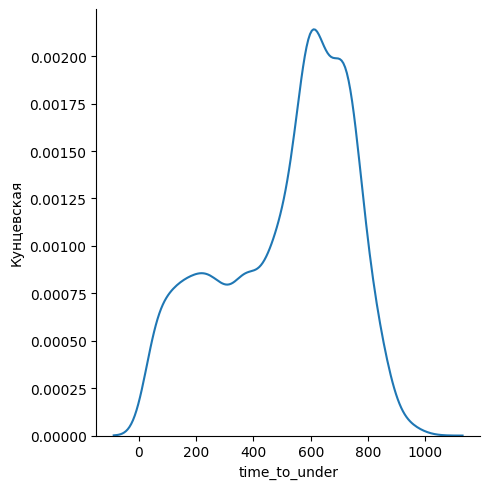

Тропарёво
3901


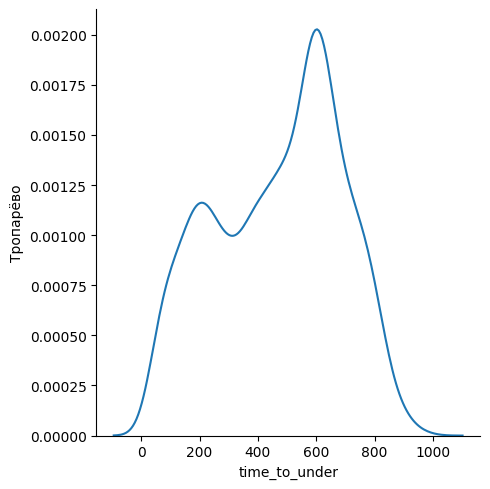

Говорово
3076


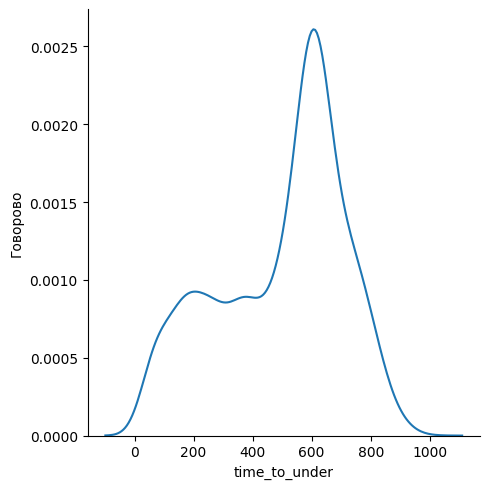

Первомайская
9763


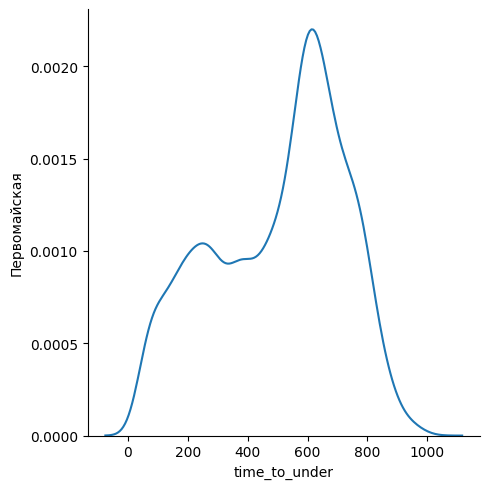

Ботанический сад
4323


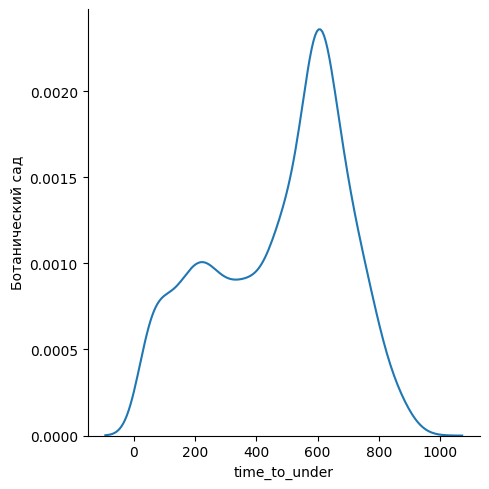

Коптево
2340


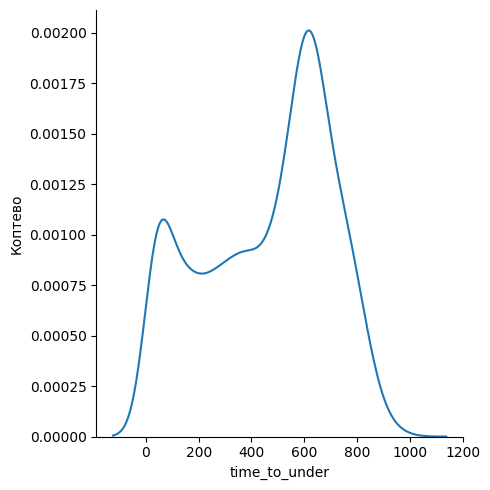

Текстильщики
11293


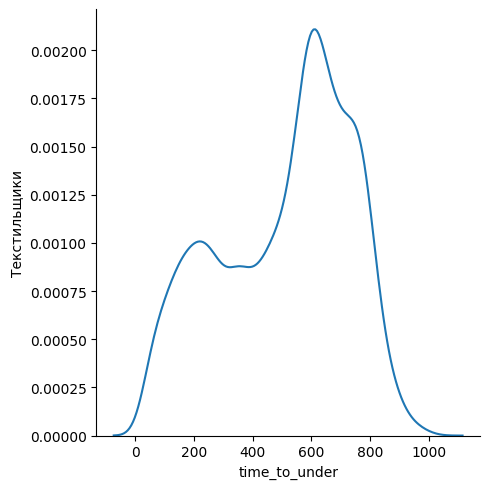

Улица Скобелевская
4736


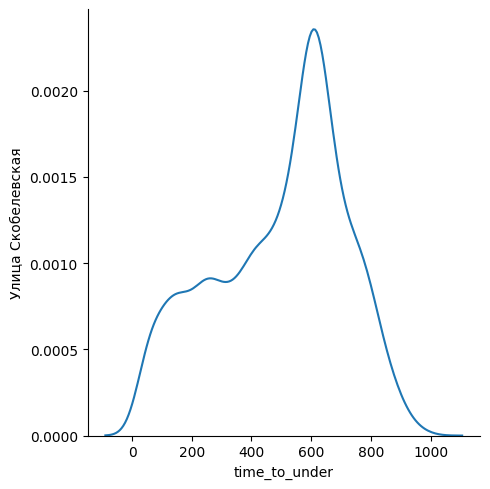

Севастопольская
2533


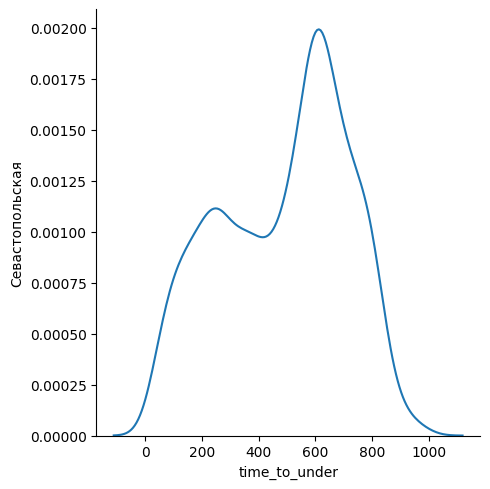

Молодёжная
8658


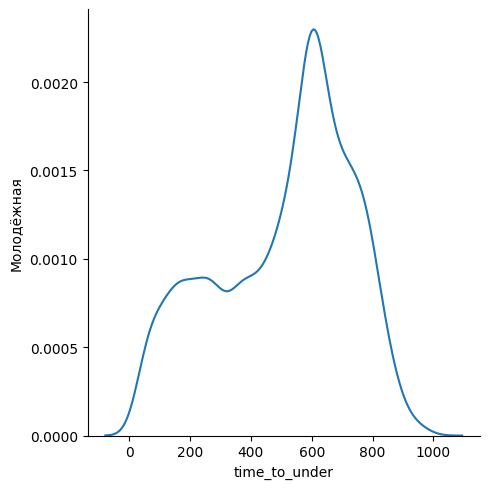

Коммунарка
4779


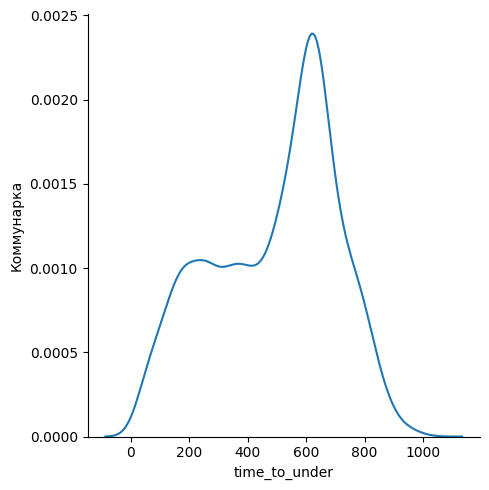

Бутырская
1494


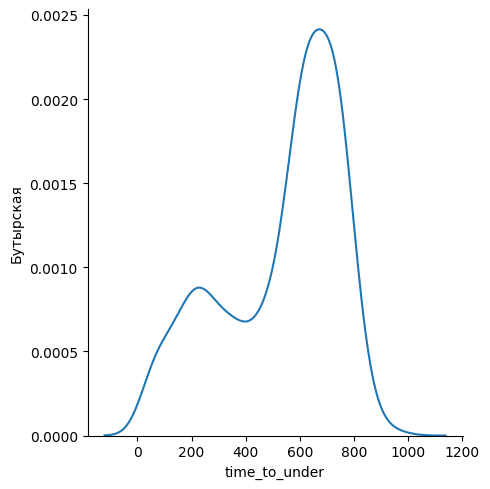

Сходненская
11231


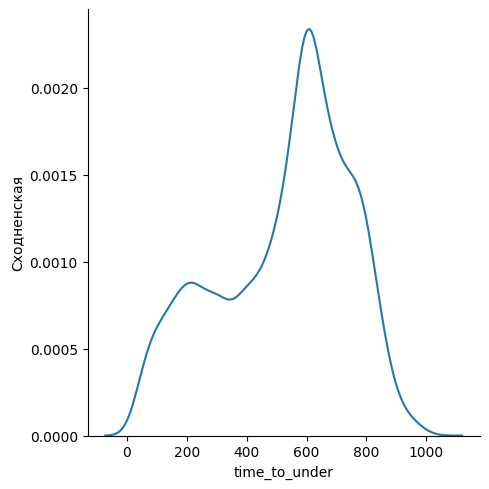

Сокольники
3210


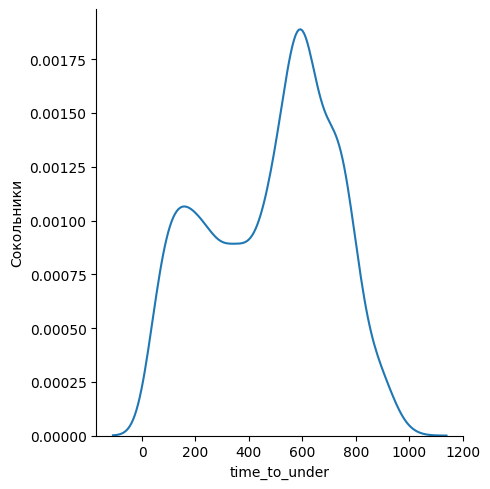

Марьино
6529


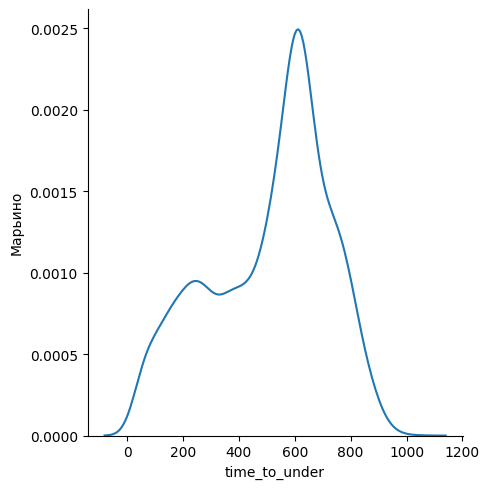

Зябликово
2386


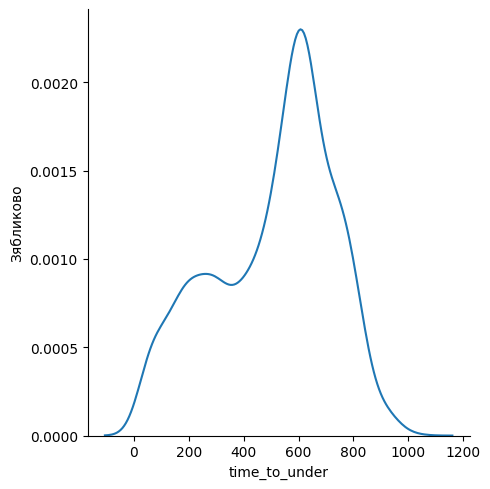

Боровское шоссе
1296


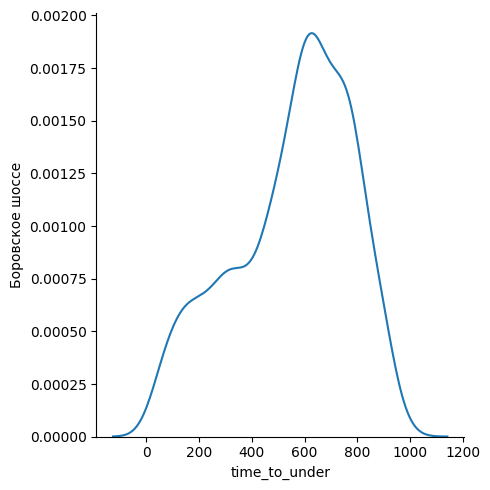

Перово
11602


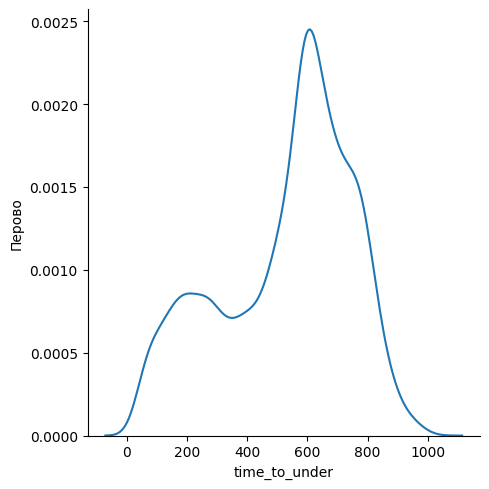

Новокосино
15010


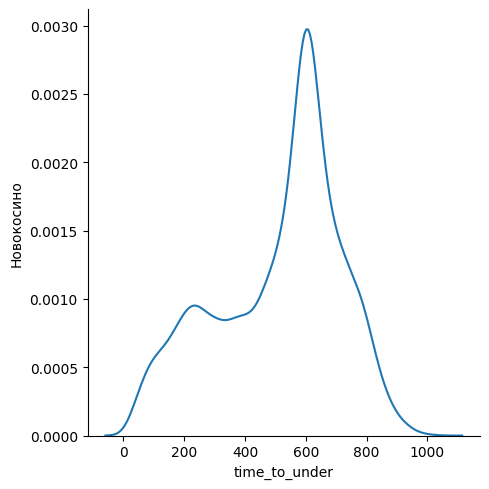

Электрозаводская
3743


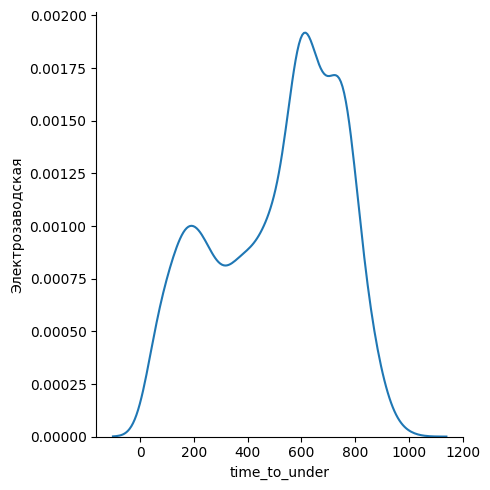

ЗИЛ
432


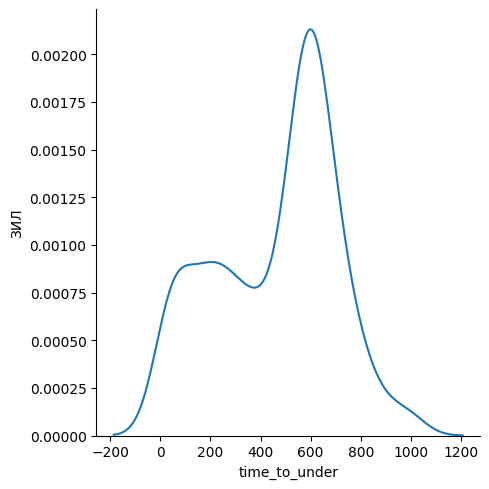

Бибирево
7210


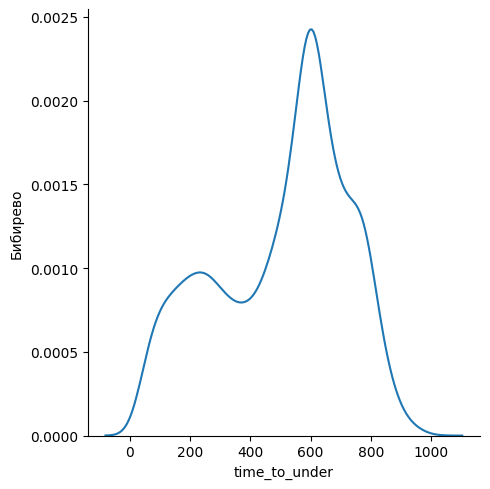

Волгоградский проспект
2023


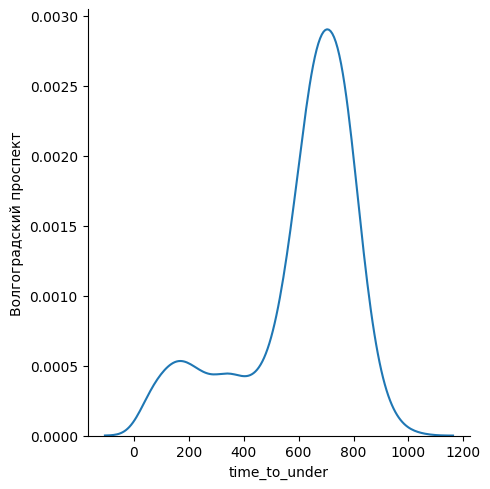

Юго-Западная
7092


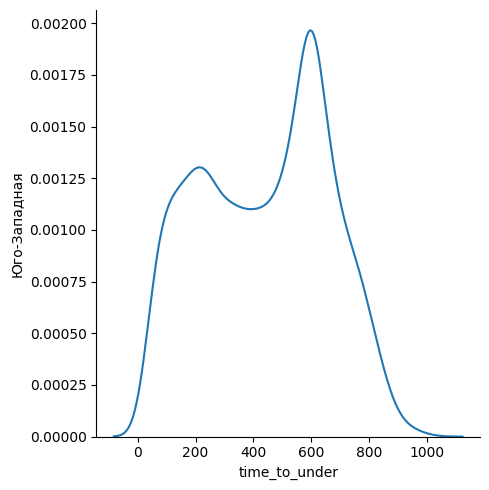

Отрадное
12607


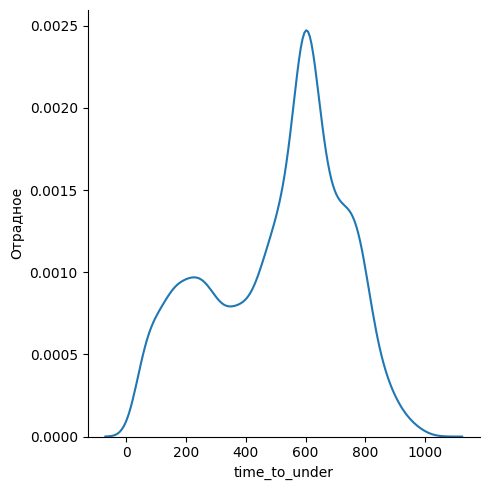

Комсомольская
11192


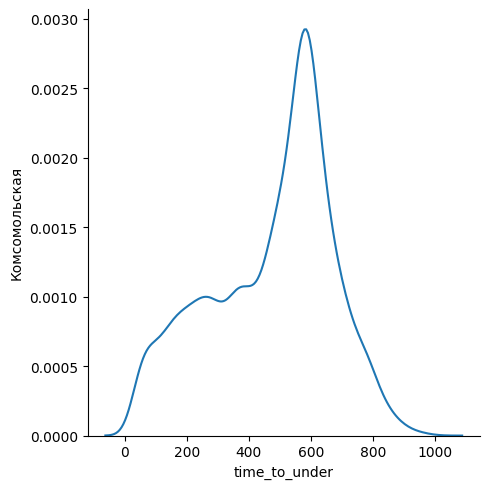

Рассказовка
5370


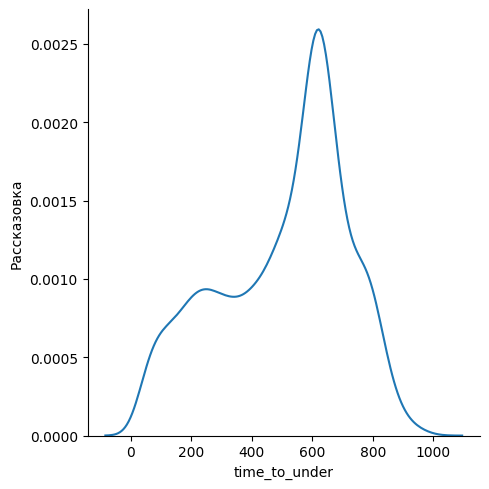

Митино
4918


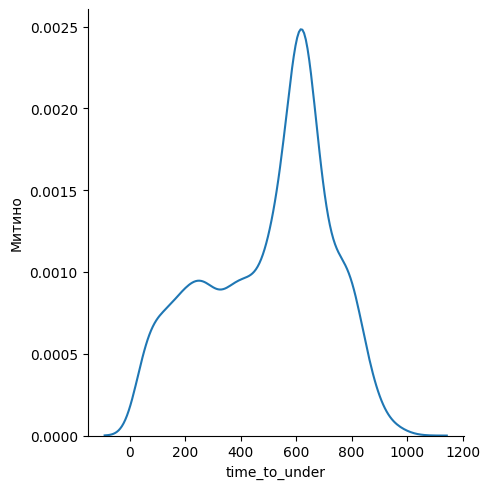

Бульвар Дмитрия Донского
13151


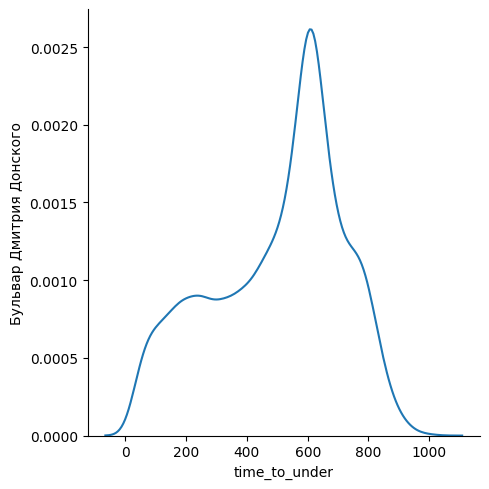

Мичуринский проспект
1867


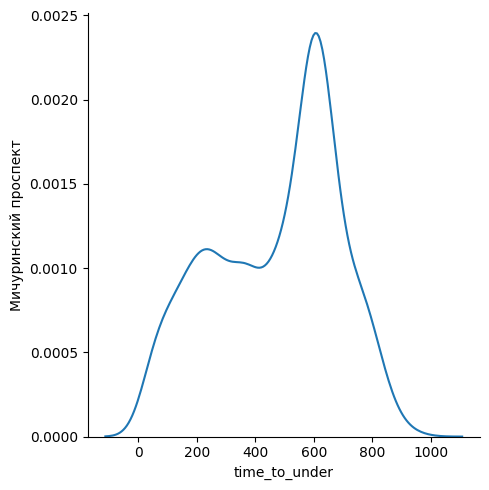

Таганская
2631


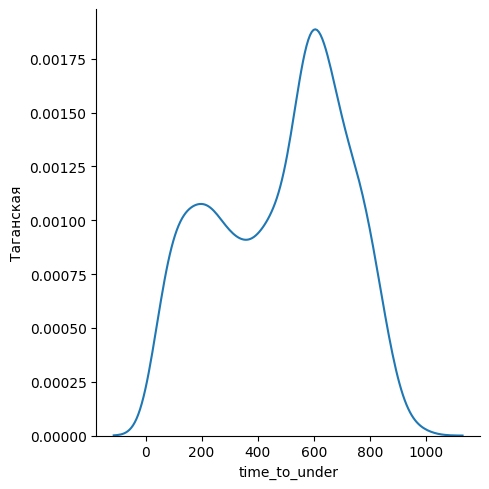

Водный стадион
7208


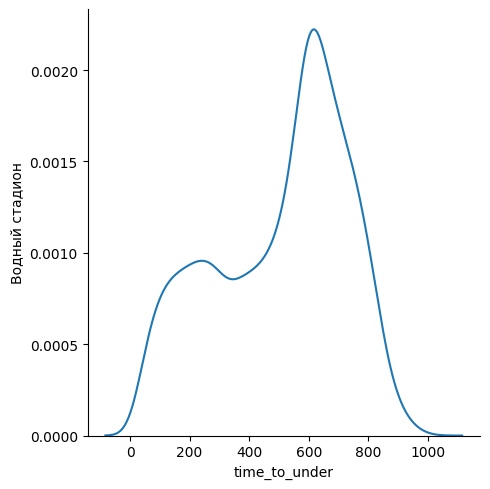

Котельники
10990


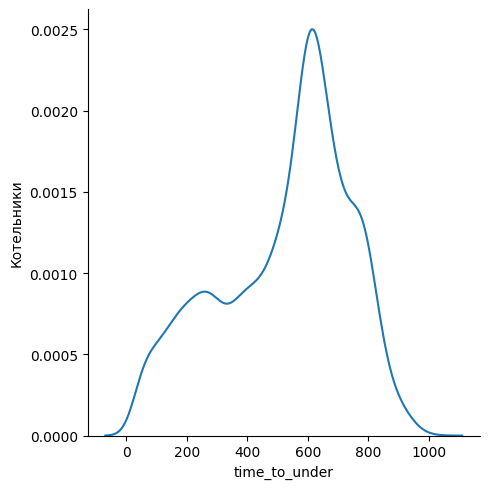

Бунинская аллея
4841


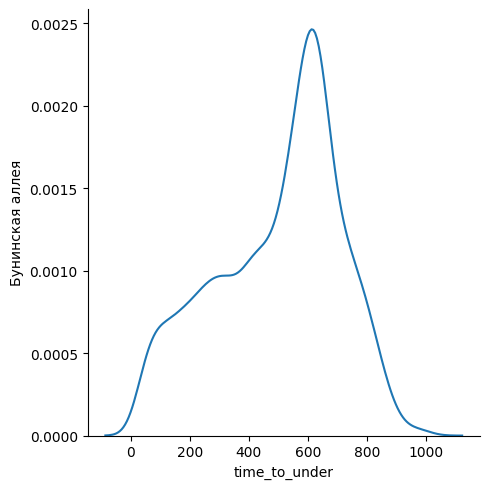

Люблино
10665


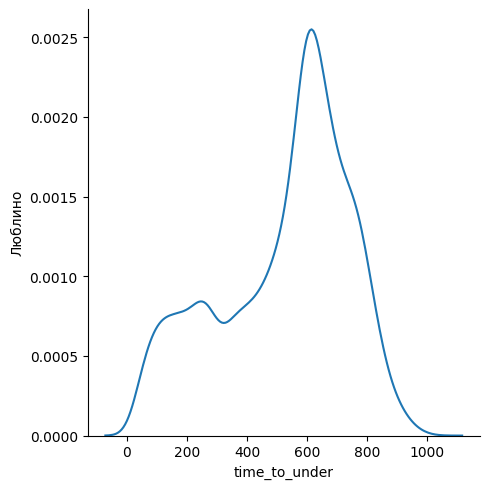

Домодедовская
10429


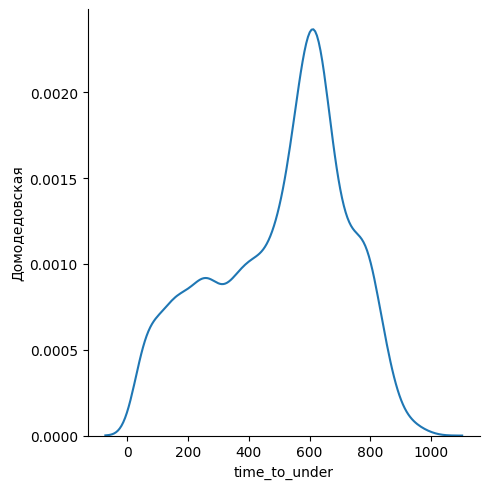

Улица 1905 года
3293


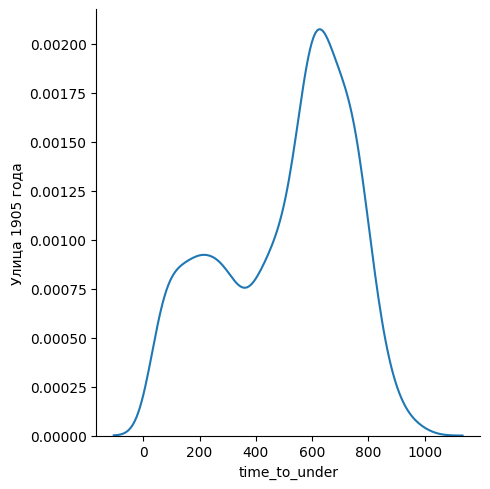

Кутузовская
1635


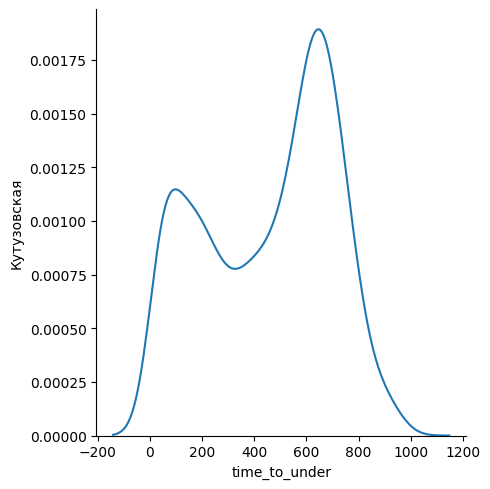

Рязанский проспект
9697


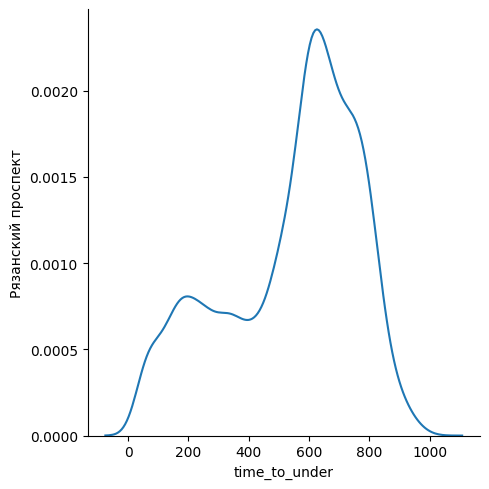

Фили
2175


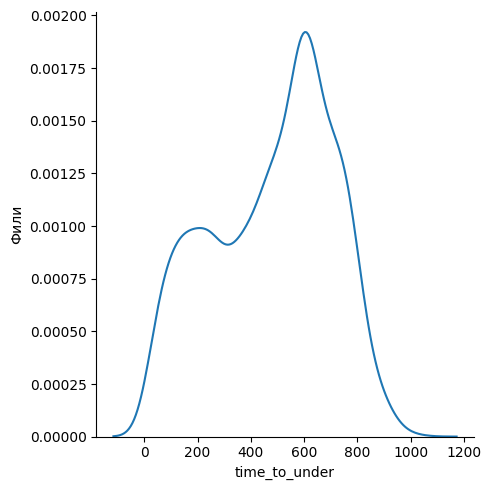

Преображенская площадь
9538


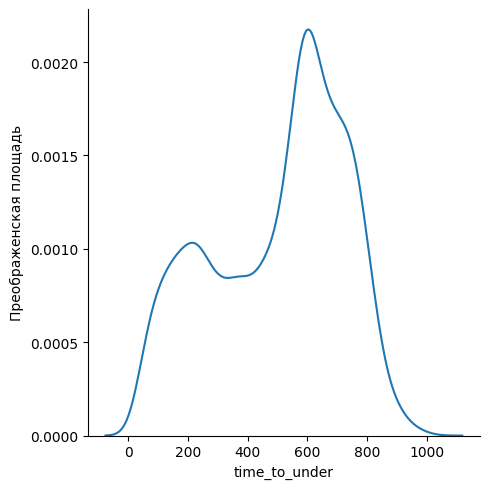

Нагорная
3746


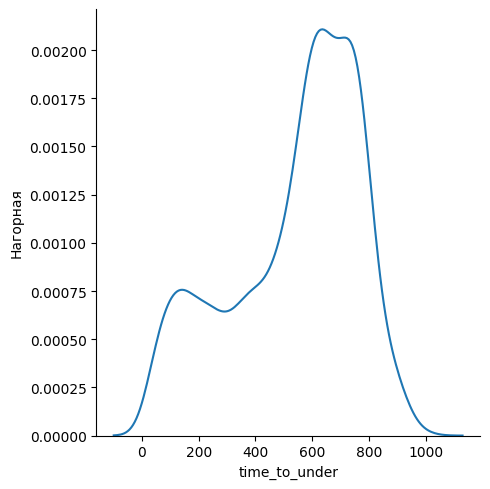

Юго-Восточная
2177


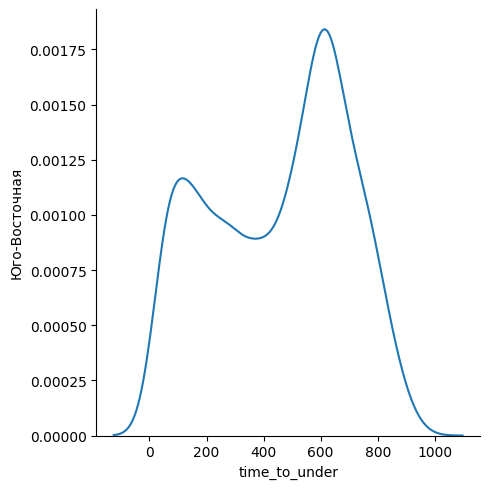

ВДНХ
8750


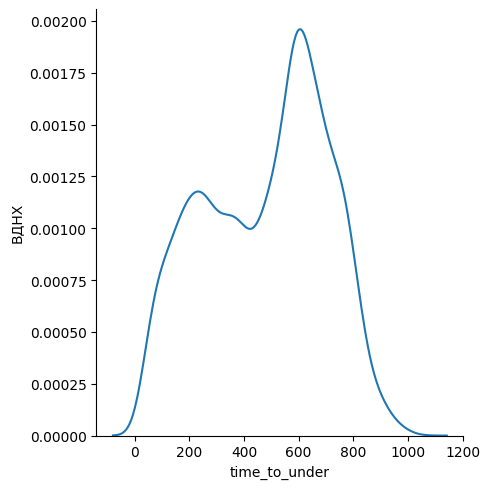

Саларьево
6637


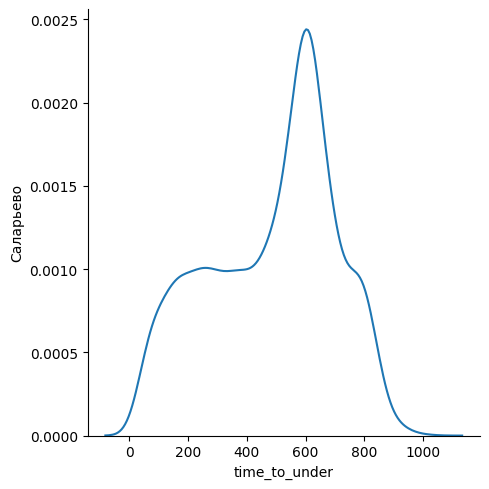

Сокол
3713


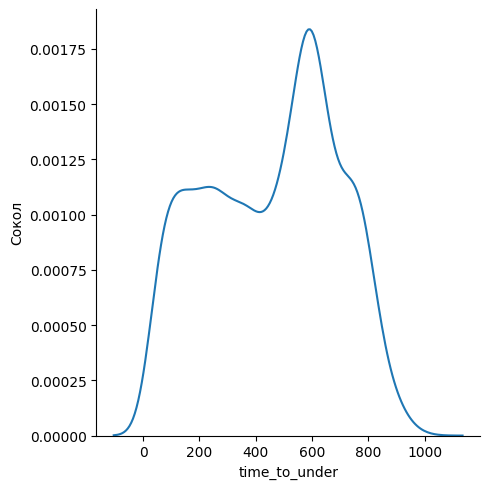

Беломорская
7136


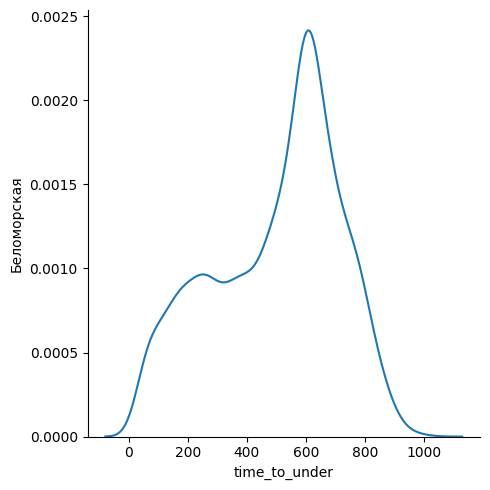

Планерная
9800


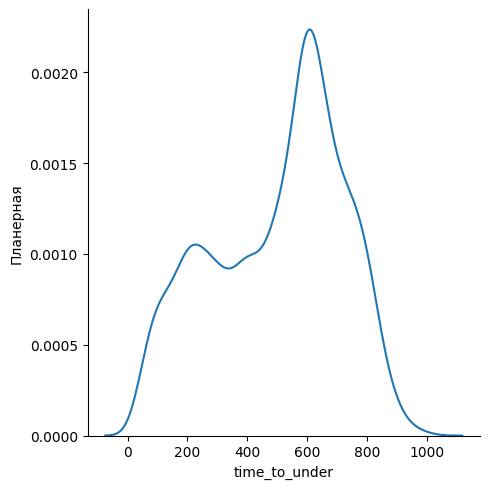

Дубровка
2132


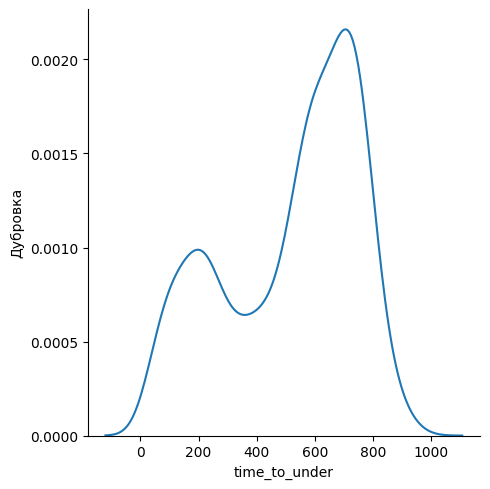

Шипиловская
4019


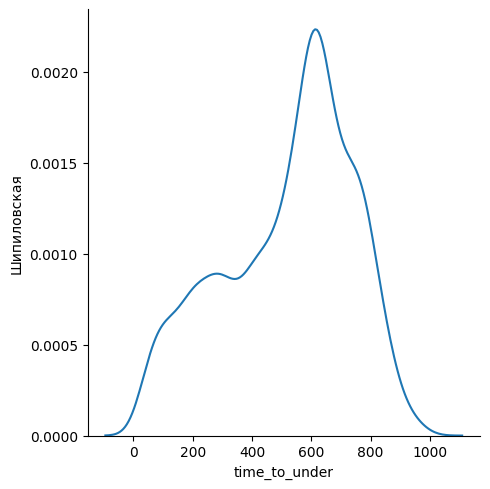

Озёрная
2762


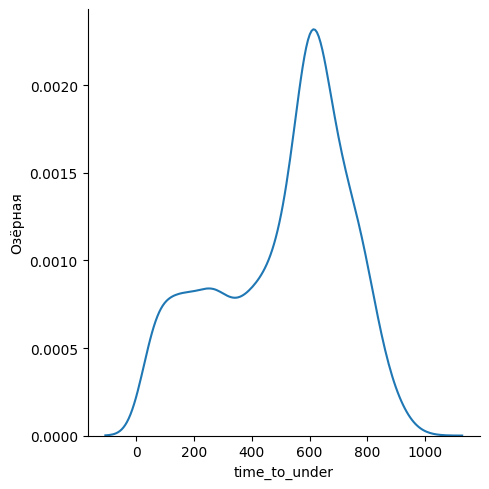

Медведково
12596


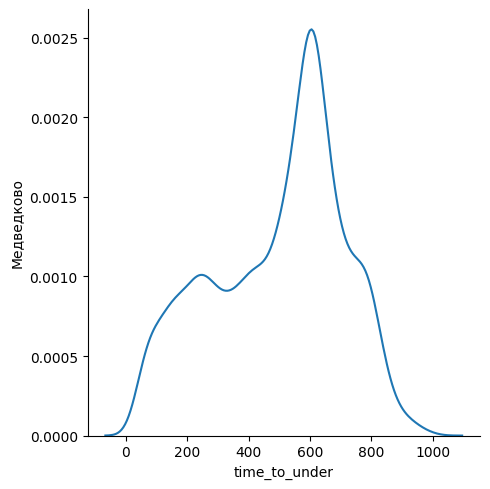

Народное Ополчение
4519


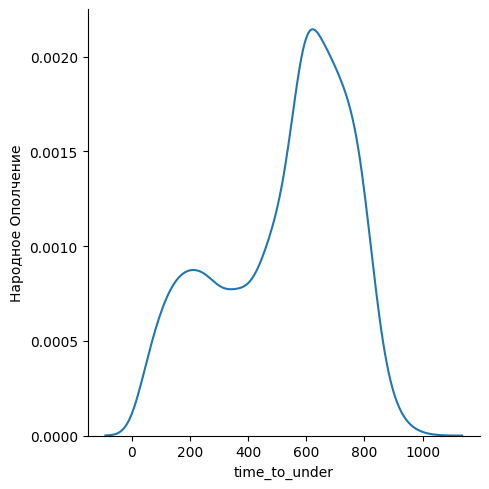

Беляево
9773


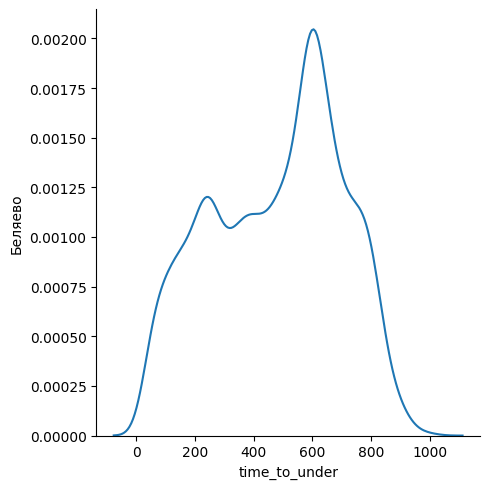

Волжская
4153


KeyboardInterrupt: 

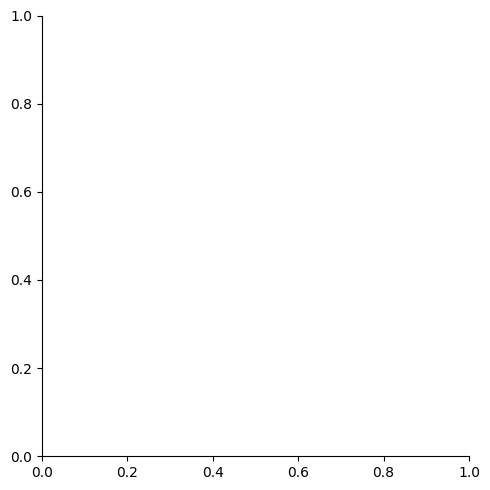

In [221]:
import seaborn as sns
%matplotlib inline


feature_groups = ["ticket_type_nm", "station_nm", "line_nm", "entrance_nm"]



for f_group in feature_groups:
    for feature in list(data[f_group].unique()):
        d = data[data[f_group] == feature]["time_to_under"]
        print(feature)
        print(len(list(d)))

        fig = sns.displot(d, kind = "kde")
        fig.set_axis_labels('time_to_under', feature)
        plt.show()

#params = new_df


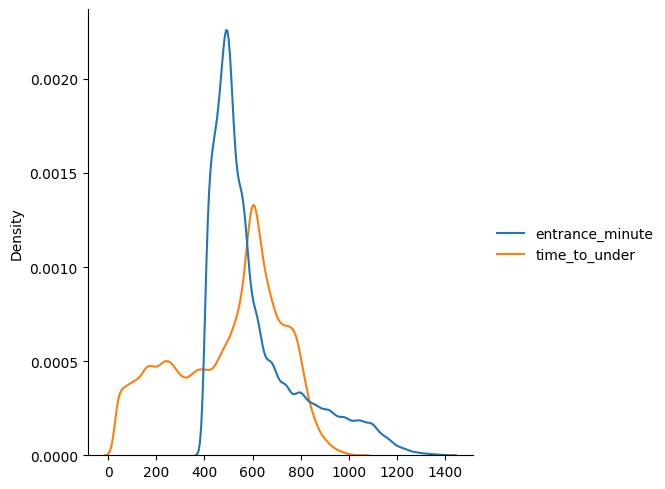

In [235]:
sns.displot(data[["entrance_minute", "time_to_under"]], kind = "kde")


In [216]:
data = data[data["entrance_minute"] > 400]

In [236]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score

new_features = ["Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]


other_items = ['entrance_minute', 'time_to_under', 'label', "holiday", "id"]

big2d_list = [other_items, categorical_features]

big2d_list = [other_items, categorical_features, new_features]

feature_names = [item for sublist in big2d_list for item in sublist]
feature_names.remove('label')
feature_names.remove('time_to_under')
data_X = data[feature_names]
data_y = data["time_to_under"]

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y,
                                                    random_state=1, test_size = 0.1)

print("НАЧАЛО ОБУЧЕНИЯ")
regr = MLPRegressor(random_state=1, max_iter=20,hidden_layer_sizes=(100, 100, 100)).fit(X_train, y_train)
print("КОНЕЦ ОБУЧЕНИЯ")


y_pred = regr.predict(X_test)

r2_sc = r2_score(y_test, y_pred)



print("РЕЗУЛЬТАТЫ: ")
print("mape: " + str(mape(y_pred, y_test)))
print("mse: " + str(mse(y_pred, y_test)))
print(r2_sc)

НАЧАЛО ОБУЧЕНИЯ


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


КОНЕЦ ОБУЧЕНИЯ
РЕЗУЛЬТАТЫ: 
mape: 0.2825032867546168
mse: 23468.64755630299
0.5235715703666806


In [241]:
print(r2_sc)

0.5235715703666806


mape: 0.26609042272859296
mse: 25988.627279336557

mape: 0.2738927452172275
mse: 26683.85832768986

С сокращением
mape: 0.2693586333526649
mse: 26429.79030020258

Без сокращения с абсолютно теми же параметрами
mape: 0.26666793175826925
mse: 26194.419968579543

_________
0.29 с сокращением данных по категориям, в которые входит наименьшее число записей

Без сокращения 0.27, 0.26666793175826925

Видно, что сокращать категориальные данные по категориям, в которые входит наименьшее число записей нецелессобразнол
::::

r2_score = 0.5160534034019952



0.5198554601638307 big2d_list = [other_items, categorical_features] лучший результат

"""

other_items = ['enterance_minute', 'time_to_under', 'label', "id", "holiday"]

big2d_list = [other_items, categorical_features, new_features]

r2_score = 0.5220698562420354
"""

0.5226519563731995

r2_sc = 0.5235715703666806 - BEST

# Далее про классификацию

In [24]:
data

Unnamed: 0.1  Unnamed: 0            id  \
0                   0           0  0.000000e+00   
1                   1           1  9.165735e-07   
2                   2           2  1.833147e-06   
3                   3           3  2.749720e-06   
4                   4           4  3.666294e-06   
...               ...         ...           ...   
1091016       1091016     1091016  9.999963e-01   
1091017       1091017     1091017  9.999973e-01   
1091018       1091018     1091018  9.999982e-01   
1091019       1091019     1091019  9.999991e-01   
1091020       1091020     1091020  1.000000e+00   

                                ticket_id           ticket_type_nm  \
0        40BD89EC85646EFB69E283F39C298E60          Пропуск FacePay   
1        126727A96489CC976A8C08E5CEB00542     СК учащегося 30 дней   
2        D28CE6A9E0E5B6D213470A97CFF32485  БСК дружинника г.Москвы   
3        015DA44B523C062B5BFEFF3FB0E64B9E                  30 дней   
4        95B19C6F3A504727AC3EA56EB7E3E80F                  КОШЕЛЕК   
...                                   ...                      ...   
1091016  6A738232F8E43DFCD4027FDC0EA6CC03          Пропуск FacePay   
1091017  141174B366F14A8703903813A49374DB          Пропуск FacePay   
1091018  E38493B30A7C55170806F187AF5EEA15          Пропуск FacePay   
1091019  3DF2B6366631ECA06274DD2CB5B0DF24          Пропуск FacePay   
1091020  80DA097A0BBFD91F5B15697AD53F8D3B          Пропуск FacePay   

         entrance_id             entrance_nm  station_id     station_nm  \
0               2402           Лефортово БКЛ       11007      Лефортово   
1                110    Войковская ( Южный )        2006     Войковская   
2                110    Войковская ( Южный )        2006     Войковская   
3                110    Войковская ( Южный )        2006     Войковская   
4                110    Войковская ( Южный )        2006     Войковская   
...              ...                     ...         ...            ...   
1091016         2283  Нижегородская (второй)       15005  Нижегородская   
1091017          278    Калужская (Северный)        6007      Калужская   
1091018          118   Каширская (Северный )        2010      Каширская   
1091019         2452   Воронцовская (Первый)       11014   Воронцовская   
1091020          320              Пушкинская        7015     Пушкинская   

         line_id  ... College & University      Food  Nightlife Spot  \
0             11  ...             0.000000  0.000000        0.000000   
1              2  ...             0.510417  0.244813        0.039735   
2              2  ...             0.510417  0.244813        0.039735   
3              2  ...             0.510417  0.244813        0.039735   
4              2  ...             0.510417  0.244813        0.039735   
...          ...  ...                  ...       ...             ...   
1091016       15  ...             0.156250  0.078838        0.026490   
1091017        6  ...             0.145833  0.178423        0.033113   
1091018        2  ...             0.156250  0.099585        0.046358   
1091019       11  ...             0.000000  0.000000        0.000000   
1091020        7  ...             0.625000  0.775934        0.827815   

         Outdoors & Recreation  Professional & Other Places  Residence  \
0                     0.000000                     0.000000   0.000000   
1                     0.460674                     0.510417   0.236111   
2                     0.460674                     0.510417   0.236111   
3                     0.460674                     0.510417   0.236111   
4                     0.460674                     0.510417   0.236111   
...                        ...                          ...        ...   
1091016               0.089888                     0.223958   0.083333   
1091017               0.202247                     0.583333   0.055556   
1091018               0.089888                     0.291667   0.055556   
1091019               0.000000                   

In [28]:
data.columns.head(10)

AttributeError: 'Index' object has no attribute 'head'

/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipy

/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipykernel_56477/2079385124.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/85/cmh938_d61v2xzmbq56cyzdm0000gn/T/ipy

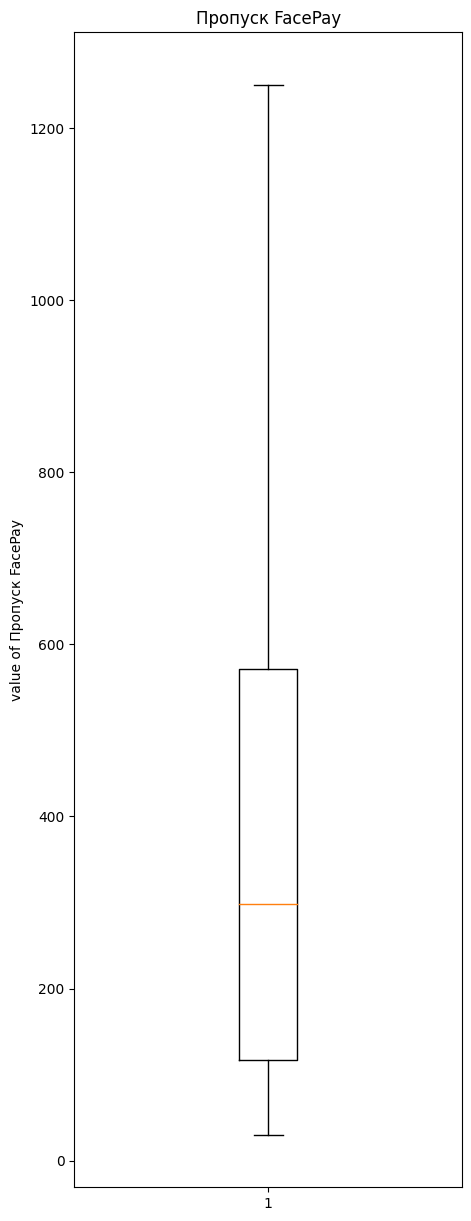

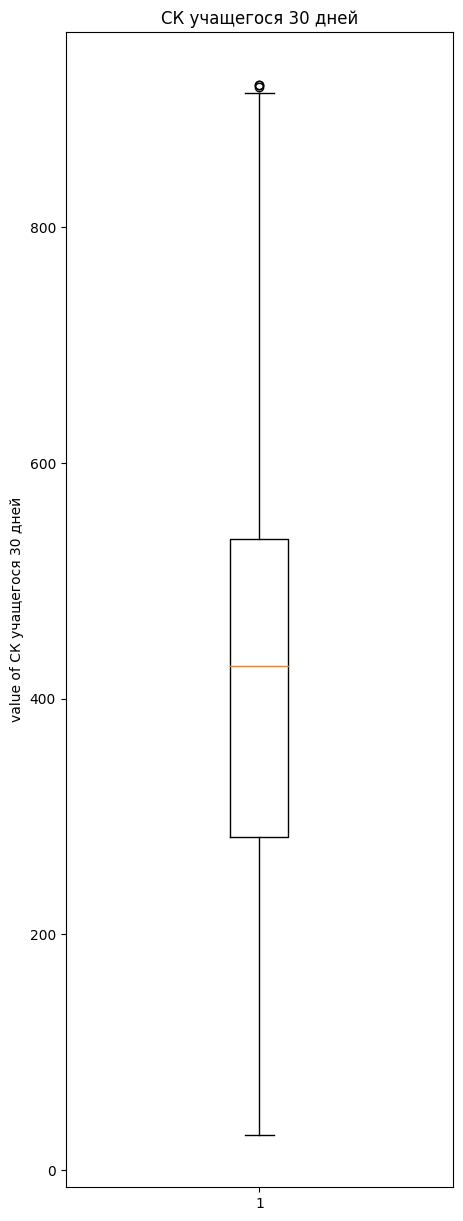

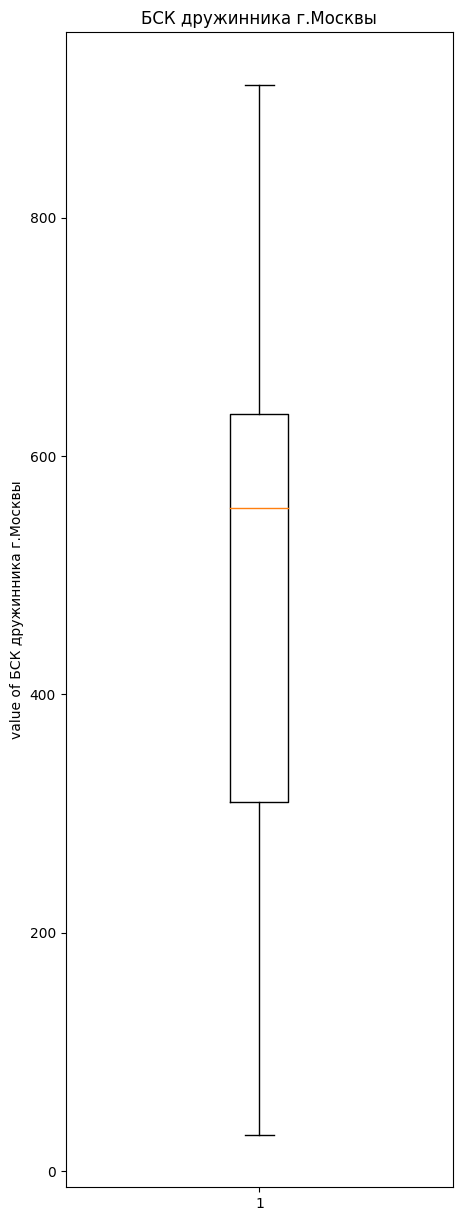

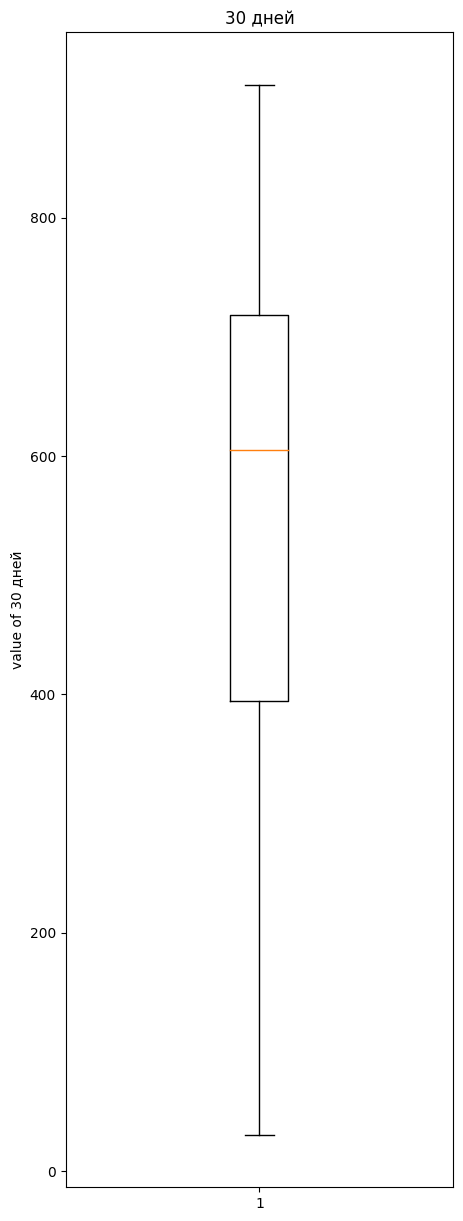

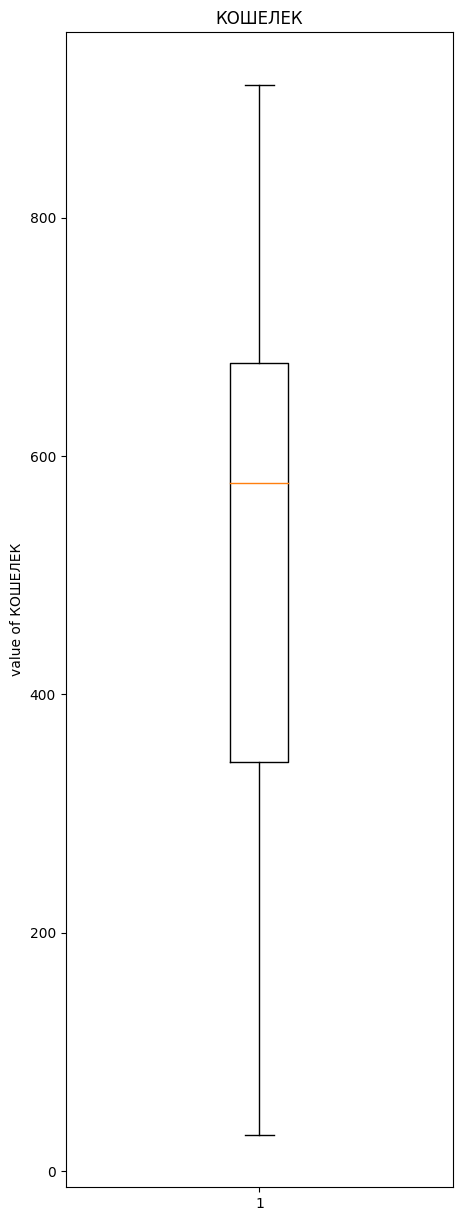

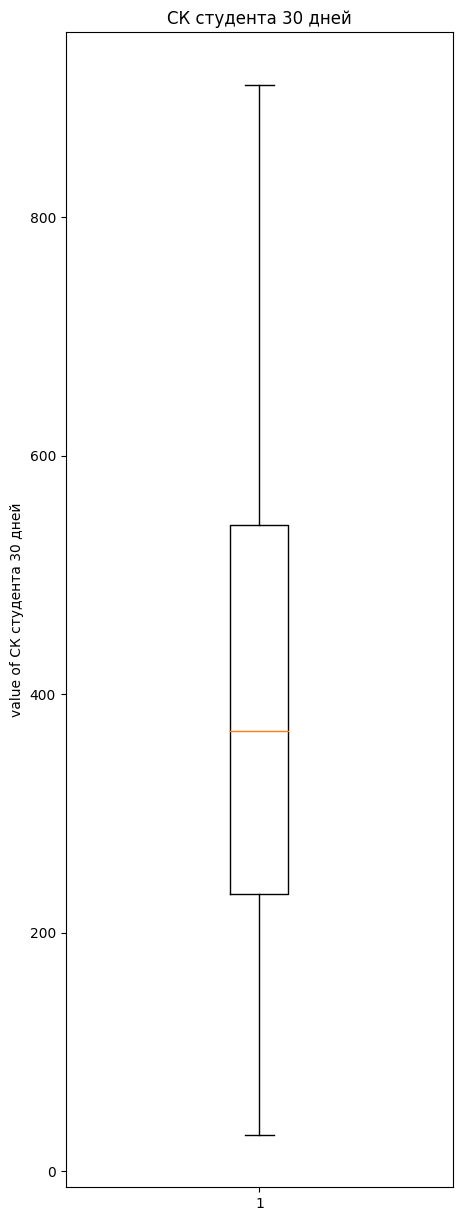

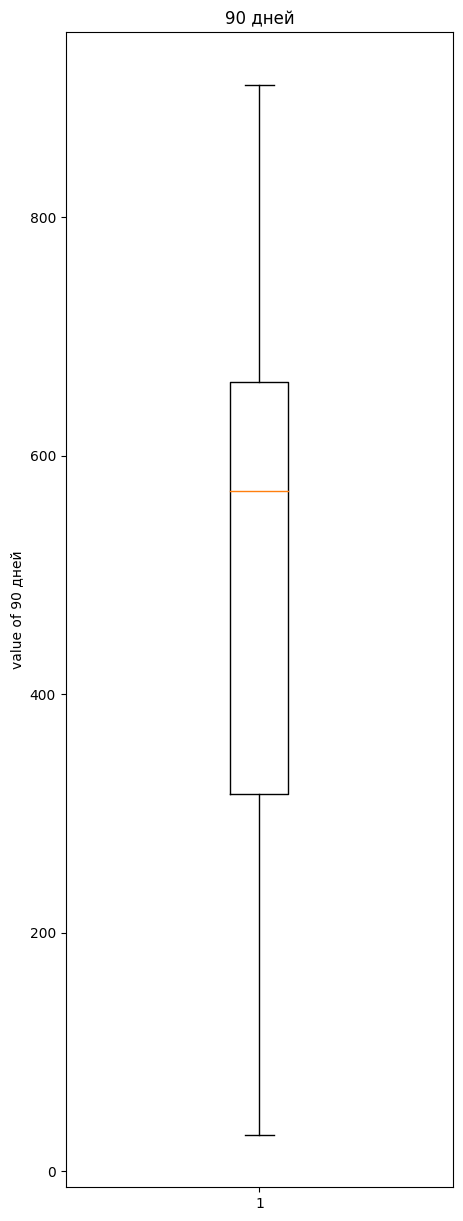

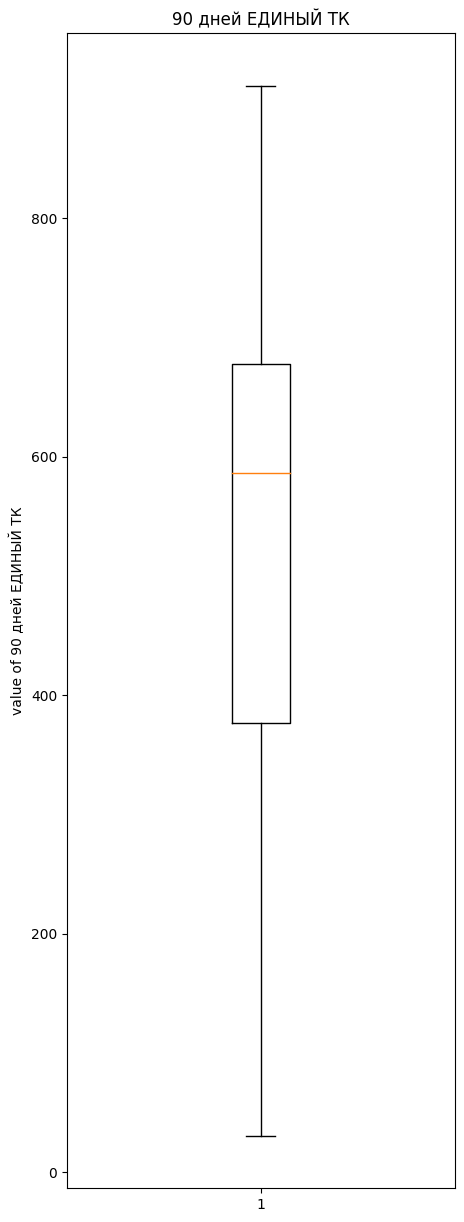

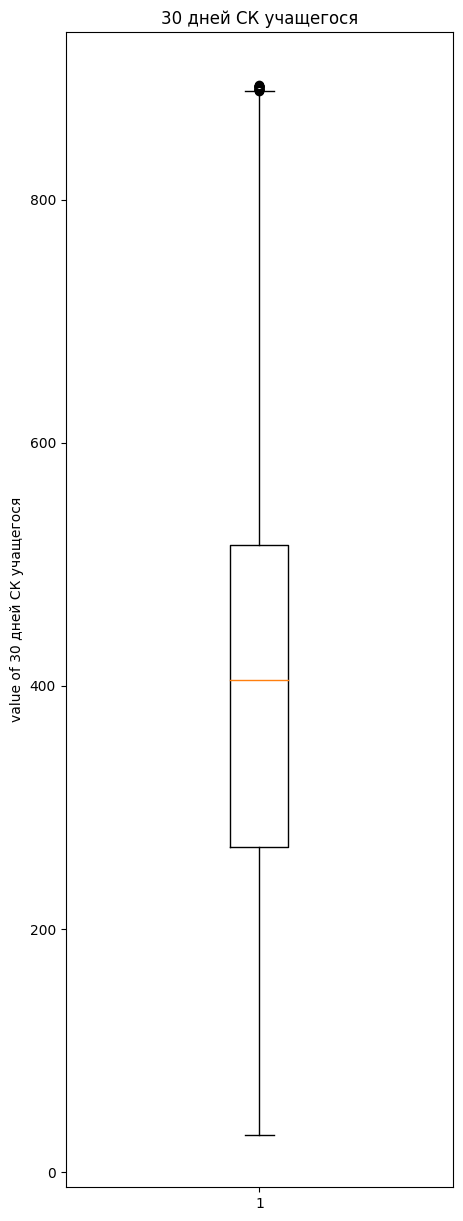

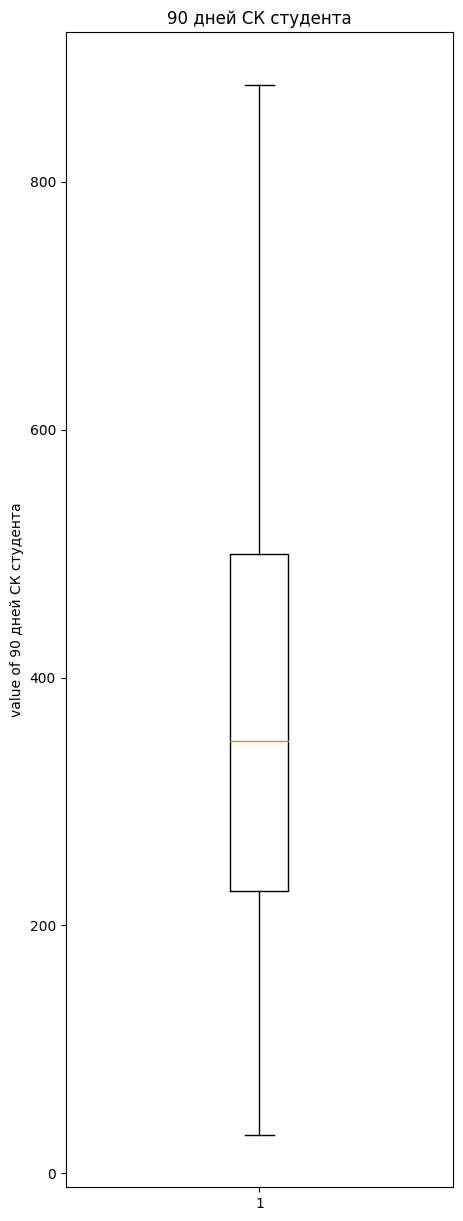

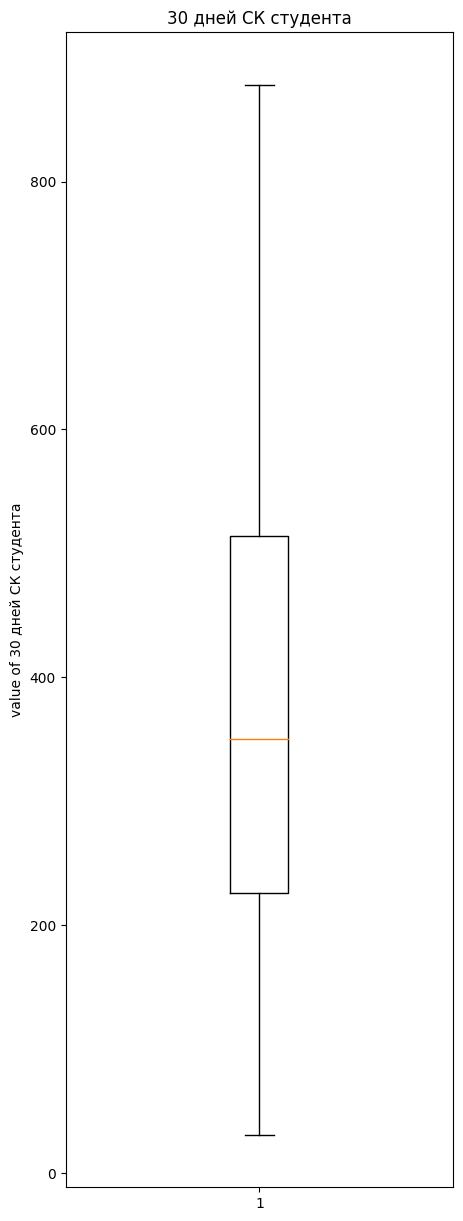

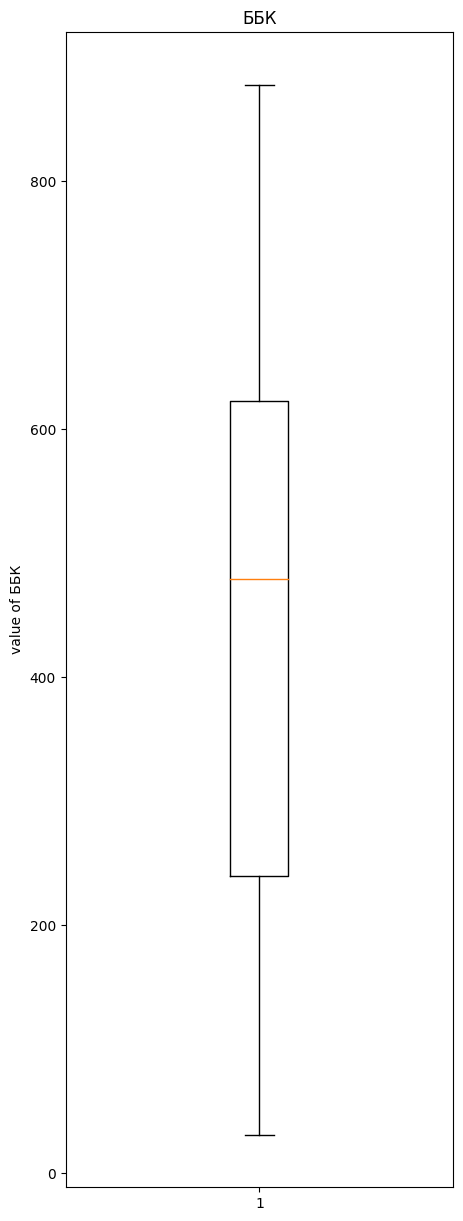

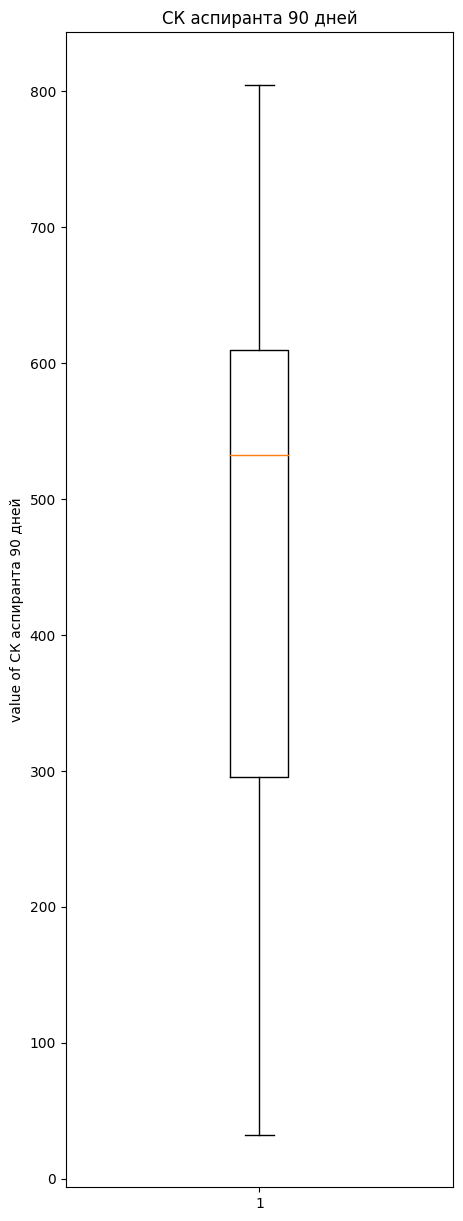

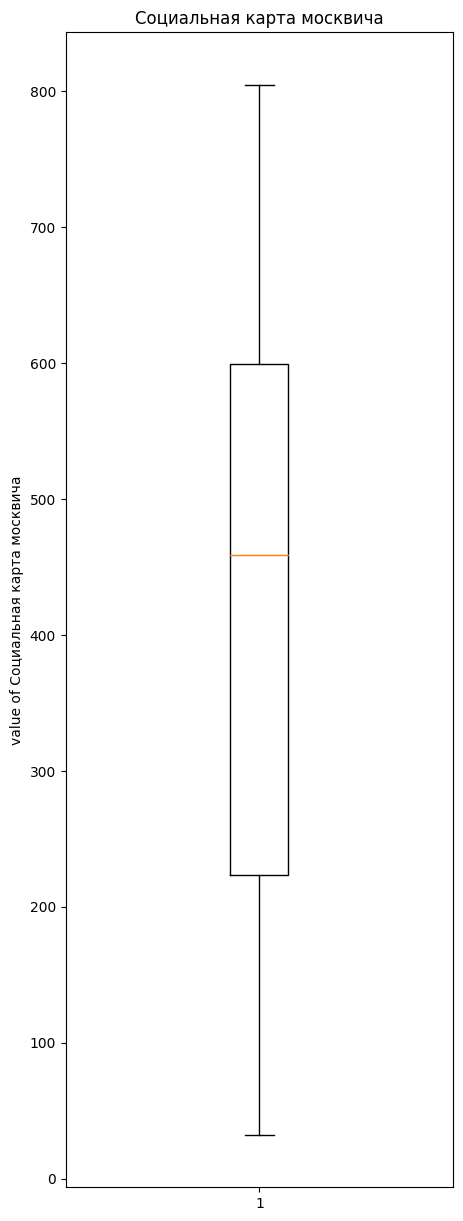

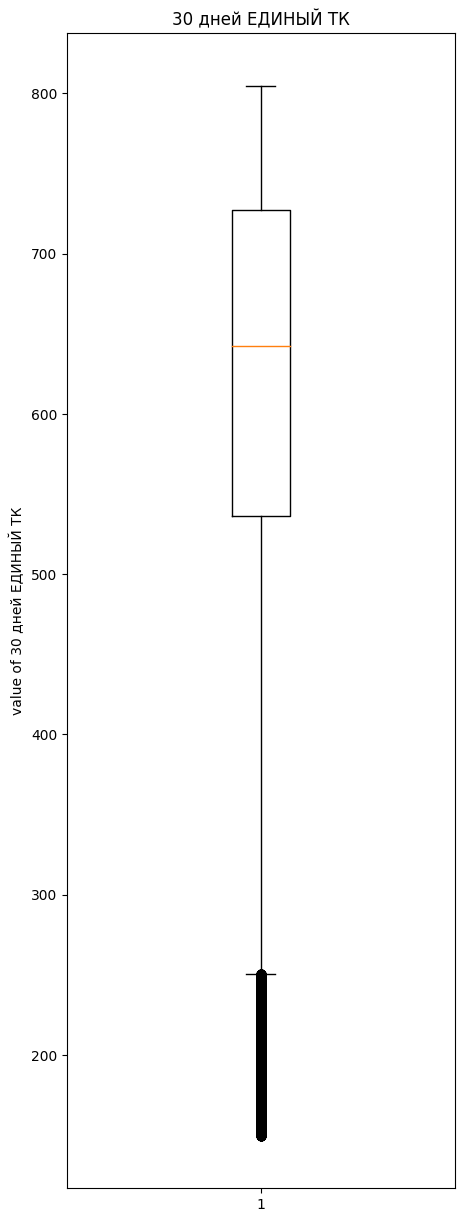

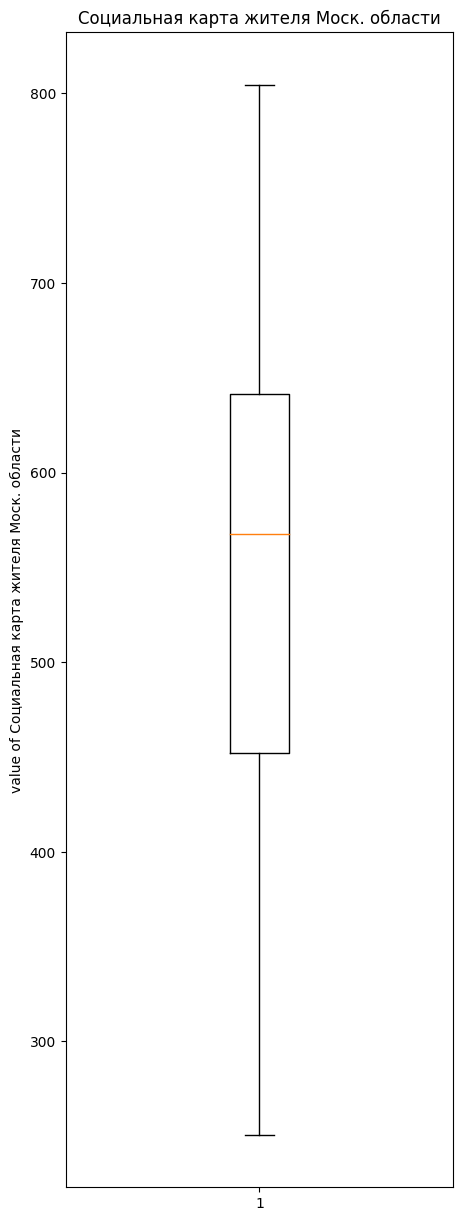

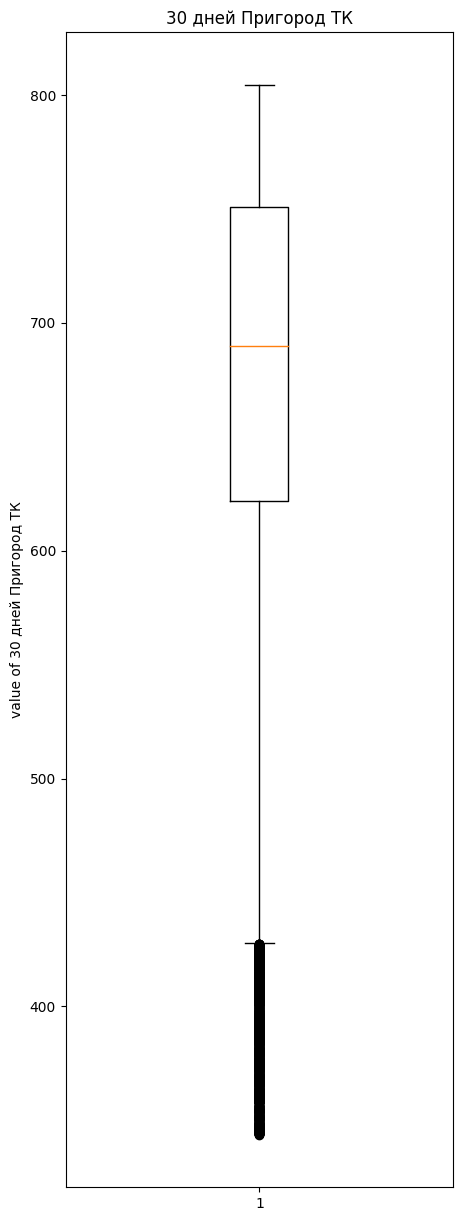

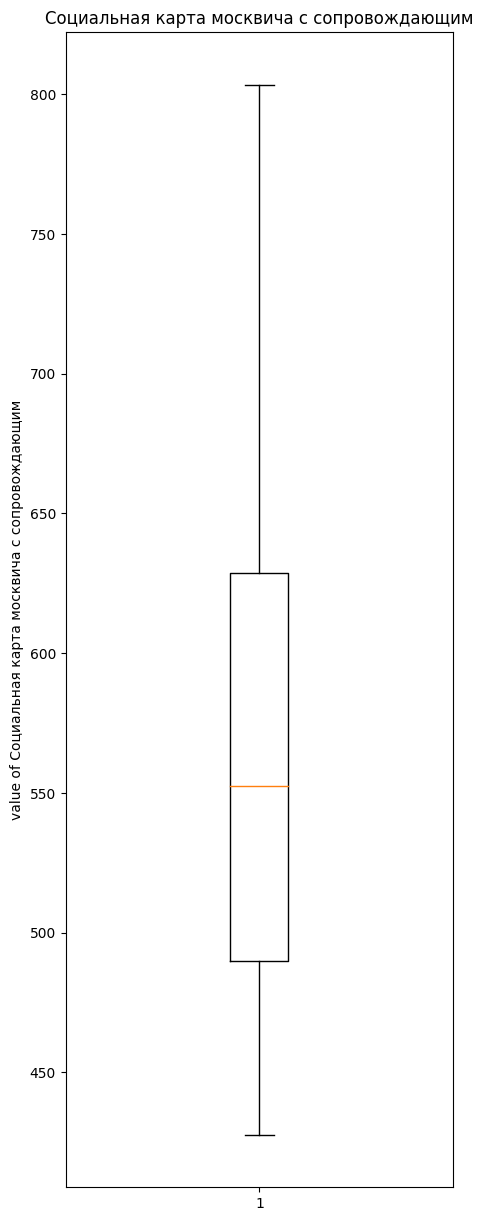

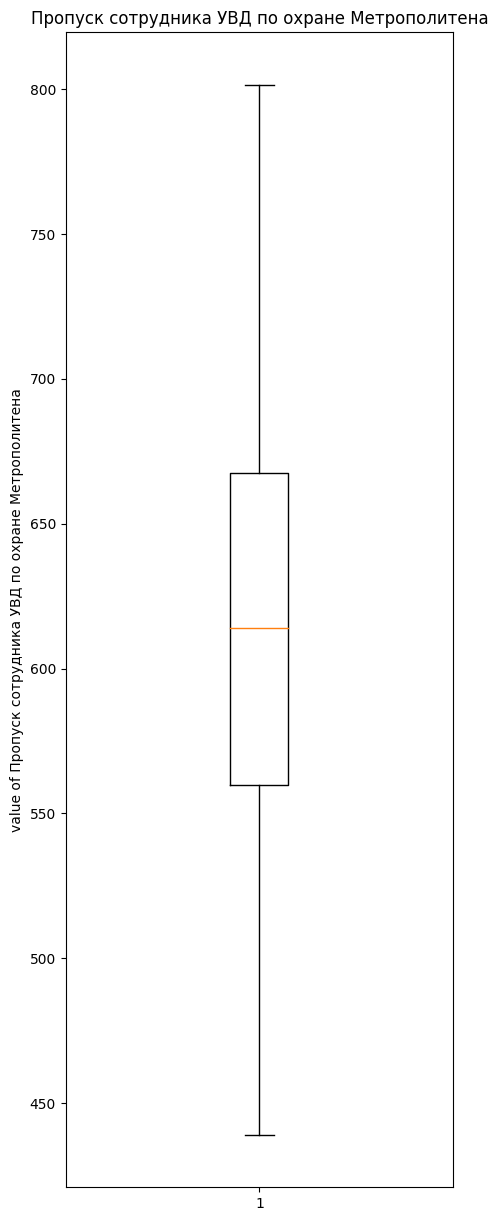

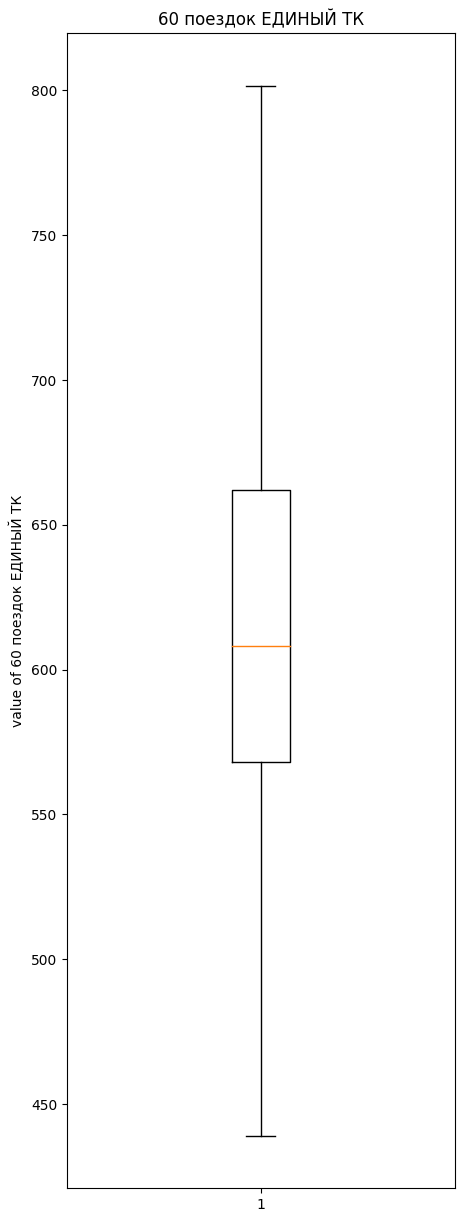

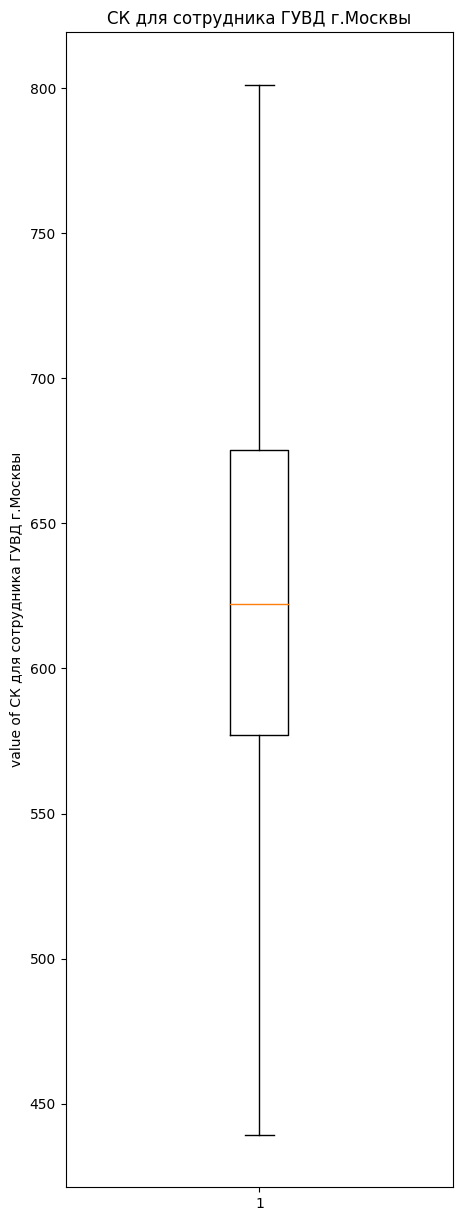

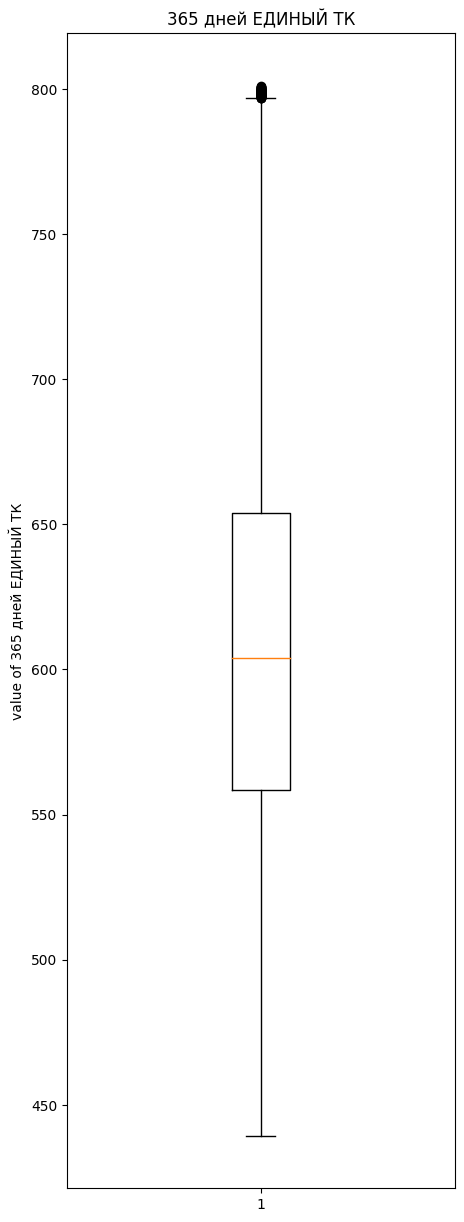

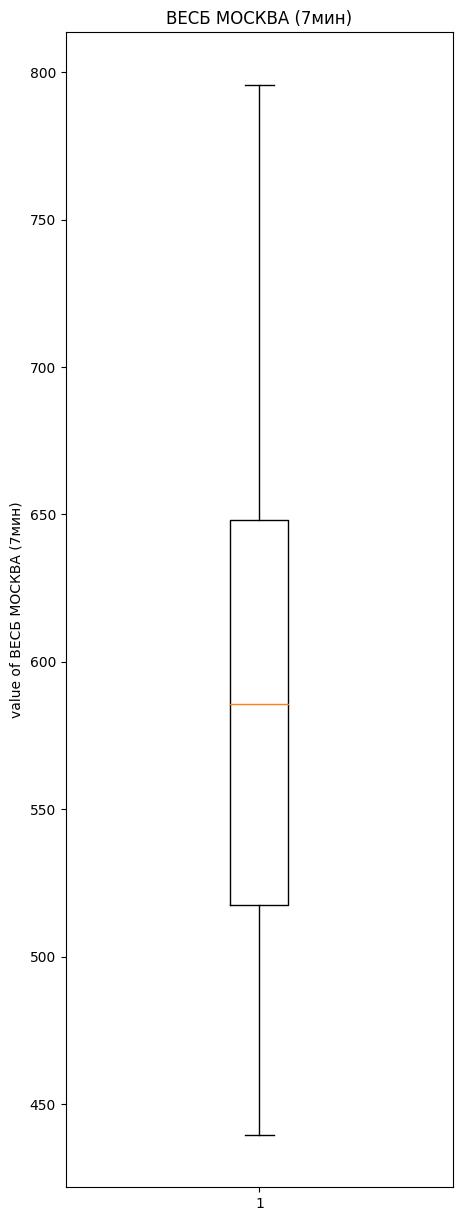

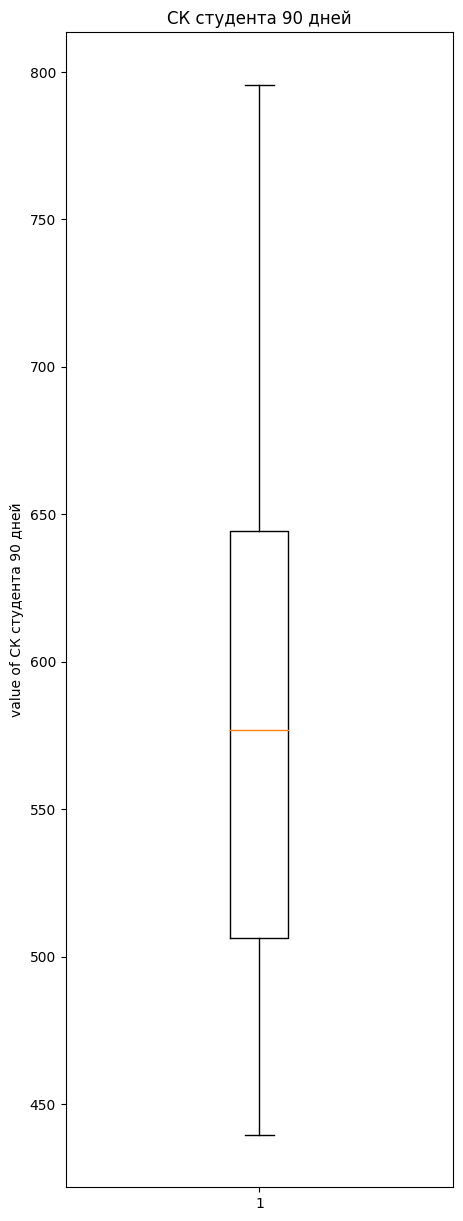

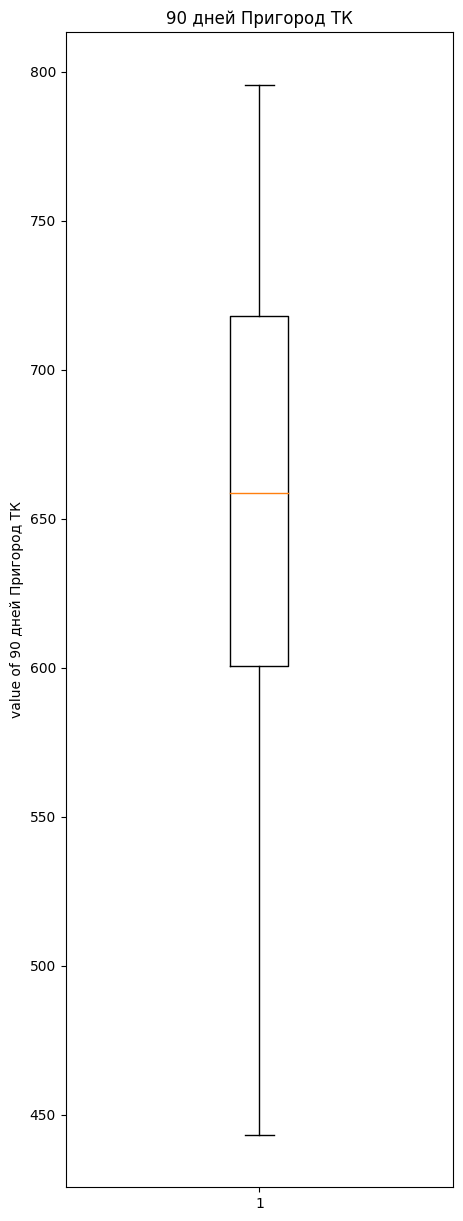

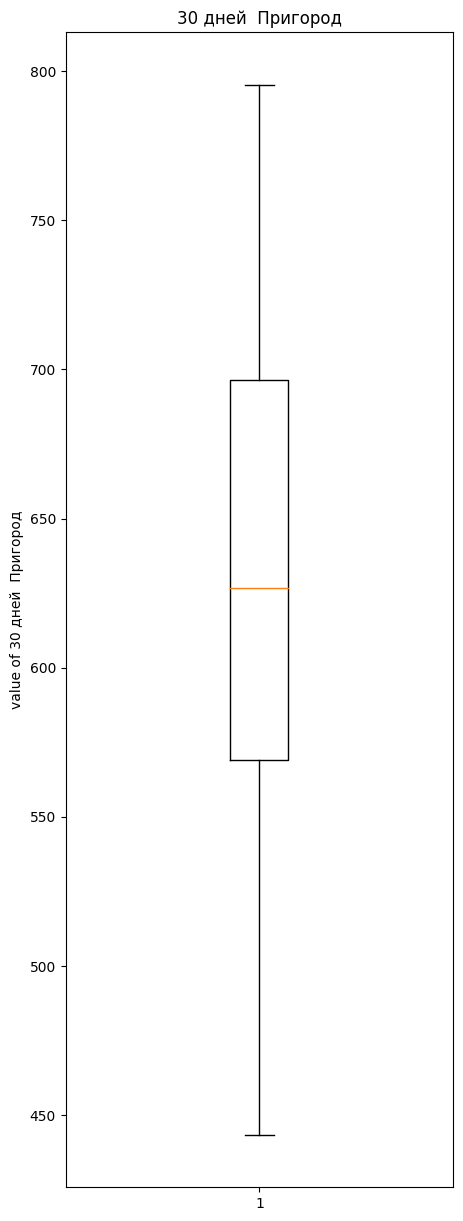

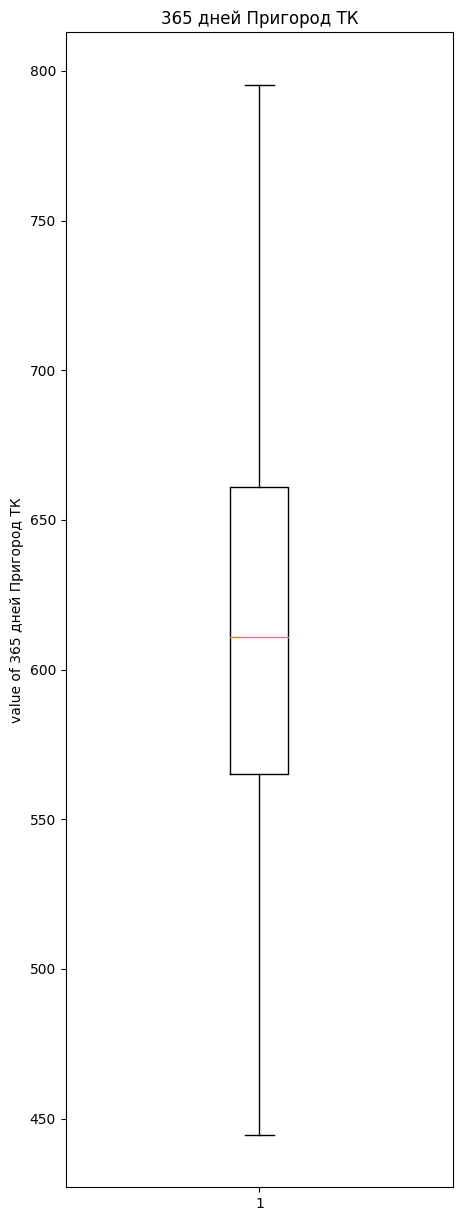

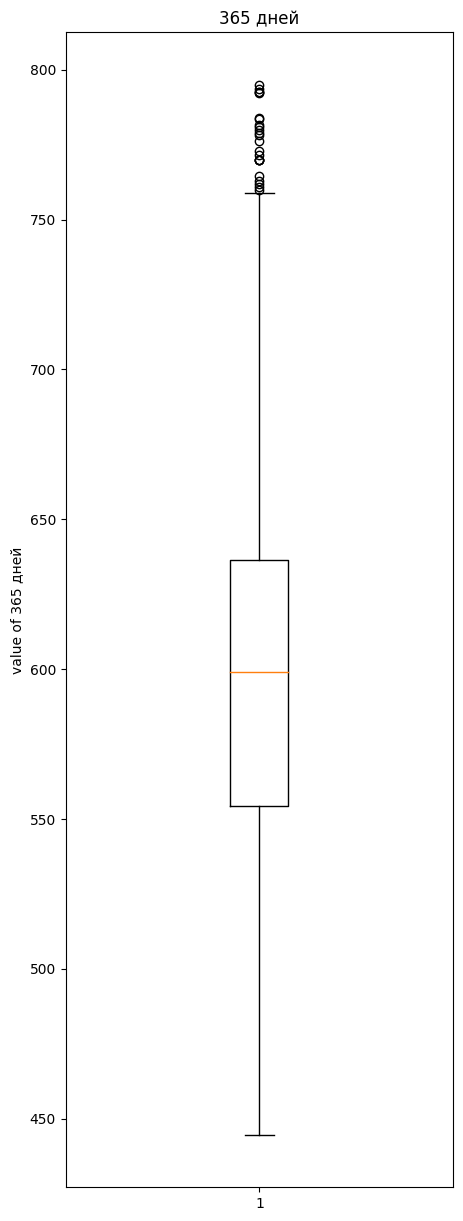

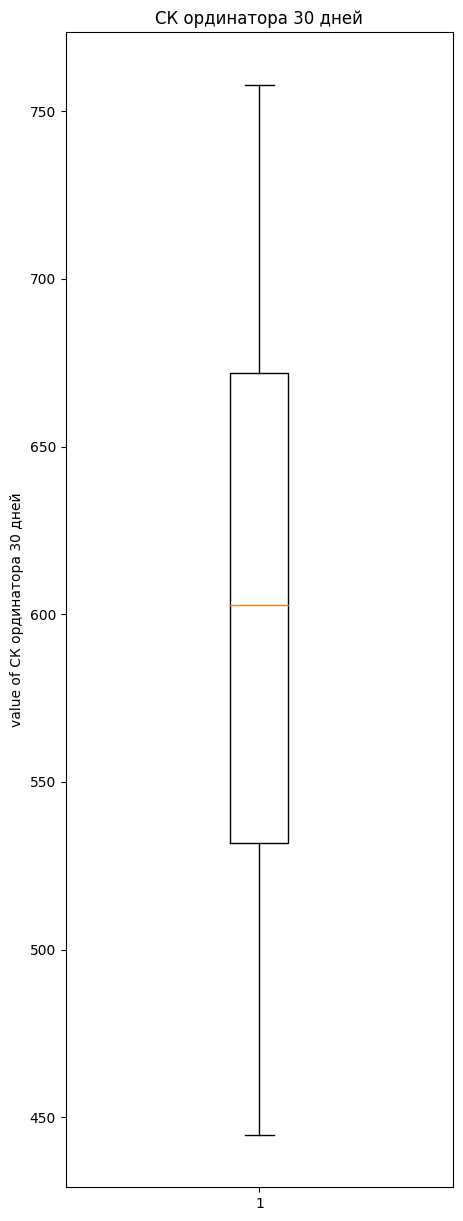

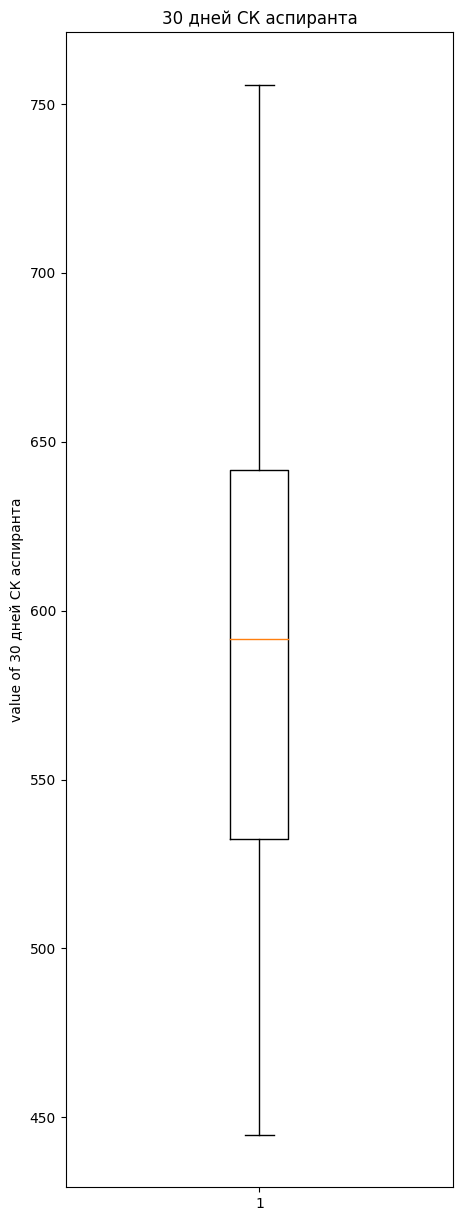

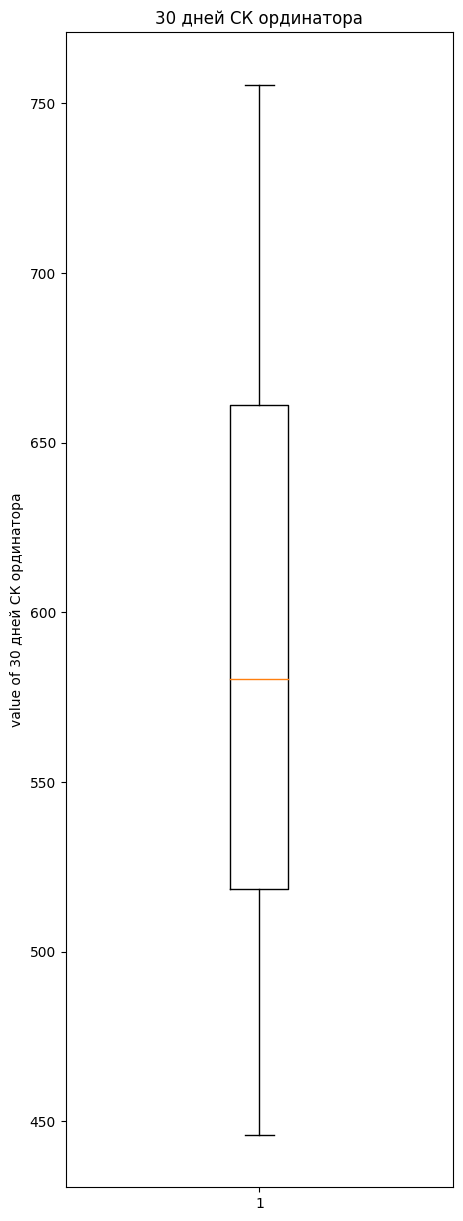

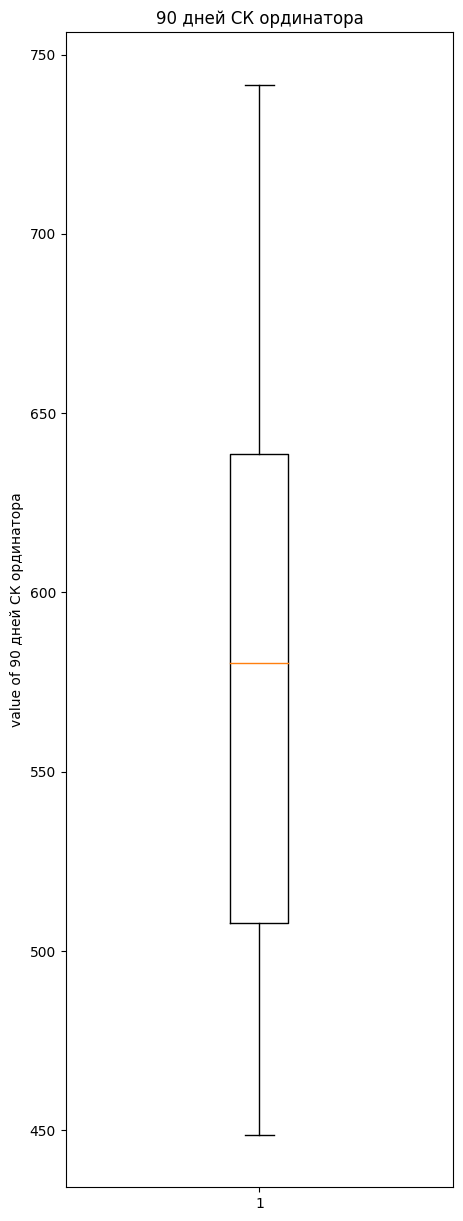

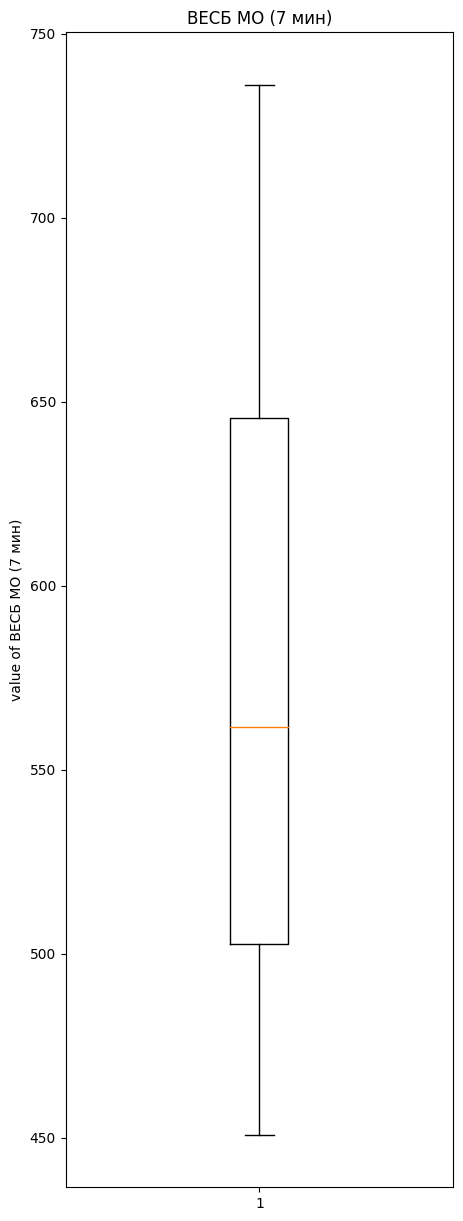

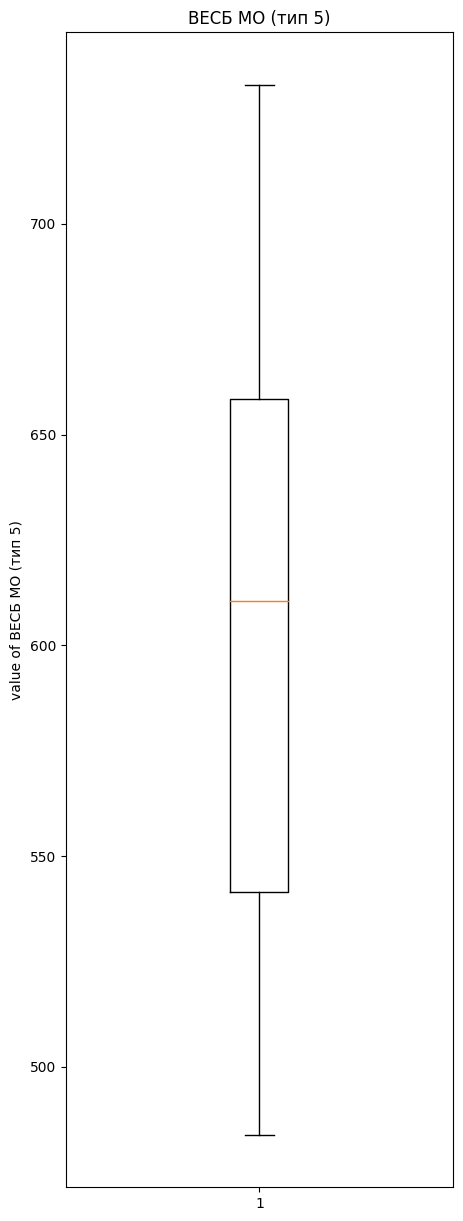

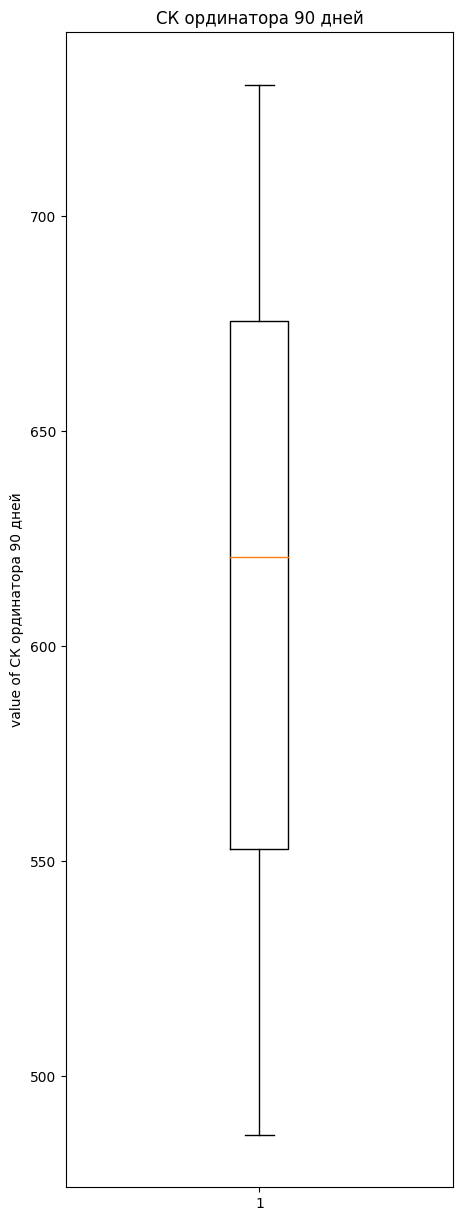

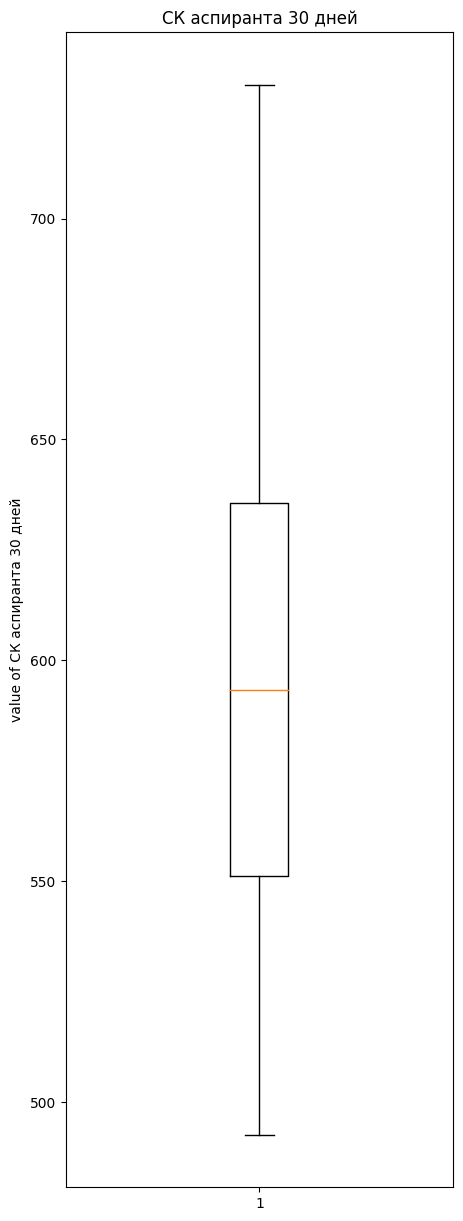

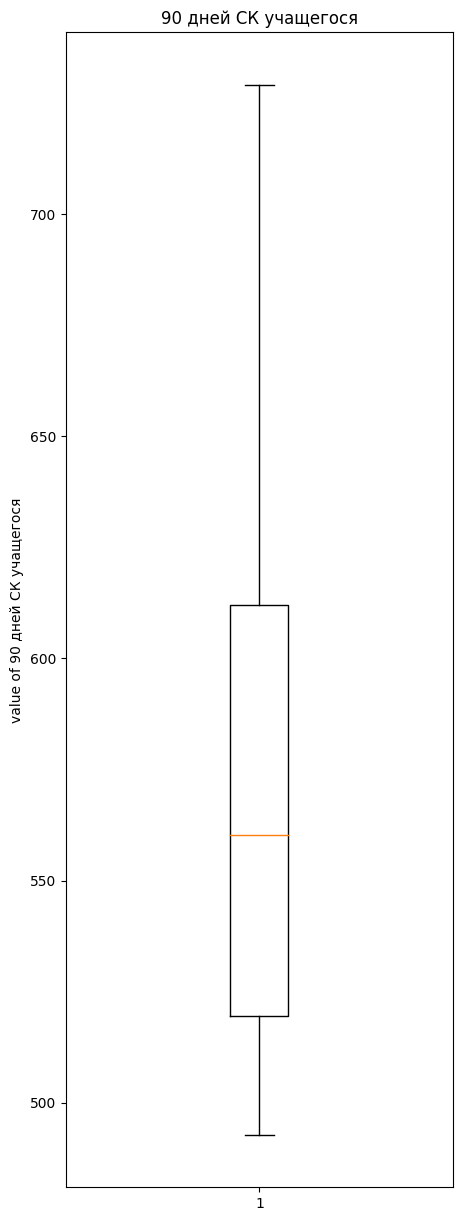

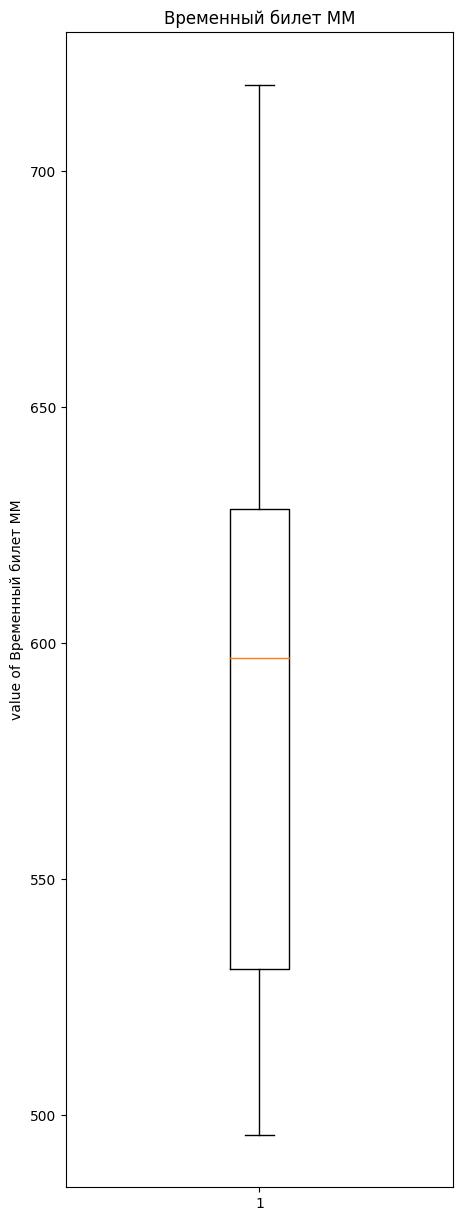

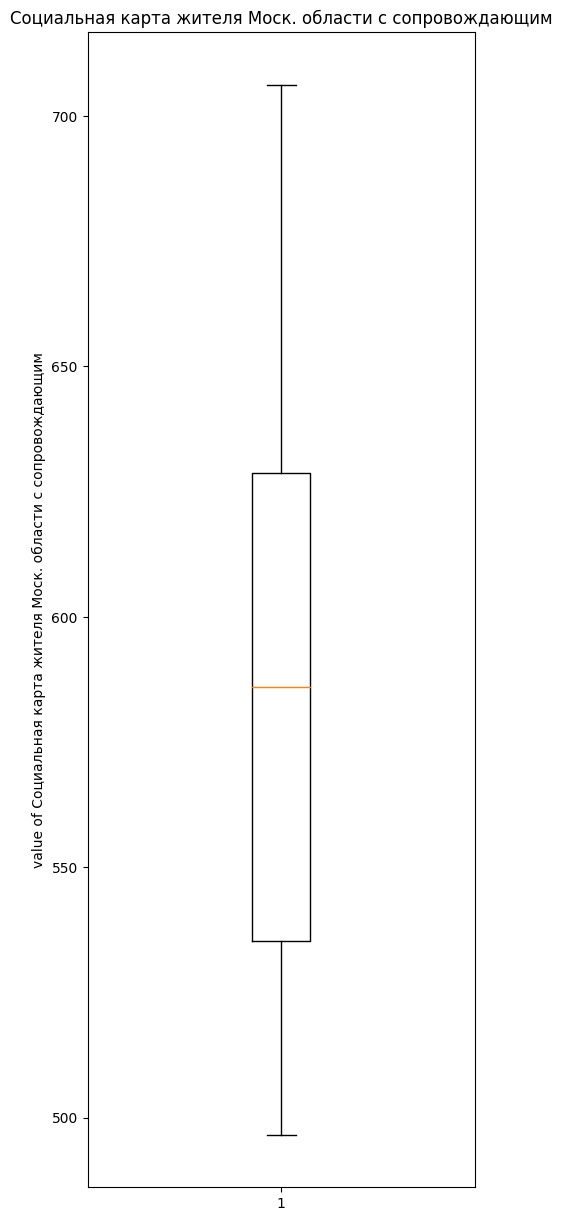

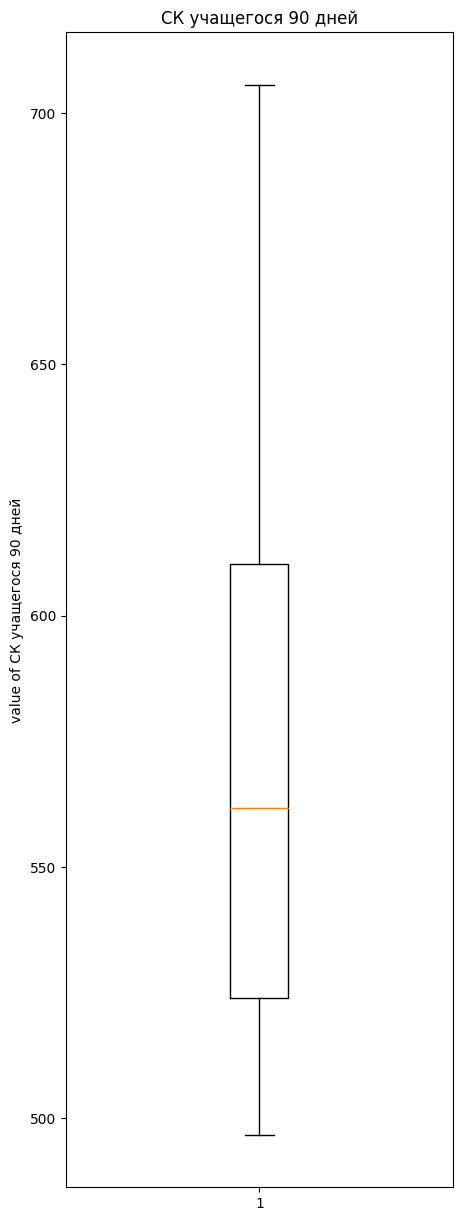

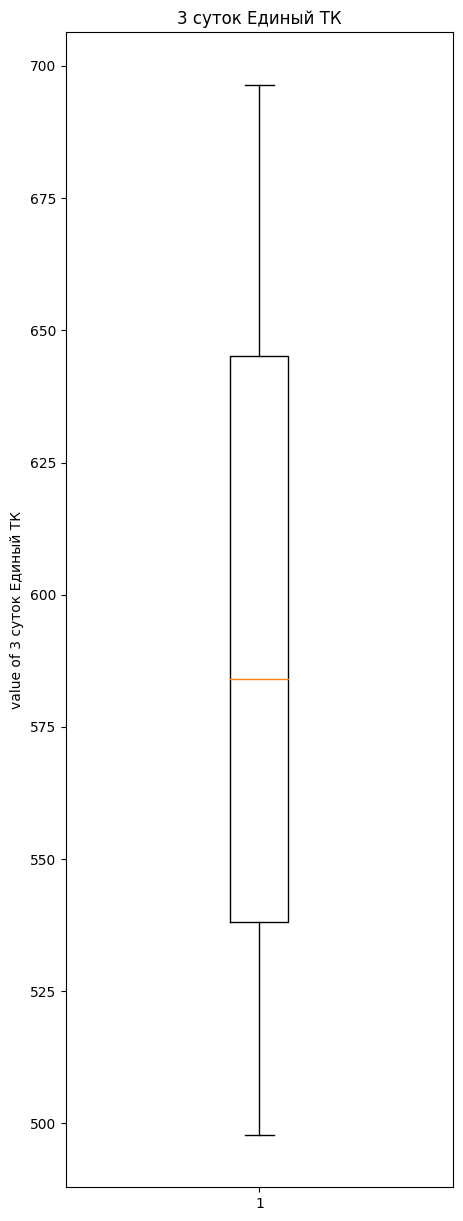

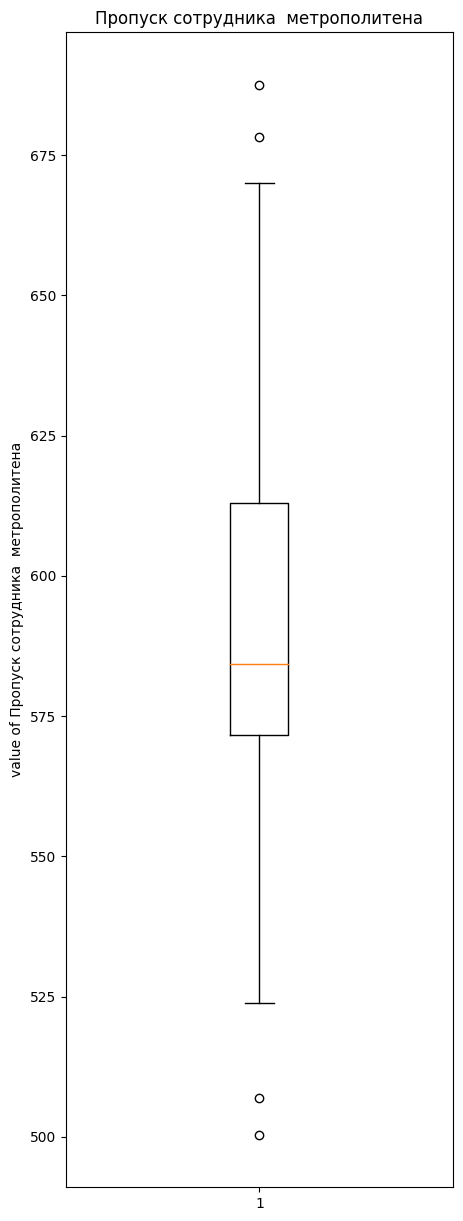

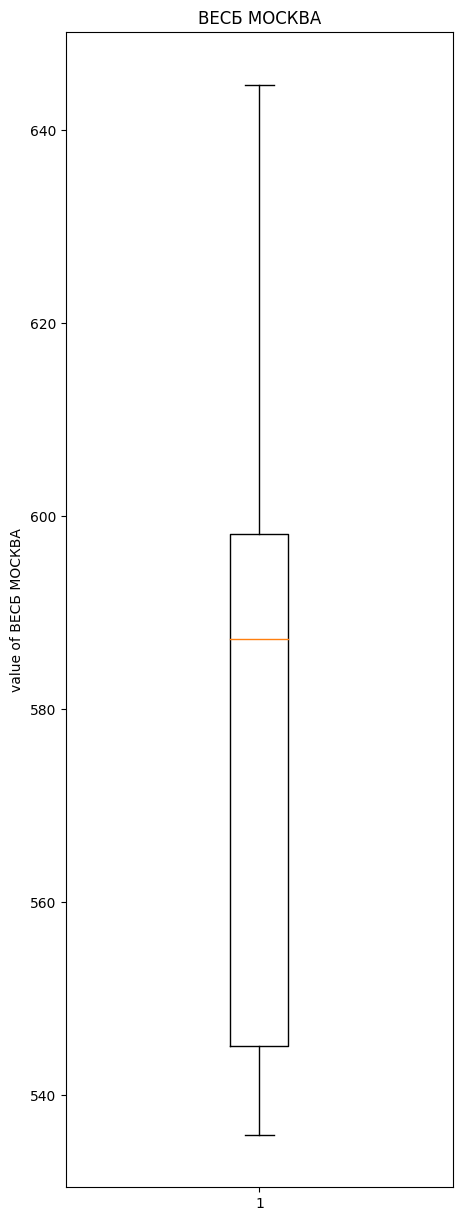

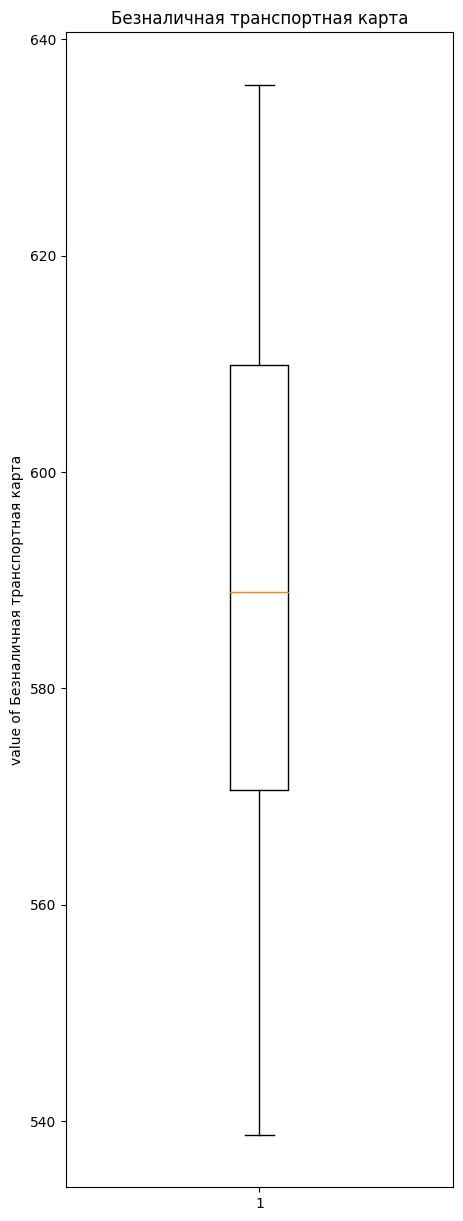

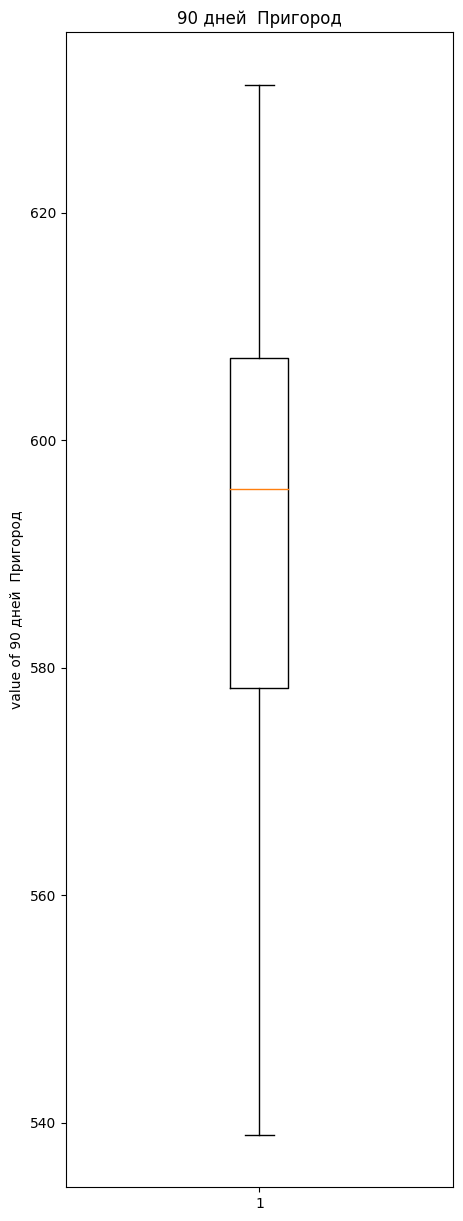

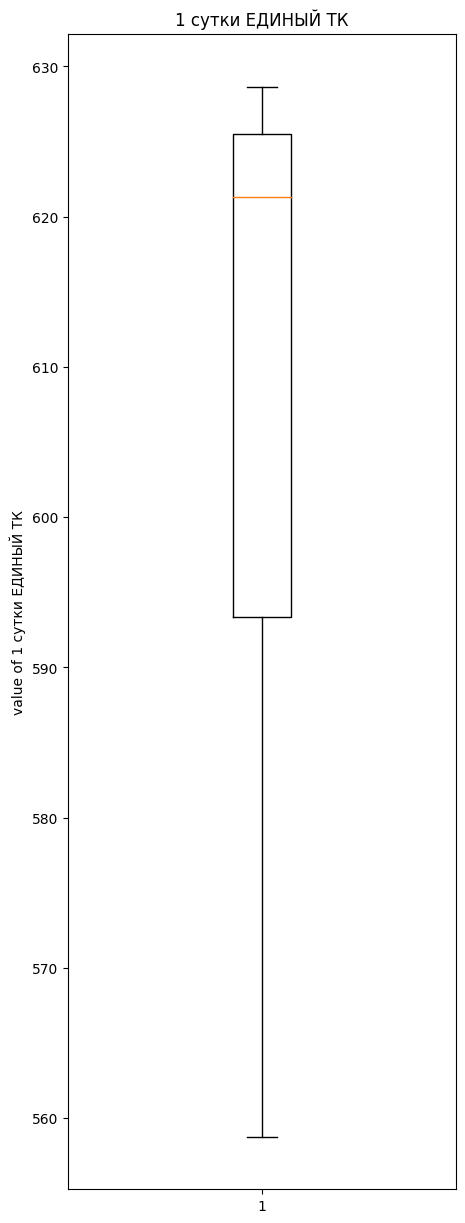

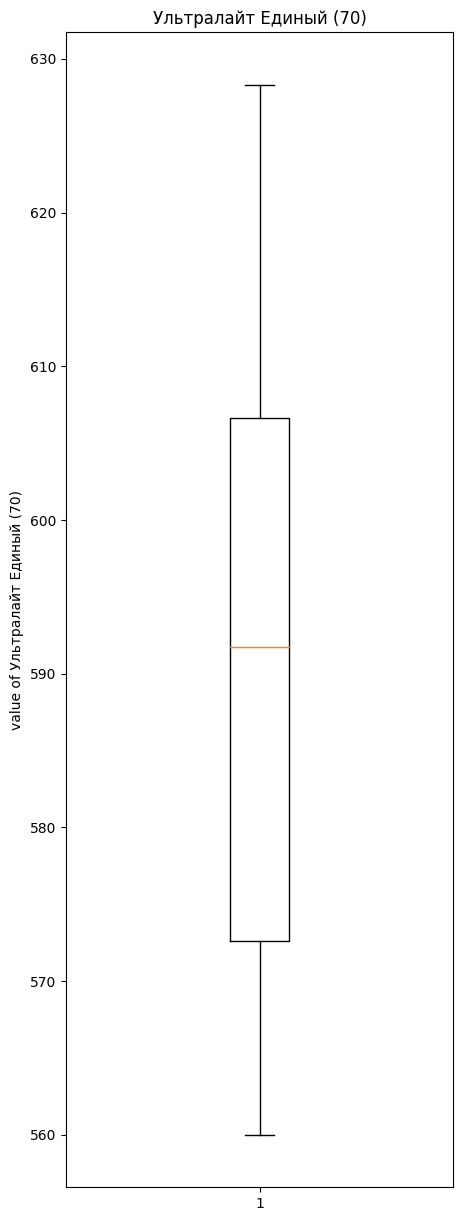

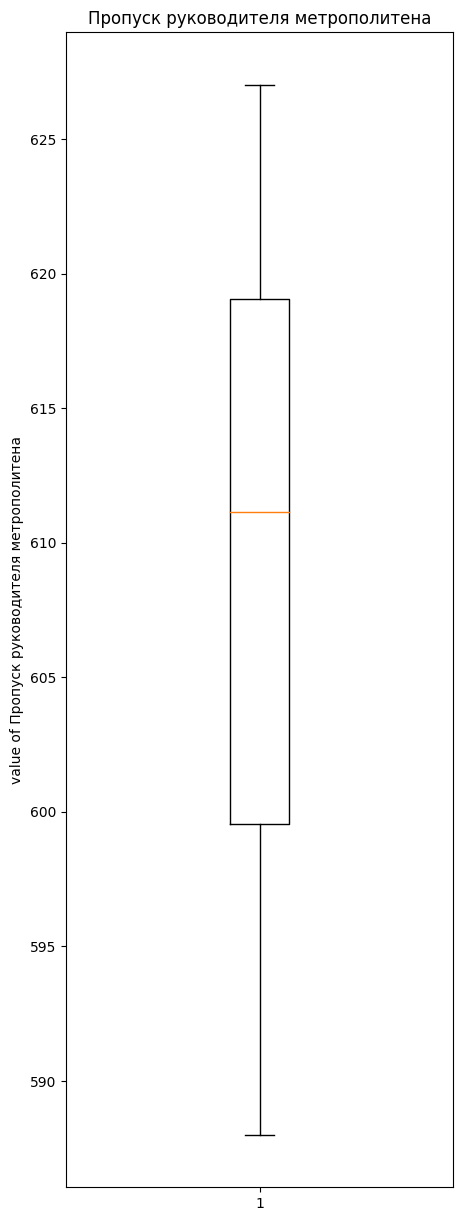

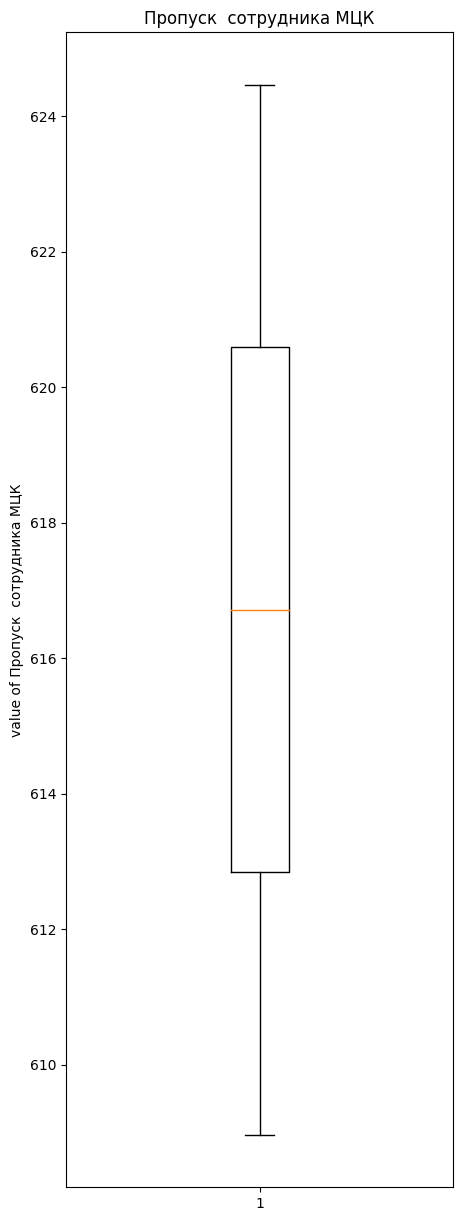

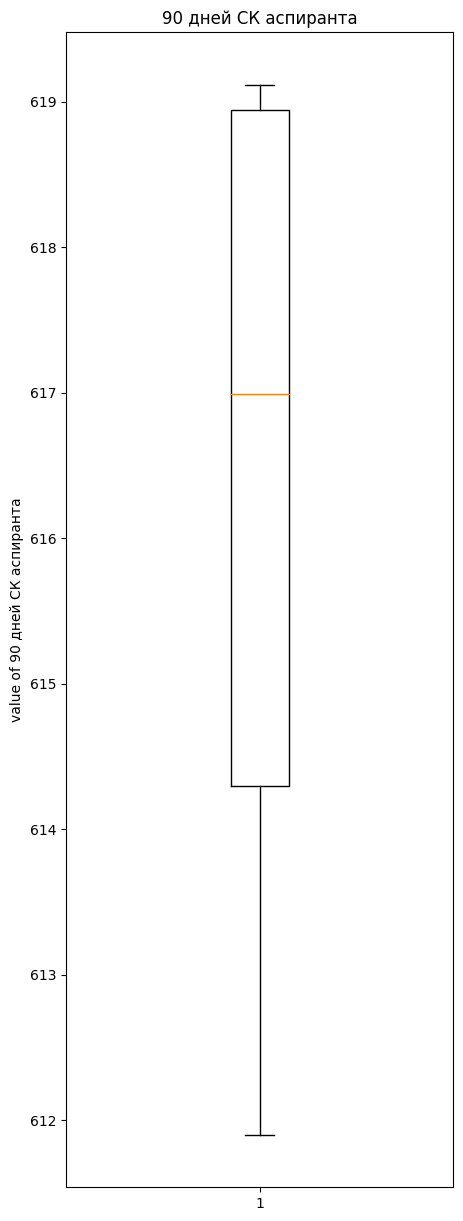

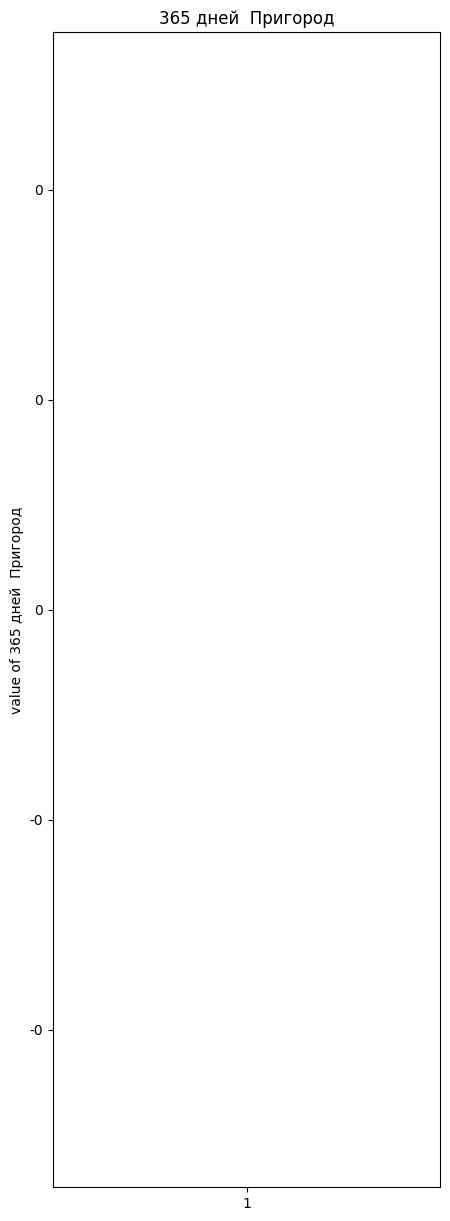

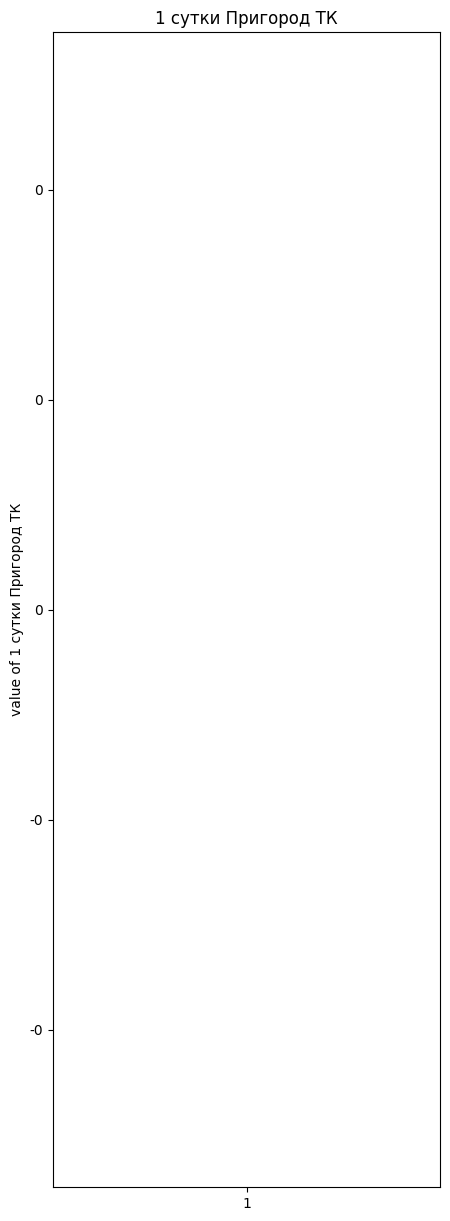

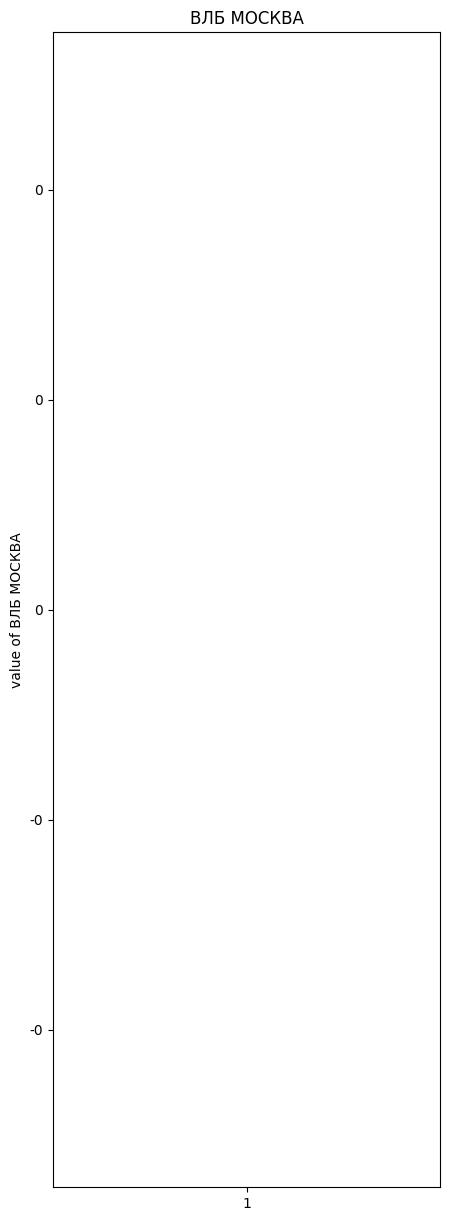

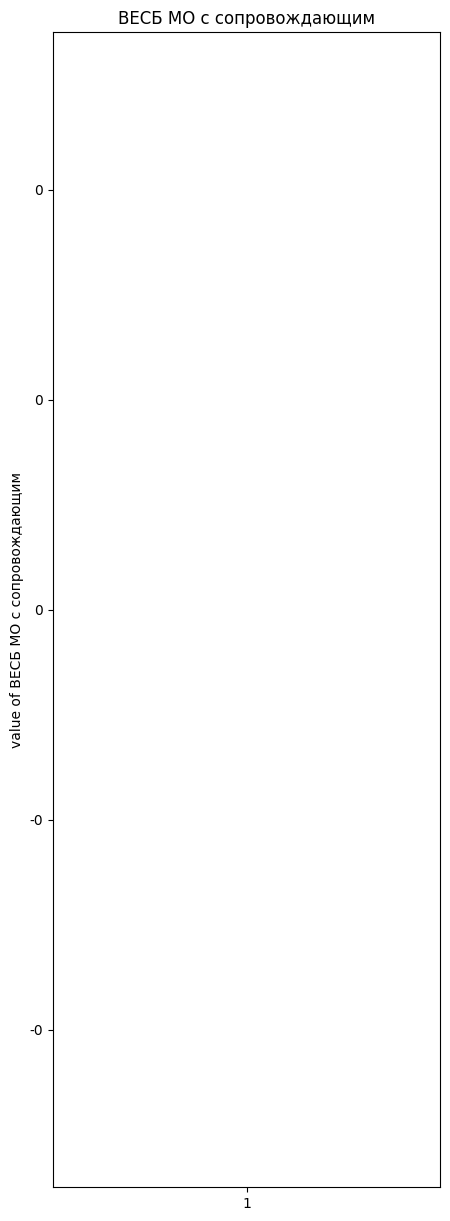

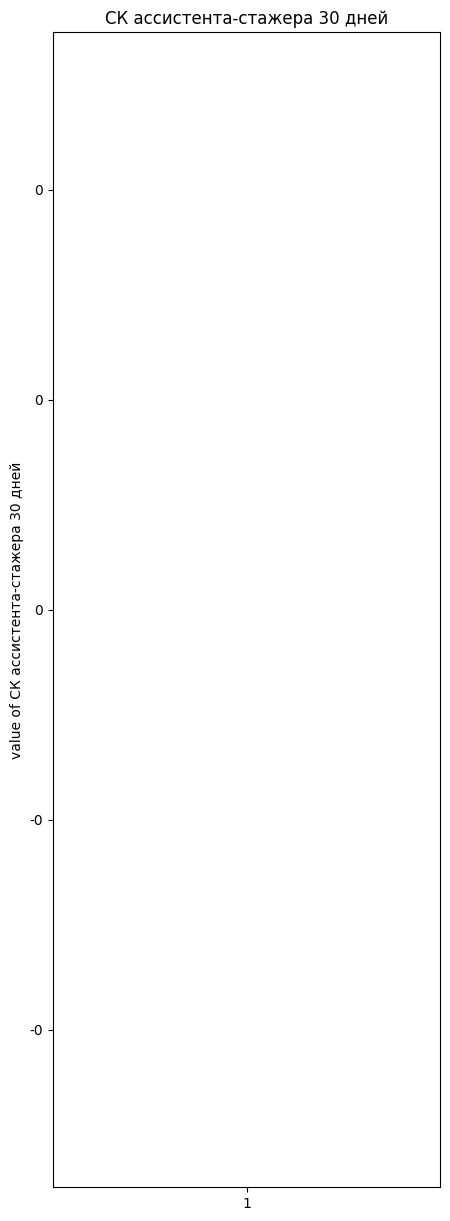

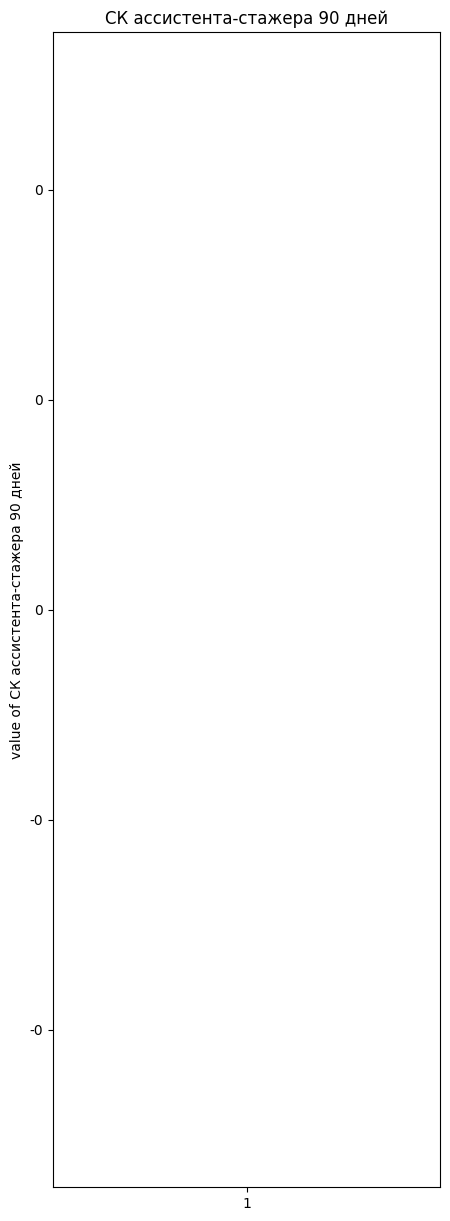

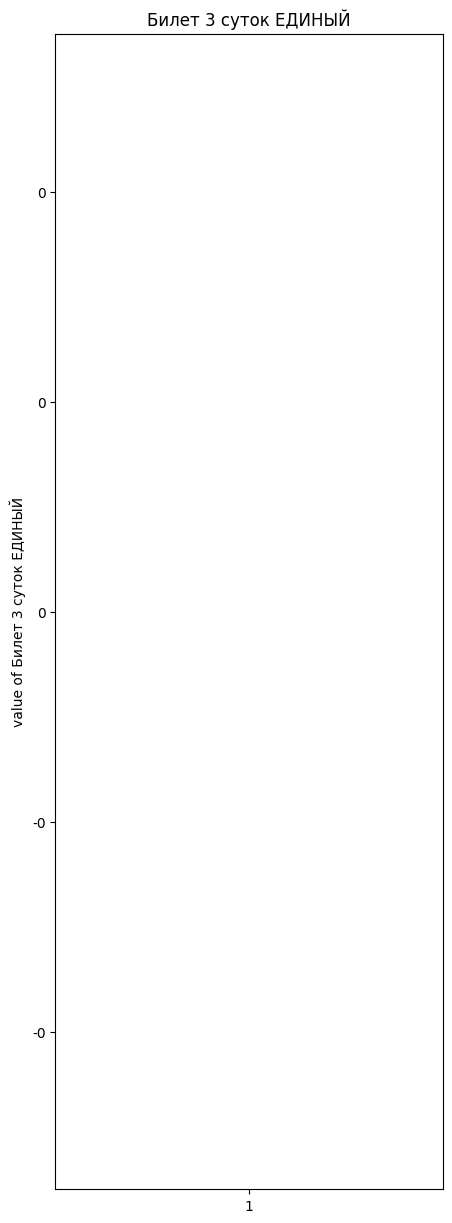

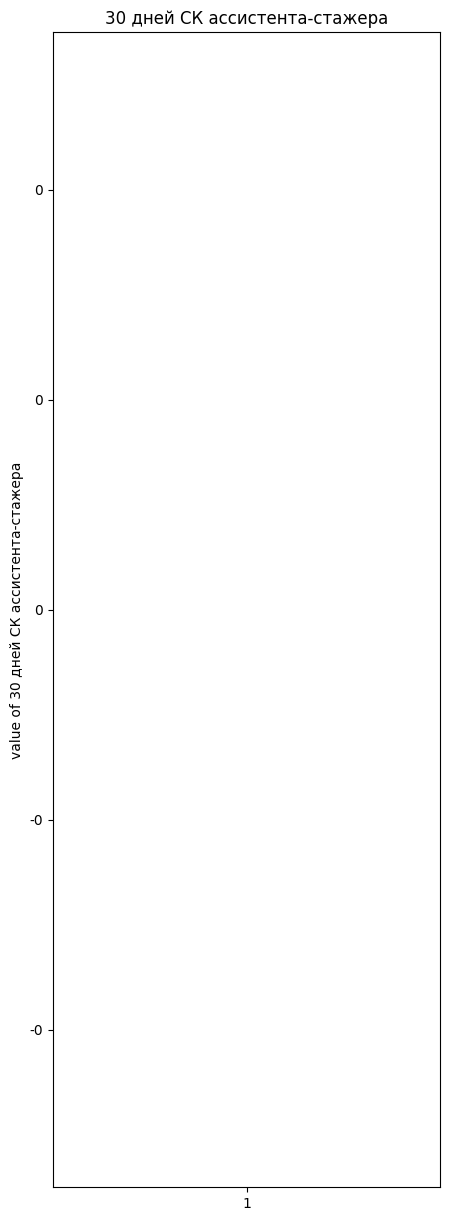

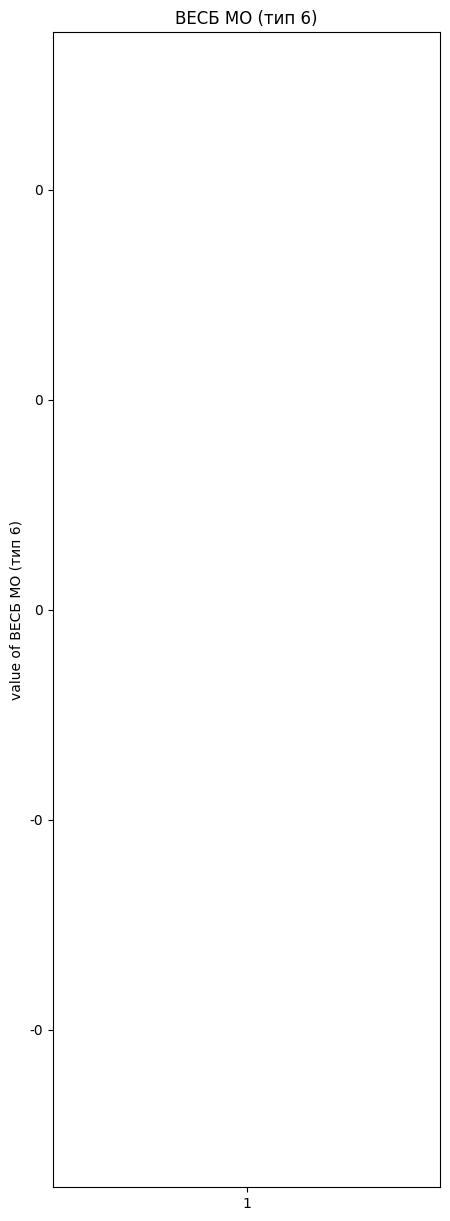

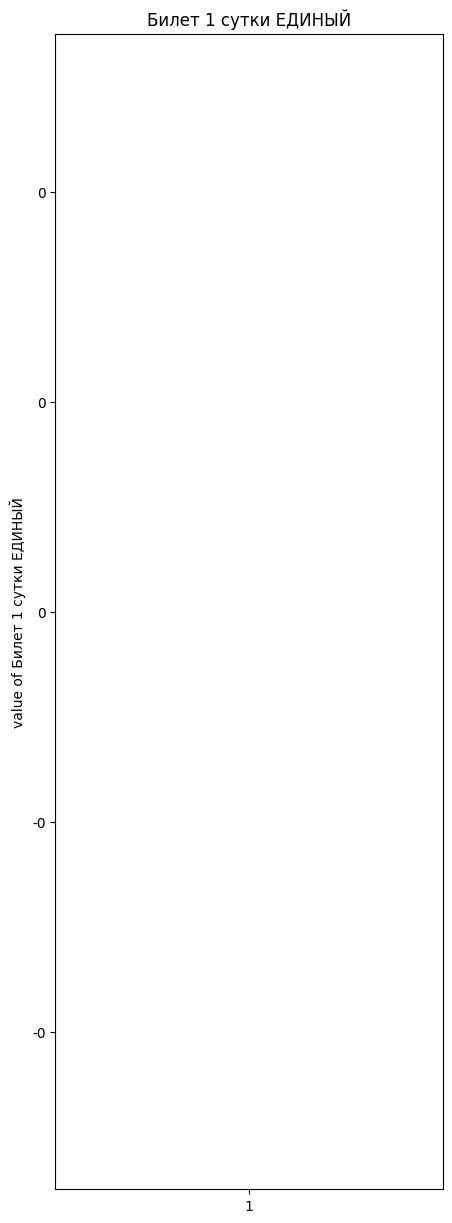

In [129]:
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
for feature in list(data["ticket_type_nm"].unique()):
    fig, ax = plt.subplots(figsize=(5, 15))
    tu = data[data["ticket_type_nm"] == feature]
    B = ax.boxplot(tu["time_to_under"])
    
    
    
    Wh = [item.get_ydata()[1] for item in B["whiskers"]]
    
    tu = tu[(tu['time_to_under']>Wh[0]) & (tu['time_to_under']<Wh[1])]
    
    #indexes = tu.loc[lambda tu: (tu>Wh[1]) | (tu < Wh[0])].index
    
    #data.drop(index = indexes, inplace = True)
    
    
    fig, ax = plt.subplots(figsize=(5, 15))
    B = ax.boxplot(tu["time_to_under"])
    
    ax.set_ylabel(f"value of {feature}")
    ax.set_title(str(feature))

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    fig.show()
    
#for feature in list(data["ticket_type_nm"].unique()):
 #   data[data["ticket_type_nm"] == feature]["time_to_under"]
    
  #  if data[data["ticket_type_nm"] == feature]["time_to_under"]:
   #     pass

KeyboardInterrupt: 

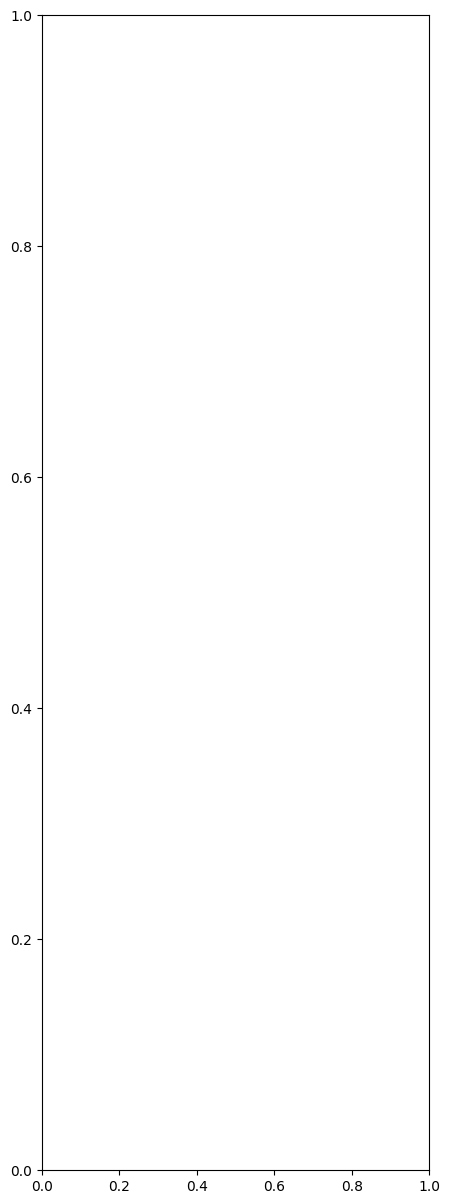

In [243]:
for feature in list(data["ticket_type_nm"].unique()):
    fig, ax = plt.subplots(figsize=(5, 15))
    tu = data[data["ticket_type_nm"] == feature]["time_to_under"]
    ax.boxplot(tu)

    ax.set_ylabel(f"value of {feature}")
    ax.set_title(str(feature))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


In [238]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

new_features = ["Arts & Entertainment", "College & University",
                "Food", "Nightlife Spot", "Outdoors & Recreation", "Professional & Other Places", "Residence",
               "Shop & Service", "Travel & Transport"]



other_items = ['entrance_minute', 'time_to_under', 'label', "holiday"]

big2d_list = [other_items, categorical_features, new_features]

feature_names = [item for sublist in big2d_list for item in sublist]
feature_names.remove('label')
feature_names.remove('time_to_under')


data_X = data[feature_names]

data_Y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y,
                                                    random_state=1, test_size = 0.2, stratify = data_Y)

clf = MLPClassifier(random_state=1, max_iter=10, hidden_layer_sizes=(50, 50, 50, 50, 50)).fit(X_train, y_train)

y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred, average='weighted')
print("recall = ", recall)

print(classification_report(y_pred, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


recall =  0.06210470245698594


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        1002       0.00      0.00      0.00         3
        1003       0.03      0.05      0.03       304
        1004       0.00      0.00      0.00         0
        1005       0.02      0.03      0.03       751
        1006       0.00      0.00      0.00        21
        1007       0.00      0.00      0.00         3
        1008       0.00      0.03      0.01       191
        1009       0.08      0.04      0.05      4568
        1011       0.01      0.07      0.01        89
        1012       0.00      0.00      0.00         0
        1013       0.03      0.06      0.04       205
        1014       0.18      0.10      0.13      1341
        1015       0.00      0.04      0.00        57
        1016       0.01      0.02      0.01       355
        1017       0.00      0.00      0.00         0
        1018       0.17      0.14      0.15      2116
        1019       0.02      0.13      0.03       172
        1020       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [242]:
data_X.head(3)

enterance_minute  holiday  x0_Авиамоторная  x0_Автозаводская  \
15046               0.0        0              0.0               0.0   
15047               0.0        0              0.0               0.0   
15048               0.0        0              0.0               0.0   

       x0_Академическая  x0_Александровский сад  x0_Алексеевская  \
15046               0.0                     0.0              0.0   
15047               0.0                     0.0              0.0   
15048               0.0                     0.0              0.0   

       x0_Алма-Атинская  x0_Алтуфьево  x0_Аминьевская  ...  x3_2466  \
15046               0.0           0.0             0.0  ...      0.0   
15047               0.0           0.0             0.0  ...      0.0   
15048               0.0           0.0             0.0  ...      0.0   

       Arts & Entertainment  College & University      Food  Nightlife Spot  \
15046              0.114504              0.479167  0.203320        0.059603   
15047              0.389313              0.697917  0.456432        0.331126   
15048              0.045802              0.125000  0.112033        0.026490   

       Outdoors & Recreation  Professional & Other Places  Residence  \
15046               0.528090                     0.557292   0.416667   
15047               0.629213                     0.828125   0.541667   
15048               0.202247                     0.338542   0.402778   

       Shop & Service  Travel & Transport  
15046        0.376884            0.152174  
15047        0.628141            0.380435  
15048        0.326633            0.065217  

[3 rows x 758 columns]

Без сокращения categorical_features, new_features:
accuracy                           0.05    109103
macro avg       0.03      0.01      0.01    109103
weighted avg       0.27      0.05      0.08    109103

Без сокращения 

accuracy                           0.05    109103
macro avg       0.03      0.01      0.01    109103
weighted avg       0.26      0.05      0.07    109103

Достаточно оставить только line_feature, entrance_to_station_feature без потери точноости

In [239]:
result = 0.5*recall + 0.5*r2_sc
print(result)

0.29283813641183326


In [ ]:
r2_sc